**INSTALLS**

In [ ]:
# # 1a. Upgrade pip & wheel
!pip install --upgrade pip setuptools wheel

# # 1b. Pre-install a binary wheel for blis so pip won’t try to compile it
!pip install blis==0.7.9

# # 1c. Install spaCy itself
!pip install spacy

!pip install langdetect


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires blis<1.4.0,>=1.3.0, but you have blis 0.7.9 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
    Uninstalling blis-0.7.9:
      Successfully uninstalled blis-0.7.9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'langdetect' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour cha

**IMPORTS**

In [ ]:
import re
import pandas as pd
import spacy
import torch
import torch.nn.functional as F
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from langdetect import detect

from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

**Loading & Preprocessing**

In [ ]:
# Load the uploaded dataset
file_path = "AWARE_Comprehensive.csv"
df = pd.read_csv(file_path)
df.shape

(11321, 14)

In [ ]:
df

,domain,app,review_id,sentence_id,title,review,sentence,rating,is_opinion,category,term,from,to,sentiment
0,productivity,things-3,c9274c0a-a120-4e09-816b-7a8ba3a16634,00808934-e8b9-42fa-b37f-cfeac234bbdd,Difficult to update from Things 2,This new version of Things has an entirely dif...,This new version of Things has an entirely dif...,3,True,usability,new version,6.0,17.0,positive
1,productivity,notability,e633e20a-07c1-4a5e-80b1-b104b6cf6a61,00a8d4a4-9c8e-4d1c-9085-ffd1f62ae039,Great app,I have been using this app for over 3 years no...,All those contractors were blown away by how e...,5,False,NaN,NaN,NaN,NaN,NaN
2,productivity,microsoft-word,506230e3-cc98-4233-be40-89e52d53990c,011cd77b-ebbd-4589-af12-9792975b02b9,Same word. Same problem,A lot of people use word because its very stan...,"I tell them what happens, and they say “so is ...",1,True,general,NaN,NaN,NaN,negative
3,productivity,things-3,69d44a5e-218f-4f55-8a99-6cca55d43ca1,014a7d01-f6c0-408a-897b-f6b36cdd8543,Incredible Planner for Students,I was originally skeptical on paying $7 on a t...,"The ease of use, simplicity, and great functio...",5,True,effectiveness,functionality,40.0,53.0,positive
4,productivity,notability,3d0b634c-d402-47e8-ba7d-bf6209fed826,01539a8d-ebde-4cfe-9b5b-3fa10f49fa3e,Recording and syncing,This used to be my go to app for note taking. ...,I’m disappointed that even after a year they h...,1,True,cost,money,95.0,100.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316,games,among-us-,70d02d85-60b0-4c94-a43d-0307f089e36e,166c4b99-efe7-4d4c-8afa-3e09f4937796,My experience with Among Us,I used to play Among Us but not really anymore...,Third is the community.,3,False,NaN,NaN,NaN,NaN,NaN
11317,games,subway-surfers,5431fed8-7c83-4ea1-bc4e-c2282c6f1bbd,42d9aa0e-7183-4148-996f-8e90e7852abf,ARE YOU KIDDING ME!!!????,I have been playing this game since the releas...,I want this Salma girl SO MUCH.,2,False,NaN,NaN,NaN,NaN,NaN
11318,games,monopoly,5880f046-3a22-4dd9-8b01-ab6dea2bd4f6,2a82db36-9f4a-49f4-8d70-551a900222a9,Freezes up consistently!!!,NEW PROBLEM: the game consistently mis moves t...,Ticks you off especially after spending an hou...,2,False,NaN,NaN,NaN,NaN,NaN
11319,games,among-us-,8765dd75-e764-4d94-a2ea-f23c8894908d,92ab173f-cad1-4fa9-bcc3-eb1a2dfed83b,GREAT GAME! But.....,So this is a great game! and if your not playi...,If your wondering the community is ok but cert...,5,False,NaN,NaN,NaN,NaN,NaN


In [ ]:

# 1. Drop non-English reviews before any cleaning
def is_english(text: str) -> bool:
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply language filter on the raw content column
df = df[df['sentence'].apply(is_english)].reset_index(drop=True)


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'<[^>]+>', ' ', text)                    # remove HTML
  text = re.sub(r'http\S+|www\.\S+', ' ', text)       # remove URLs
  text = re.sub(r'[^a-z0-9\s]', ' ', text)              # keep alphanumeric
  text = re.sub(r'\s+', ' ', text).strip()              # collapse spaces
  return text

# Apply cleaning
df['sentence'] = df['sentence'].apply(clean_text)



In [ ]:
# DROP DUBLICATES
# 1. Load a pretrained sentence‐embedding model
#    (you may need to install via: pip install sentence-transformers)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = df['sentence'].tolist()
embeddings = embedder.encode(sentences, convert_to_numpy=True)
sim_matrix = cosine_similarity(embeddings, embeddings)

In [ ]:
# 4. Mark semantically duplicate rows for removal
threshold = 0.90  # adjust as needed; 0.90 means very high semantic overlap
n = len(sentences)
to_drop = set()

for i in range(n):
    if i in to_drop:
        continue
    # For j > i, check similarity
    for j in range(i + 1, n):
        if j in to_drop:
            continue
        if sim_matrix[i, j] >= threshold:
            # Mark the later index for dropping
            to_drop.add(j)

# 5. Drop semantically duplicate rows from df
df = df.drop(df.index[list(to_drop)]).reset_index(drop=True)

# 6. (Optional) Verify how many were removed
print(f"Dropped {len(to_drop)} semantically duplicate reviews, "
      f"remaining {len(df)} reviews.")


Dropped 1106 semantically duplicate reviews, remaining 10068 reviews.


In [ ]:
df.shape

(10068, 14)

In [ ]:
def extract_candidate_aspects(doc):
    """
    Return a list of normalized aspect phrases from a single review Doc.
    Applies:
      - pronoun/short‐chunk filtering
      - stopword‐only filtering
      - normalize_aspect checks (strip articles, drop contractions, enforce alphanumeric, etc.)
    """
    aspects = set()
    for chunk in doc.noun_chunks:
        text = chunk.text.strip().lower()

        # Skip pronouns or overly short chunks
        if chunk.root.pos_ == "PRON" or len(text) <= 2:
            continue
        # Skip chunks composed entirely of stopwords
        if all(token.is_stop for token in chunk):
            continue
        aspects.add(text)
    return list(aspects)


**ABSA SOTA MODEL (debarta)**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

absa_model_name = "yangheng/deberta-v3-large-absa-v1.1"
tokenizer_absa  = AutoTokenizer.from_pretrained(absa_model_name)
model_absa      = AutoModelForSequenceClassification.from_pretrained(absa_model_name)
model_absa.to(device)
model_absa.eval()

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNo

In [ ]:
# -----------------------------
# 4. Batched ABSA Predictor
# -----------------------------
def predict_batch(review: str, aspects: list):
    texts   = [review] * len(aspects)
    encoding = tokenizer_absa(
        text=texts,
        text_pair=aspects,
        truncation=True,
        padding="longest",
        max_length=128,
        return_tensors="pt"
    )
    # Move all tensors to GPU/CPU
    encoding = {k: v.to(device) for k, v in encoding.items()}

    with torch.no_grad():
        logits = model_absa(**encoding).logits       # shape: [len(aspects), 3]
    probs = F.softmax(logits, dim=1)                 # shape: [len(aspects), 3]
    labels = torch.argmax(probs, dim=1)              # shape: [len(aspects)]

    label_map = {0: "negative", 1: "neutral", 2: "positive"}
    results = []
    for i, lbl_id in enumerate(labels.tolist()):
        lbl = label_map[int(lbl_id)]
        conf = float(probs[i, lbl_id].item())
        results.append((lbl, conf))
    return results

**USAGE**

In [ ]:

# YOU CAN ADJUST HERE
df = df.iloc[:1000].reset_index(drop=True)

In [ ]:
df

,domain,app,review_id,sentence_id,title,review,sentence,rating,is_opinion,category,term,from,to,sentiment
0,productivity,things-3,c9274c0a-a120-4e09-816b-7a8ba3a16634,00808934-e8b9-42fa-b37f-cfeac234bbdd,Difficult to update from Things 2,This new version of Things has an entirely dif...,this new version of things has an entirely dif...,3,True,usability,new version,6.0,17.0,positive
1,productivity,notability,e633e20a-07c1-4a5e-80b1-b104b6cf6a61,00a8d4a4-9c8e-4d1c-9085-ffd1f62ae039,Great app,I have been using this app for over 3 years no...,all those contractors were blown away by how e...,5,False,NaN,NaN,NaN,NaN,NaN
2,productivity,microsoft-word,506230e3-cc98-4233-be40-89e52d53990c,011cd77b-ebbd-4589-af12-9792975b02b9,Same word. Same problem,A lot of people use word because its very stan...,i tell them what happens and they say so is it...,1,True,general,NaN,NaN,NaN,negative
3,productivity,things-3,69d44a5e-218f-4f55-8a99-6cca55d43ca1,014a7d01-f6c0-408a-897b-f6b36cdd8543,Incredible Planner for Students,I was originally skeptical on paying $7 on a t...,the ease of use simplicity and great functiona...,5,True,effectiveness,functionality,40.0,53.0,positive
4,productivity,notability,3d0b634c-d402-47e8-ba7d-bf6209fed826,01539a8d-ebde-4cfe-9b5b-3fa10f49fa3e,Recording and syncing,This used to be my go to app for note taking. ...,i m disappointed that even after a year they h...,1,True,cost,money,95.0,100.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,productivity,evernote-notes-organizer,1f1b6279-d810-4d35-9469-556758743261,14c49ba6-abd9-4165-b361-b0a011380fb0,Stop holding my data hostage Evernote!,You charge me every month for the service. Yet...,you have a lot of false claims about the funct...,1,True,general,functionality,42.0,55.0,negative
996,productivity,evernote-notes-organizer,a1adaca4-3f46-4322-b616-b1bf0f574e2f,15526b87-e9a9-4fd8-b1e5-1c2a5f953eda,What were they thinking?,Premium user here. Tried to navigate around t...,i have over 2000 recipes in a notebook which a...,1,True,general,notebook,31.0,39.0,positive
997,productivity,things-3,d9b19b90-7430-40a6-bd77-e1bd51b3a574,15ff80ce-4183-445b-804c-4abed8076616,"Good from far, far from good",My life and that of my family runs on a series...,3 slow to refresh and reflect changes made in ...,1,True,usability,calendar,58.0,66.0,negative
998,productivity,microsoft-word,169a1b47-3c1f-44f9-9c0d-7fb2a3620f8c,16e407a5-fa81-4a68-88fe-737a8b2dcd08,"Best writing app ever, a small bug","In the beginning, word was a bit confusing for...",in school we are supposed to use a notebook bu...,5,True,general,notebook,36.0,44.0,positive


In [ ]:

# Load spaCy model
nlp = spacy.load("en_core_web_sm")  # CPU version

rows = []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    review_id   = row.get("review_id", idx)
    star_rating = row["rating"]        # 1–5 star rating column
    text        = row["sentence"]

    # 5a. Parse review with spaCy to get a Doc
    doc = nlp(text)

    # 5b. Extract aspects for this review
    candidate_aspects = extract_candidate_aspects(doc)
    if not candidate_aspects:
        continue

    # ────────────────────────────────
    snippet = text[:80] + "…" if len(text) > 80 else text
    print(f"\nReview ID: {review_id}  (Stars: {star_rating})")
    print(f"  \"{snippet}\"")
    print("  Detected Aspects & Polarity:")

    # 5c. Run ABSA in one batch for all extracted aspects
    predictions = predict_batch(text, candidate_aspects)
    for asp, (label, conf) in zip(candidate_aspects, predictions):
        rows.append({
            "review_id": review_id,
            "aspect": asp,
            "predicted_polarity": label,
            "confidence": conf,
            "star_rating": star_rating
        })
        print(f"    • {asp:20s} → {label:8s} (conf={conf:.2f})")

absa_results = pd.DataFrame(rows)


  0%|          | 0/1000 [00:00<?, ?it/s]


Review ID: c9274c0a-a120-4e09-816b-7a8ba3a16634  (Stars: 3)
  "this new version of things has an entirely different aesthetic from things 2"
  Detected Aspects & Polarity:


  0%|          | 1/1000 [00:00<08:23,  1.98it/s]

    • this new version     → neutral  (conf=0.98)
    • things               → neutral  (conf=0.98)
    • an entirely different aesthetic → neutral  (conf=0.80)

Review ID: e633e20a-07c1-4a5e-80b1-b104b6cf6a61  (Stars: 5)
  "all those contractors were blown away by how easy and quick we both were on the …"
  Detected Aspects & Polarity:


  0%|          | 3/1000 [00:01<06:08,  2.71it/s]

    • the same page        → positive (conf=1.00)
    • all those contractors → positive (conf=0.79)

Review ID: 506230e3-cc98-4233-be40-89e52d53990c  (Stars: 1)
  "i tell them what happens and they say so is it because you changed something in …"
  Detected Aspects & Polarity:
    • your document        → neutral  (conf=0.80)

Review ID: 69d44a5e-218f-4f55-8a99-6cca55d43ca1  (Stars: 5)
  "the ease of use simplicity and great functionality is what led me to rating this…"
  Detected Aspects & Polarity:
    • great functionality  → positive (conf=1.00)
    • the ease             → positive (conf=1.00)
    • 5 stars              → positive (conf=1.00)
    • use simplicity       → positive (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 3d0b634c-d402-47e8-ba7d-bf6209fed826  (Stars: 1)
  "i m disappointed that even after a year they have not solved their problems do n…"
  Detected Aspects & Polarity:


  1%|          | 7/1000 [00:01<03:16,  5.04it/s]

    • their problems       → negative (conf=1.00)
    • a year               → negative (conf=0.99)
    • this app             → negative (conf=1.00)
    • your money           → negative (conf=1.00)

Review ID: 7310f23f-06c2-447d-aafd-81b29765169d  (Stars: 5)
  "it s tagging capability is unique"
  Detected Aspects & Polarity:
    • tagging capability   → positive (conf=1.00)

Review ID: d733763b-8b39-42f8-9987-cf521a083bdf  (Stars: 5)
  "this free version also works with the pc and mobile versions"
  Detected Aspects & Polarity:
    • this free version    → positive (conf=1.00)
    • the pc and mobile versions → neutral  (conf=1.00)

Review ID: a608ca25-6946-4f40-8339-43ff2268093d  (Stars: 5)
  "the flexible hierarchy available thru notes notebooks and tags works well for me"
  Detected Aspects & Polarity:
    • notebooks            → positive (conf=0.55)
    • the flexible hierarchy → positive (conf=1.00)
    • tags                 → positive (conf=0.92)

Review ID: e432cc06-40f0-45

  1%|          | 11/1000 [00:02<01:53,  8.68it/s]

    • a feature            → neutral  (conf=0.75)
    • don t                → negative (conf=0.55)
    • old documents        → negative (conf=0.66)

Review ID: 3a371667-46a3-46ea-abff-6e87060e1ce0  (Stars: 1)
  "anyone with common sense on design and visual efficiency would know how convenie…"
  Detected Aspects & Polarity:
    • common sense         → neutral  (conf=0.98)
    • users                → neutral  (conf=0.53)
    • the card view        → positive (conf=1.00)
    • design and visual efficiency → neutral  (conf=0.95)

Review ID: 5932178d-e063-4dfe-9017-a75df1f79ea2  (Stars: 5)
  "go paperless and be more organized than ever before"
  Detected Aspects & Polarity:
    • paperless            → neutral  (conf=0.78)

Review ID: 5ea08258-ab17-4e1a-9a2b-07f86a67ff6b  (Stars: 4)
  "i ve used the app for 8 years and lost core functionality when the latest face l…"
  Detected Aspects & Polarity:
    • the latest face lift → negative (conf=1.00)
    • core functionality   → negative 

  2%|▏         | 15/1000 [00:02<01:19, 12.31it/s]

    • auto save            → negative (conf=1.00)
    • a stable internet connection → neutral  (conf=0.67)
    • the library          → neutral  (conf=1.00)

Review ID: 169a1b47-3c1f-44f9-9c0d-7fb2a3620f8c  (Stars: 5)
  "i saved my word document log back and some text is deleted"
  Detected Aspects & Polarity:
    • some text            → negative (conf=1.00)
    • my word document     → negative (conf=0.98)

Review ID: 4e2c6913-a7e9-4af7-8402-b8e5fd08cfe0  (Stars: 2)
  "i know some features might not be there however i am still using my paid subscri…"
  Detected Aspects & Polarity:
    • my paid subscription → neutral  (conf=0.96)
    • many more features   → neutral  (conf=0.91)
    • some features        → negative (conf=0.96)

Review ID: 1cd020c7-ed68-4a2b-9b61-0ba4345ff2a2  (Stars: 5)
  "also the new evernote home for my desktop is amazing and i love being able to cu…"
  Detected Aspects & Polarity:
    • the new evernote     → positive (conf=1.00)
    • the home page        → po

  2%|▏         | 19/1000 [00:02<01:03, 15.34it/s]

    • the ability          → negative (conf=0.87)
    • plain text           → neutral  (conf=1.00)
    • things               → neutral  (conf=0.99)
    • notes                → neutral  (conf=1.00)

Review ID: 2da54333-0a37-4cfe-9e10-e9debd42cce5  (Stars: 4)
  "everything takes multiple steps and the functionality is now slower"
  Detected Aspects & Polarity:
    • the functionality    → negative (conf=1.00)
    • multiple steps       → negative (conf=1.00)

Review ID: aa6ee4b4-c0a6-4a82-a4e3-ae6875f6cea7  (Stars: 3)
  "it takes a long time to load and sometimes it will fail blaming your internet co…"
  Detected Aspects & Polarity:
    • a long time          → negative (conf=0.91)
    • the issue            → negative (conf=0.50)
    • your internet connection → negative (conf=0.49)

Review ID: ed57ab6e-b5dc-4acc-bd98-d262aeb8a574  (Stars: 1)
  "in conversation view the previous messages show up above and below your original…"
  Detected Aspects & Polarity:
    • conversation        

  2%|▏         | 23/1000 [00:02<00:57, 17.01it/s]

    • contacted customer support → negative (conf=1.00)

Review ID: 47c52d57-2a93-4b35-9198-2a07798129d7  (Stars: 5)
  "the recording feature on this is what sold me"
  Detected Aspects & Polarity:
    • the recording feature → positive (conf=1.00)

Review ID: e257578c-d11e-49f1-ba7a-c5ca479da7ad  (Stars: 3)
  "it is extremely annoying that notability doesn t offer landscape page when wider…"
  Detected Aspects & Polarity:
    • notability doesn t   → negative (conf=1.00)
    • wider page           → negative (conf=0.59)
    • landscape page       → negative (conf=1.00)

Review ID: c6884911-b69f-44aa-a707-b014e57780b6  (Stars: 5)
  "my only feature request for someday would be the ability center justify all the …"
  Detected Aspects & Polarity:
    • a text box           → neutral  (conf=0.95)
    • the ability center   → negative (conf=0.73)
    • all the text         → neutral  (conf=0.71)
    • my only feature request → neutral  (conf=0.98)

Review ID: 3eaec558-3a0d-4715-b92f-fd4818

  3%|▎         | 28/1000 [00:03<00:52, 18.49it/s]

    • the screen           → negative (conf=0.59)
    • the feature          → negative (conf=1.00)
    • the latest update    → negative (conf=0.95)
    • the page             → neutral  (conf=0.98)

Review ID: 329bf6dc-f442-4c61-9055-4b65811f3bb9  (Stars: 3)
  "i love the web clipper"
  Detected Aspects & Polarity:
    • the web clipper      → positive (conf=1.00)

Review ID: 08e575ec-1f53-4d2d-8976-939276492378  (Stars: 1)
  "revert to the previous version"
  Detected Aspects & Polarity:
    • the previous version → neutral  (conf=0.52)

Review ID: fd377a84-aab9-421a-8220-f377995acf84  (Stars: 5)
  "things seem to be running smoother since last update"
  Detected Aspects & Polarity:
    • last update          → positive (conf=1.00)
    • things               → positive (conf=1.00)

Review ID: bc3b873c-12b7-4ee4-82bc-c1b229f9f83a  (Stars: 2)
  "on top of that i use evernote primarily to bookmark webpages not to clip them"
  Detected Aspects & Polarity:
    • webpages             → ne

  3%|▎         | 32/1000 [00:03<00:52, 18.28it/s]

    • money                → neutral  (conf=0.61)

Review ID: a7bfcd72-406a-423d-8246-0a7a2e5aa022  (Stars: 2)
  "if i am drawing a straight line and holding it down to make it perfect this tab …"
  Detected Aspects & Polarity:
    • such a thing         → neutral  (conf=0.85)
    • this tab             → negative (conf=0.94)
    • a straight line      → neutral  (conf=0.84)

Review ID: 11f4e1b6-6609-4e93-9f99-29c696c5e9c6  (Stars: 4)
  "i still love the app but have had to find other apps for easy to do lists and re…"
  Detected Aspects & Polarity:
    • reminders            → neutral  (conf=0.93)
    • lists                → positive (conf=1.00)
    • other apps           → neutral  (conf=1.00)
    • the app              → positive (conf=1.00)

Review ID: 300bf051-084e-49e4-9f25-d2841f4d7de1  (Stars: 4)
  "i use it for all my classes and it saves me money on notebooks and it s way easi…"
  Detected Aspects & Polarity:
    • money                → positive (conf=0.94)
    • notebooks 

  4%|▎         | 36/1000 [00:03<00:51, 18.66it/s]

    • a lot                → neutral  (conf=0.64)
    • the promotions category → negative (conf=0.88)
    • my primary mail      → neutral  (conf=1.00)

Review ID: 92cd4507-7648-49f0-a3bc-b0170ef719e8  (Stars: 5)
  "well designed and the more i ve used it the more nice touches i find"
  Detected Aspects & Polarity:
    • the more nice touches → positive (conf=1.00)

Review ID: 6058c9b8-24e4-4844-9eaa-ab1de3eb1312  (Stars: 5)
  "i also started using gmail s calendar app"
  Detected Aspects & Polarity:
    • gmail s calendar app → neutral  (conf=0.80)

Review ID: 8d11d630-bcd4-4520-bd45-e77eba8d0778  (Stars: 3)
  "ui and design is really important to me so that s what drew me to the program an…"
  Detected Aspects & Polarity:
    • new recipes          → neutral  (conf=1.00)
    • design               → positive (conf=1.00)
    • the program          → positive (conf=0.97)

Review ID: 1206b266-3093-4353-8487-eb10d246e5ee  (Stars: 2)
  "first so many standard features are only available 

  4%|▍         | 42/1000 [00:03<00:48, 19.89it/s]

    • so many standard features → positive (conf=0.54)
    • normal functionality → negative (conf=1.00)
    • the app              → negative (conf=1.00)
    • the paid version     → neutral  (conf=0.92)

Review ID: de4d945f-01c1-454e-a129-877e0d2d0c8d  (Stars: 4)
  "lastly i miss the long press menu where i could choose to create a new note sear…"
  Detected Aspects & Polarity:
    • the app              → negative (conf=0.61)
    • the long press menu  → negative (conf=1.00)
    • a new note search    → neutral  (conf=1.00)
    • a document           → neutral  (conf=1.00)

Review ID: e770683f-f0fa-4bed-909e-f30a8c8b1570  (Stars: 4)
  "first the handful of buttons on the left side of the ipad version wastes valuabl…"
  Detected Aspects & Polarity:
    • the left side        → negative (conf=0.96)
    • valuable horizontal screen space → negative (conf=1.00)
    • the ipad version     → neutral  (conf=0.95)
    • first the handful    → negative (conf=0.76)
    • buttons              

  5%|▍         | 47/1000 [00:03<00:48, 19.63it/s]

    • addition             → negative (conf=0.69)
    • mobile view          → neutral  (conf=1.00)
    • the text box         → negative (conf=0.99)
    • the alignment        → negative (conf=0.99)

Review ID: 415deefb-61ed-4c7c-b32a-a8d6eff13b33  (Stars: 3)
  "also there is no way to tell from this screen which notes are in what notebook"
  Detected Aspects & Polarity:
    • no way               → neutral  (conf=0.42)
    • this screen          → negative (conf=1.00)
    • what notebook        → neutral  (conf=0.81)
    • notes                → neutral  (conf=0.83)

Review ID: c0827ef4-48e0-4e8a-b940-12583c6e94c5  (Stars: 4)
  "i think this app is definitely worth the money"
  Detected Aspects & Polarity:
    • the money            → positive (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 58a77db4-f561-4f13-9600-0a71f137e96d  (Stars: 5)
  "i basically gave up on them going back to my paper systems and i use that word l…"
  Detected Aspects & Polarity:
    

  5%|▍         | 49/1000 [00:04<00:49, 19.13it/s]


Review ID: df28b091-c0bc-48e0-ac12-0b767b5e3d44  (Stars: 3)
  "i don t use it all the time and it s a waste of money for me to pay for it a mon…"
  Detected Aspects & Polarity:
    • money                → negative (conf=0.99)
    • don t                → negative (conf=0.88)
    • a waste              → negative (conf=0.92)

Review ID: a3073ce8-9026-4d45-81d7-3e172b36f3d9  (Stars: 1)
  "i used it for everything from shopping lists to subscription information to the …"
  Detected Aspects & Polarity:
    • information          → neutral  (conf=0.88)
    • shopping lists       → neutral  (conf=1.00)
    • my kids              → neutral  (conf=0.99)
    • the chores           → neutral  (conf=1.00)

Review ID: 7f4f3f8b-643c-43e9-b854-0a25042a46bf  (Stars: 5)
  "i do not need social media alerts clouding my more important email list"
  Detected Aspects & Polarity:
    • my more important email list → neutral  (conf=1.00)
    • social media alerts  → neutral  (conf=0.60)

Review ID: 972180

  5%|▌         | 54/1000 [00:04<00:50, 18.69it/s]

    • document storing system → neutral  (conf=1.00)
    • note                 → neutral  (conf=0.98)
    • a kind               → neutral  (conf=0.98)
    • just the standard    → positive (conf=0.82)

Review ID: 899b897a-9d1d-4e7c-a440-c7c0429b3790  (Stars: 5)
  "right now i m sitting on 5k unread emails"
  Detected Aspects & Polarity:
    • 5k unread emails     → neutral  (conf=1.00)

Review ID: 9d821441-13f7-4878-b28e-7cad00fa1b4b  (Stars: 5)
  "and it lets me do all my pictures and it also lets me print everything i want to"
  Detected Aspects & Polarity:
    • all my pictures      → positive (conf=0.99)

Review ID: 2e84cc0c-2d24-481d-bf7d-aa80459c9543  (Stars: 2)
  "my work email is missing bundles for calendar invites was great to have accepts …"
  Detected Aspects & Polarity:
    • 1 view               → positive (conf=1.00)
    • bundles              → neutral  (conf=0.61)
    • my work email        → neutral  (conf=0.92)
    • declines             → neutral  (conf=0.52)

Rev

  6%|▌         | 58/1000 [00:04<00:49, 19.01it/s]

    • my lectures          → neutral  (conf=0.85)
    • the recording feature → positive (conf=1.00)

Review ID: 9411e7f1-9426-478b-b0dd-884bb5756013  (Stars: 1)
  "upon reopening the app it will state that it is recovering the audio file but ne…"
  Detected Aspects & Polarity:
    • the audio file       → negative (conf=0.99)
    • the app              → negative (conf=0.55)

Review ID: 876a87e8-c365-405b-88ff-18bcc2c8c61c  (Stars: 4)
  "i like that it gives me my to do list every morning"
  Detected Aspects & Polarity:
    • list                 → positive (conf=0.76)

Review ID: 237b9e70-55f2-4c18-9e15-e8091299e439  (Stars: 5)
  "this keeps me on task and i think that it is worth the money"
  Detected Aspects & Polarity:
    • task                 → neutral  (conf=0.57)
    • the money            → positive (conf=1.00)

Review ID: b30afbc7-42dd-4047-981d-83699ee81f87  (Stars: 5)
  "things 3 is just like any other to do list app out there with settings reminders…"
  Detected Aspects 

  6%|▋         | 63/1000 [00:04<00:48, 19.30it/s]

    • settings reminders and importance settings things → neutral  (conf=1.00)
    • things               → neutral  (conf=0.94)
    • today                → neutral  (conf=1.00)
    • app                  → positive (conf=0.71)

Review ID: 7485ba60-8731-4153-b515-d65de0eb8ff1  (Stars: 4)
  "once selecting move to it would be most helpful to have a search option to avoid…"
  Detected Aspects & Polarity:
    • the entire list      → negative (conf=0.94)
    • a search option      → neutral  (conf=0.71)

Review ID: 87f1008e-3fa0-406a-8856-6297ca620a0b  (Stars: 2)
  "however with the subscription paying monthly for less features than was previous…"
  Detected Aspects & Polarity:
    • the subscription     → negative (conf=1.00)
    • less features        → negative (conf=1.00)
    • word                 → negative (conf=1.00)

Review ID: 342486b2-ed96-4f09-806a-83fc3d9b8c13  (Stars: 5)
  "i have a notebook on my home area where i grew up"
  Detected Aspects & Polarity:
    • a notebook   

  7%|▋         | 66/1000 [00:04<00:47, 19.78it/s]


Review ID: 3f172789-12a3-4fac-9074-480aa47257d0  (Stars: 5)
  "and yes you can finally indent a list item without digging through menus"
  Detected Aspects & Polarity:
    • menus                → neutral  (conf=1.00)
    • a list item          → positive (conf=0.99)

Review ID: c7c8046a-f421-4418-b3af-0c08b985ab9f  (Stars: 5)
  "i ve tried all the big task management apps out there"
  Detected Aspects & Polarity:
    • all the big task management apps → neutral  (conf=0.92)

Review ID: 9ff44550-2332-41d4-9453-351d1cfb4118  (Stars: 1)
  "it s so annoying and inconvenient especially when using bullet lists"
  Detected Aspects & Polarity:
    • bullet lists         → negative (conf=1.00)

Review ID: a54bd7dc-3292-4293-a312-59a6bdb8804c  (Stars: 2)
  "i opened the app dark mode didn t toggle and then i deleted the app"
  Detected Aspects & Polarity:
    • the app dark mode didn t toggle → negative (conf=1.00)
    • the app              → negative (conf=1.00)

Review ID: e9bb27f6-5437-4fe

  7%|▋         | 71/1000 [00:05<00:47, 19.53it/s]

    • the page break marker → negative (conf=0.89)
    • the grid paper       → negative (conf=1.00)
    • the grid lines       → negative (conf=0.95)

Review ID: 5d3a032b-4998-4523-86f8-d58d3b8471e4  (Stars: 5)
  "way better than google docs"
  Detected Aspects & Polarity:
    • google docs          → negative (conf=0.84)

Review ID: 96ca1ab7-62e7-4f8c-aac9-fb37e8c6d473  (Stars: 2)
  "the layout is weird and the ui is broken"
  Detected Aspects & Polarity:
    • the ui               → negative (conf=1.00)
    • the layout           → negative (conf=0.99)

Review ID: f89f4169-83c5-4eb9-a100-146a5af3f442  (Stars: 5)
  "the mobile web clipper has stopped working"
  Detected Aspects & Polarity:
    • the mobile web clipper → negative (conf=0.99)

Review ID: d9b9fce5-25de-4183-858d-f1d407c72878  (Stars: 1)
  "my subscription is paid up"
  Detected Aspects & Polarity:


  8%|▊         | 75/1000 [00:05<00:47, 19.36it/s]

    • my subscription      → neutral  (conf=1.00)

Review ID: 19f7d3d8-b367-428c-8212-e63ab010f8ea  (Stars: 5)
  "i just wish that when you make lists it s easier to make subindentations from or…"
  Detected Aspects & Polarity:
    • lists                → neutral  (conf=0.95)
    • subindentations      → neutral  (conf=0.94)
    • bullet points        → neutral  (conf=1.00)
    • ordered lists        → neutral  (conf=0.99)

Review ID: 2164651d-bcbc-42e1-8e3f-fd853537f564  (Stars: 4)
  "only complaint is web clipper allows different options for clipping notes"
  Detected Aspects & Polarity:
    • different options    → negative (conf=0.72)
    • web clipper          → negative (conf=1.00)
    • only complaint       → neutral  (conf=0.93)
    • notes                → neutral  (conf=0.97)

Review ID: 9376171b-ef83-4561-bba4-c73a2a60a271  (Stars: 2)
  "surely disappointed as i was looking forward to the audio functionality"
  Detected Aspects & Polarity:
    • the audio functionality → ne

  8%|▊         | 79/1000 [00:05<00:47, 19.29it/s]

    • existing software    → negative (conf=0.76)
    • app                  → negative (conf=0.97)
    • a text               → negative (conf=0.90)

Review ID: 907ff067-ed1d-4b79-8934-0bbb819400c7  (Stars: 1)
  "also text entry slows to a crawl during long writing sessions"
  Detected Aspects & Polarity:
    • long writing sessions → negative (conf=1.00)
    • text entry           → negative (conf=1.00)
    • a crawl              → negative (conf=0.60)

Review ID: 10bbea54-9345-4659-b47f-35432054e392  (Stars: 2)
  "it doesn t offer enough functionality over things 2"
  Detected Aspects & Polarity:
    • things               → negative (conf=1.00)
    • enough functionality → negative (conf=1.00)

Review ID: 88697bd1-9b7a-48e1-adf2-8d3240a09cb8  (Stars: 5)
  "however i think word photos and all the rest of the office 365 family syncs with…"
  Detected Aspects & Polarity:
    • word photos          → positive (conf=1.00)
    • the office 365 family syncs → positive (conf=1.00)
    • al

  8%|▊         | 83/1000 [00:05<00:49, 18.49it/s]

    • a book               → neutral  (conf=1.00)
    • this review          → neutral  (conf=0.99)

Review ID: d9b19b90-7430-40a6-bd77-e1bd51b3a574  (Stars: 1)
  "why do i have to go into settings to add or remove a calendar"
  Detected Aspects & Polarity:
    • settings             → neutral  (conf=0.94)
    • a calendar           → negative (conf=0.57)

Review ID: 73270ffd-2c94-486f-9e98-711f61494614  (Stars: 4)
  "the app is phenomenal when it comes to note taking"
  Detected Aspects & Polarity:
    • the app              → positive (conf=1.00)

Review ID: 0e4259b9-35ac-4899-aab8-473a4ded5809  (Stars: 5)
  "as a phd student who constantly reads academic articles and 100 textbook pages t…"
  Detected Aspects & Polarity:
    • 100 textbook pages   → neutral  (conf=1.00)
    • a phd student        → neutral  (conf=1.00)
    • my productivity      → positive (conf=1.00)
    • wonders              → positive (conf=1.00)
    • academic articles    → neutral  (conf=1.00)
    • this app   

  9%|▊         | 87/1000 [00:06<00:50, 18.21it/s]

    • graphs               → positive (conf=1.00)
    • charts               → positive (conf=1.00)
    • the stats            → positive (conf=1.00)
    • my progresses        → positive (conf=1.00)

Review ID: d54a4e2f-a7ba-4db3-99b5-f09d6b230f66  (Stars: 4)
  "there also is no functionality for comparing one file with another"
  Detected Aspects & Polarity:
    • one file             → neutral  (conf=0.74)
    • no functionality     → negative (conf=0.95)

Review ID: 9ea915e7-b193-4824-afb8-0113991c33d4  (Stars: 1)
  "and when i have been going over the structure lists it changes the pictures i pu…"
  Detected Aspects & Polarity:
    • other ones           → neutral  (conf=0.87)
    • the pictures         → negative (conf=1.00)

Review ID: b06eadff-0b8c-402f-bf98-cdad0293cb65  (Stars: 4)
  "second when using gmail on a chrome book or on a computer the hangouts feature i…"
  Detected Aspects & Polarity:
    • a computer           → neutral  (conf=1.00)
    • the hangouts feature → ne

  9%|▉         | 91/1000 [00:06<00:49, 18.49it/s]

    • a reminder           → positive (conf=0.96)

Review ID: 62101fe7-7a69-4ae9-83f7-ea658bfd807c  (Stars: 2)
  "the app will randomly crash and delete hours worth of progress i had made on a d…"
  Detected Aspects & Polarity:
    • delete hours         → negative (conf=0.71)
    • progress             → negative (conf=0.71)
    • the app              → negative (conf=1.00)
    • a document           → neutral  (conf=0.59)

Review ID: d859105d-7e29-44a3-a202-d96ae32a872e  (Stars: 3)
  "also used their fb page to send posts also"
  Detected Aspects & Polarity:
    • posts                → neutral  (conf=1.00)
    • their fb page        → neutral  (conf=1.00)

Review ID: 66b222a5-30ad-4e62-8ac2-e8fefa356337  (Stars: 1)
  "the text entry field over a solid line"
  Detected Aspects & Polarity:
    • a solid line         → neutral  (conf=0.97)
    • the text entry field → negative (conf=0.90)

Review ID: ce5f92f0-79e8-4a60-95d1-214bd9f0fc6f  (Stars: 4)
  "i really like this note taking app

 10%|▉         | 95/1000 [00:06<00:48, 18.51it/s]

    • this note            → positive (conf=1.00)
    • app                  → positive (conf=1.00)

Review ID: f16d5642-ec6c-4430-a71d-3851611d901f  (Stars: 4)
  "and most of all the recording feature is great but the playback and scrolling su…"
  Detected Aspects & Polarity:
    • the playback and scrolling suuuuuucks → negative (conf=0.99)
    • all the recording feature → positive (conf=1.00)

Review ID: 5d0c5244-79d5-40b4-b628-2a432656f280  (Stars: 4)
  "similar but better than having a physical pen with 4 different colored inks"
  Detected Aspects & Polarity:
    • a physical pen       → neutral  (conf=0.85)
    • 4 different colored inks → neutral  (conf=0.51)

Review ID: f6a8767c-55f7-4bc7-b89e-8c0d80f9f321  (Stars: 1)
  "either this is fixed very soon or this is the last year i pay for a subscription"
  Detected Aspects & Polarity:
    • a subscription       → neutral  (conf=0.90)
    • the last year        → neutral  (conf=0.93)

Review ID: a1818743-8700-4c04-9027-d0608bcbfe0

 10%|▉         | 99/1000 [00:06<00:53, 16.87it/s]

    • the text options     → negative (conf=1.00)
    • times                → negative (conf=1.00)
    • the page             → negative (conf=1.00)

Review ID: 36c3890b-2f49-4328-bd66-085a8830badd  (Stars: 5)
  "whether for writing and saving letters recipes emails or for making my daily lis…"
  Detected Aspects & Polarity:
    • letters              → neutral  (conf=0.73)
    • writing              → positive (conf=0.91)
    • recipes emails       → neutral  (conf=1.00)
    • os things            → positive (conf=0.95)
    • my daily list        → positive (conf=0.97)

Review ID: 90f911da-0fd1-4b9d-b77e-bf88c7b162a8  (Stars: 4)
  "after having several issues in the past through all the updates it has been work…"
  Detected Aspects & Polarity:
    • the past             → neutral  (conf=0.68)
    • several issues       → neutral  (conf=0.81)
    • all the updates      → positive (conf=0.83)

Review ID: 771de33f-ea68-4a60-b767-9b5910a73635  (Stars: 4)
  "i was frustrated by the recent

 10%|█         | 101/1000 [00:06<00:57, 15.65it/s]


Review ID: 0253c9c2-6549-4ceb-a6e2-4fe92aa96286  (Stars: 1)
  "absolutely hate the update since all inboxes arrived"
  Detected Aspects & Polarity:
    • all inboxes          → negative (conf=0.96)
    • the update           → negative (conf=1.00)

Review ID: 7e38352f-307c-4034-8e17-aea06eafc69f  (Stars: 4)
  "and when i copy paste text into a new document it only pastes the text not any o…"
  Detected Aspects & Polarity:
    • a new document       → neutral  (conf=0.94)
    • paste text           → negative (conf=0.99)
    • the text             → negative (conf=0.95)

Review ID: d2a17e64-e854-44d8-bd8c-45f0fb92c8a8  (Stars: 1)
  "they note shows up from the email but the pictures"
  Detected Aspects & Polarity:


 10%|█         | 105/1000 [00:07<00:59, 15.13it/s]

    • the pictures         → negative (conf=0.99)
    • the email            → negative (conf=1.00)

Review ID: 6ac844b9-3792-43f2-92eb-5da1f6c7fc2b  (Stars: 5)
  "i normally don t write reviews but this one deserves an exception"
  Detected Aspects & Polarity:
    • an exception         → neutral  (conf=0.90)
    • normally don t       → neutral  (conf=0.96)
    • reviews              → neutral  (conf=0.97)

Review ID: f0eab13d-3e0f-400a-8513-6af28f4397ca  (Stars: 5)
  "this is a very good translation of the historic word design"
  Detected Aspects & Polarity:
    • a very good translation → positive (conf=1.00)
    • the historic word design → positive (conf=0.98)

Review ID: 1a1413e1-2b9d-4989-8cf4-7fc3da73a4cc  (Stars: 4)
  "i use things every day and with all my reminders but imo the lack of a calendar …"
  Detected Aspects & Polarity:
    • all my reminders     → neutral  (conf=1.00)
    • things               → neutral  (conf=1.00)
    • the lack             → negative (conf=0.7

 11%|█         | 107/1000 [00:07<01:00, 14.74it/s]


Review ID: e33b876b-c2d2-45f8-8136-a8247f35eb07  (Stars: 2)
  "the app does not allow a featur to attach a photo to a file"
  Detected Aspects & Polarity:
    • a featur             → negative (conf=1.00)
    • a photo              → neutral  (conf=0.96)
    • the app              → negative (conf=1.00)
    • a file               → neutral  (conf=0.98)

Review ID: 4f2b25c6-646e-4b98-b379-c0649cecdc6e  (Stars: 3)
  "if there was a deeper integration with the native iphone calendar e g"
  Detected Aspects & Polarity:
    • the native iphone calendar → neutral  (conf=1.00)
    • a deeper integration → negative (conf=0.91)

Review ID: 26fb6b33-9330-4b04-9ead-7a972a4b7cf6  (Stars: 4)
  "i spent over three hours transcribing an audio presentation"
  Detected Aspects & Polarity:
    • over three hours     → neutral  (conf=0.92)
    • an audio presentation → neutral  (conf=0.97)


 11%|█         | 111/1000 [00:07<01:01, 14.57it/s]


Review ID: 592547ef-60c4-477c-9f51-22fabfff435e  (Stars: 5)
  "the only thing i think that could help is having a dark mode"
  Detected Aspects & Polarity:
    • the only thing       → neutral  (conf=0.98)
    • a dark mode          → neutral  (conf=0.84)

Review ID: ea0f4efe-c218-4f64-8255-3f6387807ed6  (Stars: 1)
  "after the last huge update i was really happy that certain things were fixed and…"
  Detected Aspects & Polarity:
    • the last huge update → positive (conf=1.00)
    • certain things       → neutral  (conf=0.50)
    • the app              → positive (conf=1.00)

Review ID: 2c6f3f8d-461d-44bc-8b6b-6a9928392cfb  (Stars: 5)
  "easier to use and the design got smarter"
  Detected Aspects & Polarity:
    • the design           → positive (conf=1.00)


 11%|█▏        | 113/1000 [00:07<01:00, 14.77it/s]


Review ID: c401f784-eccb-4882-924f-b1cb2bd54f64  (Stars: 5)
  "the organization of notebooks is essential to my lifestyle"
  Detected Aspects & Polarity:
    • notebooks            → neutral  (conf=0.98)
    • my lifestyle         → neutral  (conf=1.00)
    • the organization     → neutral  (conf=0.95)

Review ID: b0f309d9-deef-4429-a308-cf74f7432b13  (Stars: 4)
  "could you please implement this feature in the future releases setting focus on …"
  Detected Aspects & Polarity:
    • this feature         → neutral  (conf=0.95)
    • title                → neutral  (conf=0.92)
    • the future releases  → neutral  (conf=1.00)
    • focus                → neutral  (conf=0.99)

Review ID: 7f06ab12-8987-478a-ae64-e8c896097652  (Stars: 5)
  "i love the concept of the trees dying if you leave the app or if you answer a ca…"
  Detected Aspects & Polarity:
    • a call text message  → neutral  (conf=0.99)
    • the concept          → positive (conf=1.00)
    • the trees            → negative (

 12%|█▏        | 117/1000 [00:08<00:56, 15.51it/s]

    • so many studyblrs    → neutral  (conf=0.84)
    • studygrammers        → neutral  (conf=0.95)

Review ID: 1c9194dd-106d-438a-8768-981880158b78  (Stars: 1)
  "also the old version let me click on multiple emails and delete them as a group"
  Detected Aspects & Polarity:
    • the old version      → positive (conf=1.00)
    • a group              → neutral  (conf=1.00)
    • multiple emails      → neutral  (conf=1.00)

Review ID: 6815721c-cece-4c32-962f-09e52b7fec26  (Stars: 3)
  "i can t add a photo to the mobile signature"
  Detected Aspects & Polarity:
    • the mobile signature → negative (conf=0.50)
    • a photo              → negative (conf=0.92)

Review ID: 160adf6f-fb2d-4e27-9609-94453988a6c6  (Stars: 2)
  "it shows last sync 4 weeks ago and if i hit the sync in preferences it crashes t…"
  Detected Aspects & Polarity:
    • preferences          → negative (conf=0.99)
    • last sync            → negative (conf=0.96)
    • the sync             → negative (conf=1.00)
    • 

 12%|█▏        | 121/1000 [00:08<01:00, 14.48it/s]

    • hand                 → neutral  (conf=1.00)
    • things               → neutral  (conf=0.99)

Review ID: e8ce955b-a858-4516-97d9-e50af634b38d  (Stars: 5)
  "i was simply overwhelmed by the massive paper trail that often happens in grad s…"
  Detected Aspects & Polarity:
    • the massive paper trail → positive (conf=0.76)
    • grad school          → neutral  (conf=1.00)

Review ID: e3320e05-0da5-4eae-9980-d84a702d32d2  (Stars: 5)
  "but until the developers fix syncing there s no way that i could ever rely on th…"
  Detected Aspects & Polarity:
    • creative projects    → neutral  (conf=1.00)
    • no way               → negative (conf=0.97)
    • notes                → neutral  (conf=1.00)
    • the developers       → negative (conf=1.00)

Review ID: 0438d272-6b4e-4662-be71-6e4d4d1c6b01  (Stars: 5)
  "if you don t buy a subscription you re locked out of simple features like landsc…"
  Detected Aspects & Polarity:


 12%|█▏        | 123/1000 [00:08<01:03, 13.84it/s]

    • don t                → negative (conf=0.67)
    • a subscription       → neutral  (conf=0.74)
    • landscape            → negative (conf=0.98)
    • simple features      → negative (conf=1.00)

Review ID: 9a44b7e5-4b97-442a-85b1-1d4956d96160  (Stars: 5)
  "i d appreciate even a curved line for when i m graphing"
  Detected Aspects & Polarity:
    • even a curved line   → positive (conf=0.68)

Review ID: e2d61371-aa17-4295-af2c-188c65ac51d1  (Stars: 4)
  "use it everyday but a couple things bug me nothing that a future update can t fi…"
  Detected Aspects & Polarity:
    • a couple things      → negative (conf=0.97)
    • a future update      → negative (conf=0.87)

Review ID: 7ff6a478-27fb-4973-89e8-cb159f6d7f8d  (Stars: 1)
  "also when i try to import the i page as a pdf it tells me the app converted it b…"
  Detected Aspects & Polarity:


 13%|█▎        | 127/1000 [00:08<01:07, 12.94it/s]

    • the document         → neutral  (conf=0.89)
    • a pdf                → neutral  (conf=0.77)
    • the i page           → negative (conf=0.81)
    • the app              → negative (conf=0.79)

Review ID: 5303f3e4-2749-4ec9-8ba8-1ffe884dd935  (Stars: 4)
  "for a document it s good you got the basics"
  Detected Aspects & Polarity:
    • the basics           → positive (conf=0.89)
    • a document           → neutral  (conf=0.98)

Review ID: cde367c6-d2ce-4106-a975-2a77aaf24042  (Stars: 3)
  "i literally bought a watch to use this app on it but i can t plant trees"
  Detected Aspects & Polarity:
    • a watch              → neutral  (conf=1.00)
    • plant trees          → negative (conf=0.50)
    • this app             → positive (conf=0.71)

Review ID: 9ff44550-2332-41d4-9453-351d1cfb4118  (Stars: 1)
  "the new design took away the ability to quickly and seamlessly type and format t…"
  Detected Aspects & Polarity:


 13%|█▎        | 131/1000 [00:09<00:59, 14.72it/s]

    • the ability          → negative (conf=0.92)
    • the new design       → negative (conf=1.00)
    • text                 → neutral  (conf=0.75)

Review ID: 9c32c109-ae4d-4d3f-bf5e-463a67c72556  (Stars: 4)
  "when i select a note from the list of notes it often doesn t show up for me to e…"
  Detected Aspects & Polarity:
    • a note               → negative (conf=0.95)
    • notes                → negative (conf=0.74)
    • the list             → negative (conf=0.95)

Review ID: 86b10378-e0a8-4b0b-8566-d409fda70de3  (Stars: 1)
  "i m really confused why google s designers seem to think we paid for a big scree…"
  Detected Aspects & Polarity:
    • a big screen         → neutral  (conf=0.84)
    • google s designers   → negative (conf=1.00)
    • massive expanses     → neutral  (conf=0.61)

Review ID: fc136b97-3670-4bbc-a052-71af0f931219  (Stars: 4)
  "should have the function to open up my google drive folders like we re able to o…"
  Detected Aspects & Polarity:
    • my google 

 14%|█▎        | 135/1000 [00:09<00:51, 16.78it/s]

    • money                → negative (conf=0.97)
    • your time            → positive (conf=0.53)
    • this app             → negative (conf=1.00)
    • so long story        → negative (conf=0.56)

Review ID: 574d1bf6-4c19-43bb-9280-1282cee4dcbe  (Stars: 4)
  "it is a well designed responsive app"
  Detected Aspects & Polarity:
    • a well designed responsive app → positive (conf=0.96)

Review ID: ff7595a1-225f-4217-b990-1ad78e149cb8  (Stars: 3)
  "however it would be nice to have anti procrastination features such as a reminde…"
  Detected Aspects & Polarity:
    • a reminder           → neutral  (conf=0.68)
    • anti procrastination features → negative (conf=0.85)
    • college students     → neutral  (conf=0.96)

Review ID: d3669fa0-9d69-435e-855b-7f02bdd3573c  (Stars: 3)
  "until word makes this app more useful for students it isn t worth your time or m…"
  Detected Aspects & Polarity:
    • students             → neutral  (conf=0.97)
    • word                 → negative (con

 14%|█▍        | 139/1000 [00:09<00:54, 15.87it/s]

    • i don t              → positive (conf=0.89)
    • reviews              → neutral  (conf=1.00)
    • time                 → neutral  (conf=1.00)
    • my day               → neutral  (conf=1.00)
    • apps                 → neutral  (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 7f64864f-7a9a-4709-b891-da4b24798347  (Stars: 5)
  "you can reply to texts and swipe up to use the calculator when your phone is off"
  Detected Aspects & Polarity:
    • your phone           → neutral  (conf=1.00)
    • texts                → neutral  (conf=1.00)
    • the calculator       → neutral  (conf=1.00)

Review ID: 4fe8e115-d6fa-49fd-a94b-b0c1a6cd5e2e  (Stars: 1)
  "i don t write reviews but the gmail team sent me email saying big brother had se…"
  Detected Aspects & Polarity:
    • i wasn t             → neutral  (conf=0.99)
    • big brother          → neutral  (conf=0.99)
    • reviews              → neutral  (conf=1.00)
    • don t                → neutral  (conf=0

 14%|█▍        | 144/1000 [00:09<00:47, 17.98it/s]

    • the app imports      → positive (conf=0.91)
    • your apple calendar  → neutral  (conf=1.00)

Review ID: afe9008f-8317-474c-ab93-39754ab0f161  (Stars: 5)
  "i usually don t write reviews for apps but this one is phenomenal"
  Detected Aspects & Polarity:
    • usually don t        → neutral  (conf=0.88)
    • apps                 → neutral  (conf=1.00)
    • reviews              → neutral  (conf=0.97)

Review ID: 1c9194dd-106d-438a-8768-981880158b78  (Stars: 1)
  "no unnecessarily complicated divisions like social promotions etc"
  Detected Aspects & Polarity:
    • no unnecessarily complicated divisions → positive (conf=0.81)
    • social promotions    → neutral  (conf=0.57)

Review ID: ca249253-2b7e-4076-bb37-1a582d95c8f8  (Stars: 3)
  "when i tap on it only a blank page opens up"
  Detected Aspects & Polarity:
    • only a blank page    → neutral  (conf=0.54)

Review ID: cd718779-0a7f-4ee5-9481-e795baf6ebea  (Stars: 4)
  "would love a color coded option to categorize importan

 15%|█▍        | 148/1000 [00:09<00:46, 18.30it/s]


Review ID: 2c08f61c-a6bb-408e-b4ef-07f340970894  (Stars: 5)
  "this app is great for those who need a gentle reminder to not be locked into the…"
  Detected Aspects & Polarity:
    • their phones         → neutral  (conf=0.90)
    • a gentle reminder    → positive (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 97a4ae47-3932-49fe-935d-6c23df936588  (Stars: 2)
  "i ve checked every possible place and i have zero unread messages"
  Detected Aspects & Polarity:
    • zero unread messages → positive (conf=0.68)
    • every possible place → neutral  (conf=0.91)

Review ID: 81722d44-ab23-4062-b441-417924f0ea6d  (Stars: 5)
  "the latest redesigned gmail is a massive improvement over the previous version"
  Detected Aspects & Polarity:
    • a massive improvement → positive (conf=1.00)
    • the previous version → negative (conf=0.98)
    • the latest redesigned gmail → positive (conf=1.00)

Review ID: 8ede306c-a9f3-46f6-abd5-05c6a414bc9e  (Stars: 5)
  "of all the ap

 15%|█▌        | 150/1000 [00:10<00:45, 18.67it/s]


Review ID: 0d6177bd-7b2a-441a-9a34-330e2772b077  (Stars: 4)
  "would be nice if one could change background color to something that doesn t fat…"
  Detected Aspects & Polarity:
    • background color     → negative (conf=0.98)
    • the eye              → negative (conf=0.97)

Review ID: df499512-f0c6-45bc-8b3b-8184b38f1f3b  (Stars: 4)
  "there are still a few annoying glitches for the ipad functionality though"
  Detected Aspects & Polarity:
    • a few annoying glitches → negative (conf=0.93)
    • the ipad functionality → negative (conf=1.00)

Review ID: eef226a3-ab3d-4d2b-9151-1f66541806e8  (Stars: 2)
  "i had about 10 word documents saved on my phone"
  Detected Aspects & Polarity:
    • about 10 word documents → neutral  (conf=1.00)
    • my phone             → neutral  (conf=1.00)

Review ID: 971c4076-0e4e-4b05-8ea0-33c0848ef854  (Stars: 1)
  "so my issue is that when i launch notability on my cell phone when i m not on wi…"
  Detected Aspects & Polarity:


 15%|█▌        | 154/1000 [00:10<00:50, 16.82it/s]

    • wifi                 → negative (conf=0.79)
    • my issue             → negative (conf=0.96)
    • all my notes         → negative (conf=0.76)
    • my cell phone        → neutral  (conf=1.00)
    • a lot                → neutral  (conf=0.73)
    • notability           → negative (conf=0.99)

Review ID: 092fece2-1062-40b9-a3a6-7c71bb33dca5  (Stars: 4)
  "so is having access to my documents and notes everywhere including my laptop and…"
  Detected Aspects & Polarity:
    • edits                → positive (conf=0.98)
    • notes                → positive (conf=0.52)
    • icloud               → positive (conf=0.96)
    • my laptop            → neutral  (conf=1.00)
    • access               → positive (conf=1.00)
    • my documents         → positive (conf=0.99)
    • all changes          → positive (conf=0.96)

Review ID: 3d6c441d-131d-4489-9631-55049f2f138c  (Stars: 5)
  "but the ability to access your email from any computer and have the same functio…"
  Detected Aspects & Pola

 16%|█▌        | 158/1000 [00:10<00:48, 17.52it/s]


Review ID: b4df9052-7672-412b-8a78-0cde48fbbb21  (Stars: 5)
  "i want to put these developers on my christmas card list"
  Detected Aspects & Polarity:
    • my christmas card list → neutral  (conf=1.00)
    • these developers     → positive (conf=1.00)

Review ID: e4a1951e-6278-49fa-94fe-a89fb03290c1  (Stars: 3)
  "i just took a test and everytime i switched notes the app would delete some text…"
  Detected Aspects & Polarity:
    • my document          → negative (conf=0.70)
    • a test               → neutral  (conf=1.00)
    • some texts           → negative (conf=0.96)
    • everytime            → negative (conf=0.89)
    • the app              → negative (conf=1.00)

Review ID: a07021d0-760d-4bce-a715-c6975098ef39  (Stars: 5)
  "i will say the color choices for paper backgrounds are lacking and i would reall…"
  Detected Aspects & Polarity:
    • paper backgrounds    → negative (conf=0.67)
    • the color choices    → negative (conf=1.00)
    • some improvements    → negative (

 16%|█▌        | 161/1000 [00:10<00:45, 18.59it/s]

    • the new version      → negative (conf=0.99)

Review ID: 8712ce44-dc88-4bd0-895d-8f12648a39a4  (Stars: 5)
  "it has pretty good functionality on the ipad pro but wish it had just a little m…"
  Detected Aspects & Polarity:
    • the ipad             → positive (conf=1.00)
    • pretty good functionality → positive (conf=1.00)

Review ID: bbeb7b66-7ab2-48c9-9787-935c421bf728  (Stars: 5)
  "if you re hesitant because of the price come on it s still not that much"
  Detected Aspects & Polarity:
    • the price            → negative (conf=0.75)

Review ID: dd432d8c-e057-44ce-9ec5-0abaf2f56965  (Stars: 1)
  "i created a template on my computer that uses 12 pt georgia pro as the font just…"
  Detected Aspects & Polarity:
    • my computer          → neutral  (conf=1.00)
    • each paragraph       → neutral  (conf=1.00)
    • a 10 pt space        → neutral  (conf=1.00)
    • a template           → neutral  (conf=1.00)
    • the font justified text → neutral  (conf=1.00)

Review ID: ddf28

 16%|█▋        | 165/1000 [00:10<00:47, 17.47it/s]

    • the various types    → positive (conf=0.97)
    • doesn t              → positive (conf=0.95)
    • the designs          → positive (conf=1.00)

Review ID: 741c6eb9-7328-41f9-a1f9-6174c65cb462  (Stars: 2)
  "please let me know if this is considered in an update"
  Detected Aspects & Polarity:
    • an update            → neutral  (conf=1.00)

Review ID: 59d1e812-f2fc-4dbc-a447-f2786b9b23f1  (Stars: 3)
  "the reason for my rating though is because of file transfers which in my mind is…"
  Detected Aspects & Polarity:
    • the reason           → neutral  (conf=0.81)
    • my mind              → neutral  (conf=0.99)
    • any given note app   → neutral  (conf=0.99)
    • functionality        → neutral  (conf=0.99)
    • file transfers       → positive (conf=1.00)
    • a large part         → neutral  (conf=0.97)
    • my rating            → neutral  (conf=0.99)

Review ID: be5643df-634b-4275-9327-4058f22633f0  (Stars: 4)
  "principally i bought for the tags and that it doesn t have

 17%|█▋        | 170/1000 [00:11<00:44, 18.70it/s]

    • some text            → positive (conf=0.54)
    • the app              → negative (conf=0.66)
    • other text           → negative (conf=0.62)
    • an issue             → neutral  (conf=0.81)

Review ID: 36bbf6ed-6a4e-4368-b53f-3f1c70d8a009  (Stars: 1)
  "while the mobile app still gets regular updates the chrome extension is no longe…"
  Detected Aspects & Polarity:
    • the mobile app       → positive (conf=0.95)
    • the chrome extension → negative (conf=1.00)

Review ID: b2f3a278-f3fc-4877-aafa-61e89bf5e6b3  (Stars: 3)
  "everything is mixed and it makes it really hard to stay on top of my emails when…"
  Detected Aspects & Polarity:
    • my emails            → negative (conf=0.83)

Review ID: 14c1db28-3d2a-49c0-ac1d-36cd8ae989b4  (Stars: 4)
  "so that was a headache that could have been avoided if apple and google could ge…"
  Detected Aspects & Polarity:
    • a headache           → negative (conf=0.74)
    • google               → negative (conf=0.95)
    • apple     

 17%|█▋        | 173/1000 [00:11<00:43, 19.15it/s]


Review ID: e4a1951e-6278-49fa-94fe-a89fb03290c1  (Stars: 3)
  "this caused me to have to redo all the text boxes and retype all the answers tha…"
  Detected Aspects & Polarity:
    • all the answers      → negative (conf=0.78)
    • all the text boxes   → negative (conf=0.95)

Review ID: 16bc647a-f69d-4a57-8f5e-77e4e204694f  (Stars: 5)
  "i was hesitant at first that the price would be worth it but have been delighted…"
  Detected Aspects & Polarity:
    • the price            → positive (conf=0.96)
    • the polish           → positive (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: f2a82ce4-8759-431c-bb6a-ab4e8c219538  (Stars: 5)
  "you continue procrastinating and slacking the app serving only as a reminder of …"
  Detected Aspects & Polarity:
    • a reminder           → neutral  (conf=0.99)
    • your ideal more focused self → neutral  (conf=0.89)
    • the app              → neutral  (conf=0.96)

Review ID: 7b0c88fe-f82d-4183-a7f9-ad5939923a33  (Stars: 

 18%|█▊        | 177/1000 [00:11<00:45, 17.97it/s]

    • cabinet              → positive (conf=0.99)
    • love evernote        → positive (conf=1.00)
    • five basic notebooks → positive (conf=1.00)
    • all receipts         → neutral  (conf=0.85)
    • paperwork filing     → positive (conf=0.65)
    • the premium storage  → positive (conf=1.00)
    • work                 → neutral  (conf=1.00)

Review ID: 9415d18a-f98c-41c3-962b-9bf525583ef7  (Stars: 5)
  "i use this as a reminder to take medications"
  Detected Aspects & Polarity:
    • a reminder           → neutral  (conf=0.87)
    • medications          → neutral  (conf=0.99)

Review ID: 81340ab9-8087-4bd3-85d8-63a80b9472e3  (Stars: 1)
  "honestly i don t care how great your features are a task management solution i c…"
  Detected Aspects & Polarity:
    • a task management solution → negative (conf=1.00)
    • don t                → negative (conf=0.89)
    • your features        → positive (conf=0.93)
    • my needs             → negative (conf=0.77)
    • the water          

 18%|█▊        | 182/1000 [00:11<00:42, 19.07it/s]

    • the apps             → positive (conf=0.94)
    • the greatest challenge → negative (conf=1.00)

Review ID: 560217e4-ab97-42c4-8db1-f70015b7399c  (Stars: 4)
  "integrate the possibility to enter calendar events"
  Detected Aspects & Polarity:
    • the possibility      → positive (conf=0.95)
    • calendar events      → neutral  (conf=1.00)

Review ID: 3d9f3be5-b29c-43dd-89b6-baf08108a02e  (Stars: 5)
  "the layout is clean i love how easy it is to add to google drive onedrive etc"
  Detected Aspects & Polarity:
    • google drive onedrive → neutral  (conf=1.00)
    • the layout           → positive (conf=1.00)

Review ID: 06bd1ef0-15eb-46b0-a054-c798524c722f  (Stars: 2)
  "you can cut a page and paste it somewhere else but there is no select app option"
  Detected Aspects & Polarity:
    • a page               → neutral  (conf=0.72)
    • no select app option → negative (conf=0.96)

Review ID: 6f061222-909f-4569-844f-afb5a96a874c  (Stars: 1)
  "so once you ve managed to turnoff i

 18%|█▊        | 185/1000 [00:11<00:42, 19.39it/s]


Review ID: 90dfd933-7fbd-4ab5-9e41-f9885e972b80  (Stars: 2)
  "every update i ve been more and more disappointed in the broken features"
  Detected Aspects & Polarity:
    • every update         → negative (conf=1.00)
    • the broken features  → negative (conf=1.00)

Review ID: 6daef0e3-97e6-43e5-9ead-c8e1af6d527e  (Stars: 3)
  "it is very hard because sometime you lose your place and you can t find the word…"
  Detected Aspects & Polarity:
    • your place           → negative (conf=0.98)
    • the word             → negative (conf=0.98)
    • a whole other page   → negative (conf=0.69)

Review ID: c9a07233-a323-4eff-b254-f127a2b88c87  (Stars: 5)
  "i never write reviews but i genuinely support this"
  Detected Aspects & Polarity:
    • reviews              → neutral  (conf=0.76)

Review ID: 1bfe48f6-7247-4b90-9c63-106784560be8  (Stars: 1)
  "the app is good but the user interface is too bright"
  Detected Aspects & Polarity:
    • the user interface   → negative (conf=1.00)
    • t

 19%|█▉        | 190/1000 [00:12<00:41, 19.62it/s]

    • the interface        → positive (conf=1.00)
    • my other devices     → neutral  (conf=0.99)

Review ID: 0a737d21-537e-495a-ac3d-29d8bfe500b3  (Stars: 4)
  "notebooks and apple pencil 1 to use the apple pencil when writing in a notebook …"
  Detected Aspects & Polarity:
    • notebooks            → neutral  (conf=1.00)
    • a notebook           → neutral  (conf=1.00)
    • the apple pencil     → neutral  (conf=0.99)
    • apple pencil         → neutral  (conf=0.97)
    • text                 → neutral  (conf=1.00)

Review ID: 506230e3-cc98-4233-be40-89e52d53990c  (Stars: 1)
  "yes when i closed my document yesterday it was formatted correctly"
  Detected Aspects & Polarity:
    • my document          → positive (conf=1.00)

Review ID: 143ac1b6-04db-4cbe-aab1-4c74670ed538  (Stars: 4)
  "crashes when i turn dictation on on the ipad and if i did t save my document it …"
  Detected Aspects & Polarity:
    • dictation            → negative (conf=0.94)
    • my document          → ne

 19%|█▉        | 194/1000 [00:12<00:44, 17.92it/s]

    • my tree              → negative (conf=0.88)
    • the cute graphics    → positive (conf=1.00)
    • my phone             → negative (conf=0.96)
    • this app             → positive (conf=0.99)

Review ID: 1c59e2da-ba60-45cc-9cee-715fb41ee96e  (Stars: 1)
  "ibought things three on my iphone and macbook pro paying the full price the firs…"
  Detected Aspects & Polarity:
    • installation         → neutral  (conf=1.00)
    • things               → neutral  (conf=0.99)
    • the full price       → negative (conf=0.62)
    • my iphone            → neutral  (conf=1.00)

Review ID: cb555b5b-9e93-44f1-9574-f759a3b73281  (Stars: 1)
  "before the update handwriting conversion and handwriting searching was part of t…"
  Detected Aspects & Polarity:
    • handwriting searching → negative (conf=0.58)
    • money                → neutral  (conf=0.70)
    • the update handwriting conversion → negative (conf=1.00)
    • the way              → neutral  (conf=0.68)
    • the app              → n

 20%|█▉        | 198/1000 [00:12<00:44, 18.19it/s]

    • feature              → negative (conf=1.00)
    • location reminder    → negative (conf=1.00)

Review ID: 3d1b94ca-dde1-4a10-8584-dbf0ea447fcf  (Stars: 1)
  "every couple of years they completely re design the app and keep adding useless …"
  Detected Aspects & Polarity:
    • every couple         → negative (conf=0.57)
    • years                → negative (conf=0.81)
    • useless features     → negative (conf=0.68)
    • the app              → negative (conf=0.86)

Review ID: 95a09a72-6149-4697-92d2-3e7927c6cab4  (Stars: 3)
  "this is by far the most beautifully designed app i ve ever used to manage my to …"
  Detected Aspects & Polarity:
    • functionality        → neutral  (conf=0.64)
    • lists                → neutral  (conf=0.88)
    • the most beautifully designed app → positive (conf=1.00)

Review ID: c69a18c7-b4f8-4ee5-a484-1b4a885ec40a  (Stars: 1)
  "that seems like essential functionality for a word processor but apparently that…"
  Detected Aspects & Polarity:
   

 20%|██        | 203/1000 [00:12<00:43, 18.49it/s]

    • my iphone s default app → neutral  (conf=0.99)
    • mail                 → positive (conf=0.99)
    • graphics             → positive (conf=1.00)
    • my mail              → positive (conf=1.00)

Review ID: 05ea503f-7bbb-4909-8032-d14fdcd369c4  (Stars: 2)
  "i also come from an engineering background and am really good at this stuff"
  Detected Aspects & Polarity:
    • an engineering background → neutral  (conf=0.75)
    • this stuff           → positive (conf=1.00)

Review ID: 72e20dab-3089-44f5-a04c-a55678a7b13a  (Stars: 5)
  "looking forward to more trees and more updates in the future one suggestion"
  Detected Aspects & Polarity:
    • the future one suggestion → positive (conf=0.92)
    • more trees           → positive (conf=1.00)
    • more updates         → positive (conf=1.00)

Review ID: 894c66ed-d68c-486a-afe3-691e11c98449  (Stars: 5)
  "i do like the functionality of the app but i will not continue to use an app tha…"
  Detected Aspects & Polarity:
    • productiv

 20%|██        | 205/1000 [00:13<00:43, 18.29it/s]

    • the calendar view    → positive (conf=1.00)

Review ID: 9b8ef50f-bf0b-436e-b774-7d267af6b47a  (Stars: 4)
  "however to give those hand written notes the advantages of digital lam i do is t…"
  Detected Aspects & Polarity:
    • evernote             → neutral  (conf=1.00)
    • those hand           → neutral  (conf=0.99)
    • a photo              → neutral  (conf=1.00)
    • the advantages       → neutral  (conf=1.00)
    • digital lam          → positive (conf=1.00)

Review ID: 884925b9-a6de-4080-8321-0dfae166959b  (Stars: 5)
  "update after the developer responded to my review not more than 1 day after i le…"
  Detected Aspects & Polarity:
    • my review            → neutral  (conf=0.97)
    • the developer        → negative (conf=0.77)

Review ID: 7cd11381-33d2-4d64-ad27-c6cf50a87eae  (Stars: 5)
  "the shortcuts are crucial and keep me super organized work to do list personal t…"
  Detected Aspects & Polarity:
    • grocery list         → neutral  (conf=0.77)
    • super orga

 21%|██        | 210/1000 [00:13<00:41, 19.19it/s]

    • further updates      → neutral  (conf=0.69)
    • this feature         → positive (conf=0.61)

Review ID: 81ce8c9d-4f82-4ba3-b008-d0bf5e03373d  (Stars: 5)
  "the interface is pleasing and the functionality is robust without being in your …"
  Detected Aspects & Polarity:
    • the interface        → positive (conf=1.00)
    • the functionality    → positive (conf=1.00)
    • your face            → neutral  (conf=0.94)

Review ID: b1e6121f-d8e1-4c86-aece-d3485d58f1f7  (Stars: 5)
  "second ability to copy and paste the document"
  Detected Aspects & Polarity:
    • second ability       → neutral  (conf=1.00)
    • the document         → neutral  (conf=0.88)

Review ID: 7942d822-d921-4503-92ba-17531c0df828  (Stars: 5)
  "i can t recommend this app enough especially considering the price"
  Detected Aspects & Polarity:
    • the price            → positive (conf=0.99)
    • this app             → positive (conf=1.00)

Review ID: 6d395648-fc9e-4ab5-9fc4-a93e4ce59a65  (Stars: 4)
  "wit

 22%|██▏       | 216/1000 [00:13<00:38, 20.34it/s]


Review ID: 9d7c5c03-b11c-41ba-bb1e-7a2c4e9892a9  (Stars: 5)
  "even before winning the design award i knew things was the best todo app i had n…"
  Detected Aspects & Polarity:
    • the best todo app    → positive (conf=1.00)
    • the design award     → neutral  (conf=0.99)
    • things               → positive (conf=1.00)

Review ID: 3efb961f-92e1-44cb-9522-f5fc0afa58e7  (Stars: 5)
  "nothing but bs about a dark mode yet where the hell is it"
  Detected Aspects & Polarity:
    • the hell             → negative (conf=0.96)
    • a dark mode          → negative (conf=0.97)

Review ID: 87bf4be7-61b7-4e6e-b068-efbab76e526c  (Stars: 2)
  "a few times since updating on multiple devices my changes on one device would no…"
  Detected Aspects & Polarity:
    • multiple devices     → neutral  (conf=0.92)
    • my changes           → negative (conf=0.98)
    • one device           → negative (conf=0.84)
    • all my work          → negative (conf=0.99)

Review ID: db431b55-66c9-4383-9344-8ed6

 22%|██▏       | 219/1000 [00:13<00:39, 19.92it/s]

    • tabs                 → neutral  (conf=0.99)
    • the notebooks        → neutral  (conf=1.00)

Review ID: b2a83e36-3f8d-48da-a075-e6ab749e3af5  (Stars: 5)
  "love all your apps specially gmail and photos"
  Detected Aspects & Polarity:
    • all your apps        → positive (conf=1.00)

Review ID: 5dada272-67bf-420e-b55c-ccaddf656174  (Stars: 2)
  "why is it necessary to open the entire list of comments for the whole document"
  Detected Aspects & Polarity:
    • the entire list      → neutral  (conf=1.00)
    • the whole document   → neutral  (conf=1.00)
    • comments             → neutral  (conf=0.97)

Review ID: 8b66ae76-6612-47aa-9669-7ec9f0e8d2f0  (Stars: 5)
  "i add photos of drills and plays so they know exactly what the objectives for th…"
  Detected Aspects & Polarity:
    • the objectives       → neutral  (conf=1.00)
    • photos               → neutral  (conf=1.00)
    • drills               → neutral  (conf=1.00)
    • the practice         → neutral  (conf=1.00)

Revi

 22%|██▏       | 222/1000 [00:13<00:40, 19.04it/s]

    • gestures             → positive (conf=1.00)
    • don t                → positive (conf=0.72)
    • an email             → neutral  (conf=1.00)
    • the app s interface  → positive (conf=1.00)

Review ID: 9a44b7e5-4b97-442a-85b1-1d4956d96160  (Stars: 5)
  "i never spend money on apps but this has been a dream with school notes"
  Detected Aspects & Polarity:
    • money                → neutral  (conf=0.87)
    • apps                 → neutral  (conf=0.99)
    • school notes         → neutral  (conf=1.00)
    • a dream              → neutral  (conf=1.00)

Review ID: 8aa401d9-ce61-4c71-b0dc-e304bb55e865  (Stars: 3)
  "to know i have a task because of a reminder does no good when you just past it s…"
  Detected Aspects & Polarity:
    • a reminder           → negative (conf=1.00)
    • location minutes     → negative (conf=0.97)
    • a task               → neutral  (conf=0.84)

Review ID: 81b5c254-3f60-486a-87c1-bbf230923f84  (Stars: 5)
  "love that they really plant trees too"
 

 23%|██▎       | 227/1000 [00:14<00:39, 19.41it/s]

    • changing colors font sizes → negative (conf=0.86)
    • that nature          → neutral  (conf=0.89)
    • no problem           → negative (conf=0.80)

Review ID: bddac195-a74b-479e-b194-f2d92bb9a78e  (Stars: 5)
  "i also bought the macos counterpart and the two sync immediately and flawlessly …"
  Detected Aspects & Polarity:
    • the macos counterpart → neutral  (conf=0.89)
    • things               → neutral  (conf=1.00)
    • the two sync         → positive (conf=1.00)
    • cloud                → neutral  (conf=1.00)

Review ID: 1d0d2719-3279-4717-b644-ac2db27937d8  (Stars: 2)
  "the only true workaround i ve found is to email myself whenever i need a reminde…"
  Detected Aspects & Polarity:
    • a reminder           → neutral  (conf=1.00)
    • the only true workaround → neutral  (conf=1.00)

Review ID: ddbb5867-31e8-4266-83ab-6018c96b873a  (Stars: 5)
  "i downloaded so many task apps before but i couldn t stay on task i d enter my l…"
  Detected Aspects & Polarity:
    •

 23%|██▎       | 231/1000 [00:14<00:41, 18.50it/s]

    • the clean interface  → positive (conf=1.00)

Review ID: fa397047-d276-43f9-895b-a5c25bf9ba21  (Stars: 5)
  "i use macos and find the syncing between the mac and iphone flawless"
  Detected Aspects & Polarity:
    • iphone flawless      → neutral  (conf=0.95)
    • the syncing          → positive (conf=1.00)
    • the mac              → neutral  (conf=0.85)
    • macos                → positive (conf=1.00)

Review ID: 450950e1-aaf5-4a08-9f1b-54c4b5eb00f0  (Stars: 1)
  "i love this app but it s shocking that after years there is still no support for…"
  Detected Aspects & Polarity:
    • view                 → neutral  (conf=0.72)
    • landscape view       → negative (conf=1.00)
    • years                → neutral  (conf=0.86)
    • no support           → negative (conf=0.89)
    • this app             → positive (conf=1.00)

Review ID: d77d129a-8d5e-4574-bef5-54a11e6da560  (Stars: 4)
  "the placed text requires different handling for moving copying and deleting"
  Detected Aspec

 24%|██▎       | 235/1000 [00:14<00:43, 17.48it/s]

    • two stars            → neutral  (conf=0.50)
    • the rating           → negative (conf=0.75)
    • the search function  → negative (conf=1.00)

Review ID: a2f8ff55-68ab-4955-86d9-813e300010cf  (Stars: 4)
  "i know it s alphabetically sorted but have a separate section at the top with po…"
  Detected Aspects & Polarity:
    • popular fonts        → neutral  (conf=0.99)
    • a separate section   → neutral  (conf=0.98)

Review ID: f9744835-bfd7-4004-af03-96ac998acfce  (Stars: 2)
  "gmail has become very unresponsive to swipe commands since the ui redesign"
  Detected Aspects & Polarity:
    • the ui redesign      → negative (conf=0.94)
    • gmail                → negative (conf=1.00)
    • commands             → negative (conf=0.99)

Review ID: e445806a-c6dd-4a6f-8d78-ec4956b04679  (Stars: 1)
  "when i saw the update i was excited and wanted to check what s new inside"
  Detected Aspects & Polarity:
    • the update           → positive (conf=1.00)

Review ID: ea037e14-7d1f-45a6-

 24%|██▍       | 239/1000 [00:14<00:41, 18.33it/s]

    • the most recent update → negative (conf=1.00)
    • horribly damaged functionality → negative (conf=0.99)

Review ID: 82737177-ae80-4748-bcb5-05cc79625565  (Stars: 4)
  "evernote is my go to for notes to do lists and planning great tool"
  Detected Aspects & Polarity:
    • evernote             → positive (conf=1.00)
    • lists                → neutral  (conf=0.91)
    • great tool           → positive (conf=1.00)
    • notes                → positive (conf=1.00)

Review ID: 1d4dc7e8-812e-4adb-b925-ee0f78a7c8b8  (Stars: 1)
  "if i didn t need this for my school i would find a new note taking app"
  Detected Aspects & Polarity:
    • app                  → neutral  (conf=0.65)
    • my school            → neutral  (conf=1.00)
    • didn t               → neutral  (conf=0.57)
    • a new note           → neutral  (conf=0.99)

Review ID: 6083a929-890c-4e8a-8892-9714414301e4  (Stars: 4)
  "enabling user data to be encrypted by the user s password before syncing it with…"
  Detected 

 24%|██▍       | 243/1000 [00:15<00:40, 18.54it/s]

    • doesn t              → positive (conf=0.43)
    • new features         → neutral  (conf=0.99)
    • time                 → negative (conf=0.89)
    • enhancements         → neutral  (conf=1.00)
    • an app               → neutral  (conf=0.75)

Review ID: 1f2e231e-a721-4e3d-aa63-9e0f2eb54bb9  (Stars: 2)
  "so might as well just use pages"
  Detected Aspects & Polarity:
    • pages                → neutral  (conf=0.99)

Review ID: f544232e-457d-4958-894f-86195c49f01b  (Stars: 1)
  "that is one of my favorite things about the apple pencil and it is not taken adv…"
  Detected Aspects & Polarity:
    • the apple pencil     → positive (conf=1.00)
    • advantage            → positive (conf=0.53)
    • my favorite things   → positive (conf=1.00)
    • this app             → neutral  (conf=0.89)

Review ID: 6c3fa3c7-e543-475e-97da-34e32806eef5  (Stars: 3)
  "because suddenly the space bar shrinks in size and the portion that was on the r…"
  Detected Aspects & Polarity:
    • size      

 25%|██▍       | 248/1000 [00:15<00:40, 18.70it/s]

    • software             → positive (conf=1.00)
    • evernote             → positive (conf=1.00)
    • ages                 → neutral  (conf=0.96)
    • an amazing note      → positive (conf=1.00)

Review ID: 921a8c19-c83c-4981-bfc1-9994c84ac2cb  (Stars: 1)
  "its an excellent note taking app"
  Detected Aspects & Polarity:
    • its an excellent note → positive (conf=1.00)
    • app                  → positive (conf=1.00)

Review ID: e7c59d67-fb4d-45e9-b09b-c7ba91b07e32  (Stars: 5)
  "clean layout and a solid user interface"
  Detected Aspects & Polarity:
    • a solid user interface → positive (conf=0.99)
    • clean layout         → positive (conf=0.89)

Review ID: 2677f41a-e193-4a42-98c4-086989afe99f  (Stars: 5)
  "the word app on ipad is no doubt the best way to write documents on the ipad"
  Detected Aspects & Polarity:
    • the word app         → positive (conf=1.00)
    • ipad                 → neutral  (conf=0.57)
    • documents            → neutral  (conf=0.97)
    • the

 25%|██▌       | 252/1000 [00:15<00:40, 18.39it/s]

    • your handwriting     → positive (conf=0.97)
    • recent updates       → positive (conf=1.00)
    • a great buy          → positive (conf=1.00)
    • the notes            → neutral  (conf=1.00)

Review ID: eaa7057b-91c7-4938-b70d-b62d7dd02dfd  (Stars: 4)
  "when i m in the promotions page and i get an incoming email if i click on the ma…"
  Detected Aspects & Polarity:
    • the promotions page  → neutral  (conf=0.85)
    • an incoming email    → negative (conf=0.54)
    • the mail icon        → negative (conf=1.00)

Review ID: 2c6267e8-d8a6-45b2-b7d1-9fe4aa912a7a  (Stars: 5)
  "i ve tried a number of other popular apps and the note taking experience is simp…"
  Detected Aspects & Polarity:
    • experience           → positive (conf=0.62)
    • other popular apps   → neutral  (conf=1.00)
    • a number             → neutral  (conf=0.99)
    • the note             → positive (conf=0.63)

Review ID: 05ea503f-7bbb-4909-8032-d14fdcd369c4  (Stars: 2)
  "although it s not perfect it s

 26%|██▌       | 257/1000 [00:15<00:40, 18.49it/s]

    • pages                → neutral  (conf=0.47)
    • my craft bag         → neutral  (conf=0.96)
    • patterns             → neutral  (conf=1.00)

Review ID: ee828838-2e1e-45a5-aa80-d9a9c76e7ca2  (Stars: 1)
  "and you have to pay 50 to sync it on mac"
  Detected Aspects & Polarity:
    • mac                  → neutral  (conf=1.00)

Review ID: 66b222a5-30ad-4e62-8ac2-e8fefa356337  (Stars: 1)
  "just a text entry field in regular old normal mode"
  Detected Aspects & Polarity:
    • just a text entry field → neutral  (conf=1.00)
    • regular old normal mode → neutral  (conf=0.82)

Review ID: 855b21c5-45de-43bf-a3ff-2e5c140537a9  (Stars: 1)
  "they now won t let me sync more than two devices without paying"
  Detected Aspects & Polarity:
    • more than two devices → negative (conf=0.95)

Review ID: 77b52aae-5049-442d-b83a-6a944dfdd713  (Stars: 5)
  "very useful for physics and design"
  Detected Aspects & Polarity:
    • physics              → positive (conf=1.00)
    • design      

 26%|██▌       | 260/1000 [00:15<00:38, 19.13it/s]


Review ID: 79ae1b42-5163-4359-a6af-dccc1dc5337f  (Stars: 1)
  "i contacted support with my issue pictures and all and i got no response"
  Detected Aspects & Polarity:
    • my issue pictures    → neutral  (conf=0.99)
    • no response          → neutral  (conf=0.67)
    • support              → negative (conf=1.00)

Review ID: e3bdff55-f6ba-41a4-a7d1-edd7bbd76954  (Stars: 5)
  "i don t care to use that it s doesn t set up and stay synced with your gmail"
  Detected Aspects & Polarity:
    • your gmail           → neutral  (conf=0.85)
    • s doesn t            → negative (conf=0.98)

Review ID: 24ea9673-7a24-41eb-a606-f104854a525f  (Stars: 4)
  "that extra text actually prevents me from using maps as intended"
  Detected Aspects & Polarity:
    • extra text           → negative (conf=1.00)
    • maps                 → negative (conf=0.68)

Review ID: a07021d0-760d-4bce-a715-c6975098ef39  (Stars: 5)
  "we should be able to choose the background from a full spectrum color palette li…"


 26%|██▋       | 264/1000 [00:16<00:38, 18.97it/s]


Review ID: 3399c210-09fc-4bac-be1b-bfa80013e3ae  (Stars: 5)
  "it keeps track you your progress and depending on what tags you use it can also …"
  Detected Aspects & Polarity:
    • what tags            → neutral  (conf=0.66)
    • your progress        → positive (conf=0.92)

Review ID: bca31088-abc5-4ec2-829b-d00a1f8e47e4  (Stars: 1)
  "you can t even add a calendar event with this app and all to dos are just local …"
  Detected Aspects & Polarity:
    • a calendar event     → negative (conf=1.00)
    • local and don t      → negative (conf=0.96)
    • reminders            → negative (conf=0.88)
    • this app             → negative (conf=1.00)

Review ID: 7d143fad-a834-4c1d-b8a3-147b1be98071  (Stars: 2)
  "while setting up my to dos into this app i created a couple of tasks i marked as…"
  Detected Aspects & Polarity:
    • a couple             → neutral  (conf=0.92)
    • tasks                → positive (conf=0.58)
    • this app             → neutral  (conf=0.98)

Review ID: b7a4

 27%|██▋       | 269/1000 [00:16<00:37, 19.69it/s]

    • such fluidity        → negative (conf=1.00)
    • things               → negative (conf=1.00)
    • this opinion         → negative (conf=0.60)
    • basic functionality  → negative (conf=0.99)
    • basic improvements   → negative (conf=0.52)

Review ID: e8ce955b-a858-4516-97d9-e50af634b38d  (Stars: 5)
  "i m currently in grad school and after my first semester i decided to switch to …"
  Detected Aspects & Polarity:
    • my first semester    → neutral  (conf=0.83)
    • digital note         → neutral  (conf=1.00)
    • grad school          → neutral  (conf=1.00)

Review ID: 0350a36b-b6fc-4bcf-8336-b05b5fb197bc  (Stars: 3)
  "where is the reoccurring reminders"
  Detected Aspects & Polarity:
    • the reoccurring reminders → negative (conf=1.00)

Review ID: a24e7fb1-a91b-4f76-8df5-be1d896d0bdf  (Stars: 2)
  "also you can t deselect the highlighted text no matter how many times you touch …"
  Detected Aspects & Polarity:
    • the highlighted text → positive (conf=0.82)

Review 

 27%|██▋       | 271/1000 [00:16<00:37, 19.39it/s]


Review ID: 0750e2a0-0a21-4914-a838-36523a8d5bcf  (Stars: 2)
  "there is also an unreliable auto save feature as twice i have typed multi page d…"
  Detected Aspects & Polarity:
    • an unreliable auto save feature → negative (conf=1.00)
    • multi page documents → negative (conf=0.99)

Review ID: 73dc4313-dcc2-465c-9940-72ce0b7639a2  (Stars: 2)
  "i am doing my calculations on the app and sometimes i need to have an equation i…"
  Detected Aspects & Polarity:
    • my calculations      → neutral  (conf=1.00)
    • few pages            → neutral  (conf=1.00)
    • an equation          → neutral  (conf=1.00)
    • the app              → neutral  (conf=1.00)

Review ID: 0070ab72-3f3c-4ffd-a464-02e21885bfac  (Stars: 5)
  "i mainly just use this for password and note taking"
  Detected Aspects & Polarity:
    • password             → neutral  (conf=1.00)

Review ID: 3d47acf2-2f37-4c15-af7a-9d8d5d9344c6  (Stars: 3)
  "plus it can record and place the recording time with the note that you 

 28%|██▊       | 275/1000 [00:16<00:38, 18.67it/s]

    • the audio awesome and so much fun → positive (conf=0.99)
    • the note             → positive (conf=1.00)
    • the recording time   → positive (conf=1.00)

Review ID: 971a72c1-c9c7-4c29-a4b2-b4534286cd6f  (Stars: 2)
  "when i log into one and then try to log onto the second device the second device…"
  Detected Aspects & Polarity:
    • the second device    → negative (conf=0.78)
    • a device             → neutral  (conf=0.89)

Review ID: 0a8ce156-9c28-4c7c-bc6c-eee5069a339f  (Stars: 5)
  "it s so fun because you can customize so many things save up money unlock new tr…"
  Detected Aspects & Polarity:
    • money                → neutral  (conf=0.89)
    • friends              → neutral  (conf=1.00)
    • unlock new trees     → neutral  (conf=0.54)
    • so many things       → positive (conf=1.00)

Review ID: 2c6267e8-d8a6-45b2-b7d1-9fe4aa912a7a  (Stars: 5)
  "you still have to two folders levels and a nice search function"
  Detected Aspects & Polarity:
    • two folders lev

 28%|██▊       | 280/1000 [00:17<00:38, 18.91it/s]

    • the dark mode        → positive (conf=0.69)
    • gmail                → positive (conf=1.00)
    • the ios app          → positive (conf=1.00)
    • my gmail app         → positive (conf=1.00)

Review ID: 76f22d2e-67a7-40ac-a13f-86f94be4e573  (Stars: 4)
  "the process of quickly snapping a photo and adding it to evernote is no longer q…"
  Detected Aspects & Polarity:
    • the process          → negative (conf=0.78)
    • a photo              → neutral  (conf=0.99)
    • quick seamless       → negative (conf=0.61)

Review ID: d733763b-8b39-42f8-9987-cf521a083bdf  (Stars: 5)
  "i m currently enrolled in college and offers a free version for students"
  Detected Aspects & Polarity:
    • a free version       → positive (conf=0.90)
    • college              → neutral  (conf=1.00)
    • students             → neutral  (conf=1.00)

Review ID: df4191a8-7a6e-4672-954e-112fd831c7ed  (Stars: 3)
  "the inability to control font size on the text entered on the ipad is still a pr…"
  Dete

 28%|██▊       | 284/1000 [00:17<00:38, 18.58it/s]


Review ID: df516011-2225-42dd-b060-bd944b2dcb52  (Stars: 5)
  "it can swallow any content you want to store from web pages to pictures containi…"
  Detected Aspects & Polarity:
    • scans                → neutral  (conf=0.92)
    • web pages            → neutral  (conf=1.00)
    • any content          → positive (conf=0.96)
    • pictures             → neutral  (conf=0.99)
    • the simplest possible way → positive (conf=1.00)
    • text                 → neutral  (conf=0.99)

Review ID: d8a389a7-6477-4bbc-a0d7-32b1d4c741bc  (Stars: 2)
  "you can t sync across devices which immediately lead me to uninstall this app"
  Detected Aspects & Polarity:
    • devices              → neutral  (conf=0.99)
    • sync                 → negative (conf=1.00)
    • this app             → negative (conf=1.00)

Review ID: c12824f5-5a07-4f6c-bcfc-d03bb9db3d81  (Stars: 5)
  "the only improvement i would like to suggest to developers is the ability to add…"
  Detected Aspects & Polarity:
    • tasks    

 29%|██▊       | 286/1000 [00:17<00:40, 17.54it/s]

    • a simple interface   → positive (conf=1.00)

Review ID: 90171faa-95cb-4b4e-b598-b0570f8e264e  (Stars: 3)
  "once i was in my account notes i couldn t find a way to look at more templates o…"
  Detected Aspects & Polarity:
    • a new project        → neutral  (conf=1.00)
    • a way                → negative (conf=0.99)
    • a home page          → neutral  (conf=1.00)
    • my account notes     → neutral  (conf=0.97)
    • couldn t             → neutral  (conf=0.83)
    • more templates       → neutral  (conf=1.00)

Review ID: 971d22e2-2455-4e01-973c-aa44c43e6a11  (Stars: 5)
  "i think the small price is well worth it"
  Detected Aspects & Polarity:
    • the small price      → positive (conf=1.00)

Review ID: 3c1e157a-563e-420e-89f0-f29c6250ec8e  (Stars: 2)
  "if you want to sync across your iphone ipad and mac app it will cost you 80"
  Detected Aspects & Polarity:
    • mac app              → neutral  (conf=1.00)
    • your iphone ipad     → neutral  (conf=1.00)

Review ID: c

 29%|██▉       | 291/1000 [00:17<00:39, 18.15it/s]

    • different fonts      → positive (conf=0.99)
    • different activities → positive (conf=1.00)

Review ID: 09a7b977-d69a-4893-a93d-dd694fd2b068  (Stars: 5)
  "i printed a program for a memorial service including pictures"
  Detected Aspects & Polarity:
    • a program            → neutral  (conf=1.00)
    • pictures             → neutral  (conf=1.00)
    • a memorial service   → neutral  (conf=1.00)

Review ID: 008641fe-7c77-4193-96ac-77b7368d8765  (Stars: 5)
  "it s easy to set your designated time and the coins you earn help you to unlock …"
  Detected Aspects & Polarity:
    • your designated time → positive (conf=0.84)
    • the coins            → positive (conf=1.00)
    • different tree species → neutral  (conf=0.71)

Review ID: fdbe08fb-efec-4c23-8337-7514abf2cc32  (Stars: 5)
  "this one is reliable easy to use fun and it allows me to create tags to help me …"
  Detected Aspects & Polarity:
    • my time              → positive (conf=0.88)
    • track                → posit

 30%|██▉       | 295/1000 [00:17<00:40, 17.38it/s]

    • screen               → negative (conf=1.00)
    • clip art             → negative (conf=1.00)
    • every setting        → negative (conf=0.60)
    • the area             → negative (conf=1.00)
    • my concerns          → neutral  (conf=0.78)
    • documents            → neutral  (conf=0.95)

Review ID: 3c5f9202-a0ec-4cd5-965f-6c8a83b56c43  (Stars: 5)
  "i can easily organize multiple projects with photos and notes"
  Detected Aspects & Polarity:
    • multiple projects    → neutral  (conf=0.92)
    • photos               → neutral  (conf=1.00)
    • notes                → neutral  (conf=1.00)

Review ID: a3073ce8-9026-4d45-81d7-3e172b36f3d9  (Stars: 1)
  "and then they added paid subscriptions and those of us who opted not to pay for …"
  Detected Aspects & Polarity:
    • features             → negative (conf=0.98)
    • we don t value       → neutral  (conf=0.68)
    • paid subscriptions   → negative (conf=0.61)

Review ID: 29362e8d-6982-4b38-819a-afe529fc0721  (Stars: 4)
  "

 30%|██▉       | 299/1000 [00:18<00:39, 17.53it/s]

    • some point           → neutral  (conf=0.99)
    • kinda meh            → neutral  (conf=0.99)
    • the future           → neutral  (conf=1.00)
    • the whitelist feature → neutral  (conf=0.93)

Review ID: 09cd3698-3cc1-4aa1-afd0-81bbd5fb73c2  (Stars: 1)
  "all of the sudden my note synced with an older version of itself from another de…"
  Detected Aspects & Polarity:
    • another device       → neutral  (conf=1.00)
    • an older version     → negative (conf=0.56)
    • my note              → negative (conf=1.00)

Review ID: 203168da-8f5d-43bf-ae56-7cfa45a13c58  (Stars: 5)
  "i spent several hours researching the best note taking apps and notability was a…"
  Detected Aspects & Polarity:
    • most people          → neutral  (conf=0.92)
    • several hours        → neutral  (conf=0.99)
    • the best note        → neutral  (conf=0.55)
    • the list             → neutral  (conf=0.59)
    • apps                 → positive (conf=0.95)
    • notability           → positive (conf

 30%|███       | 304/1000 [00:18<00:36, 19.02it/s]

    • microsoft word       → positive (conf=1.00)
    • all the office programs → positive (conf=1.00)

Review ID: 6b1e6df0-07d4-41ec-808a-acb8cc0f00b0  (Stars: 2)
  "the search function is atrocious"
  Detected Aspects & Polarity:
    • the search function  → negative (conf=1.00)

Review ID: 77c85bf6-2ae3-4247-9671-284dd10a7c49  (Stars: 1)
  "it even helped me with household and business management like drafting business …"
  Detected Aspects & Polarity:
    • task lists           → positive (conf=1.00)
    • business plans       → neutral  (conf=0.99)
    • household and business management → neutral  (conf=0.99)
    • project plans        → neutral  (conf=0.99)

Review ID: 22a11bd7-d3c4-41e4-a1e1-122be23a6b11  (Stars: 4)
  "i updated my google pw on another device and i believe other devices should be a…"
  Detected Aspects & Polarity:
    • another device       → neutral  (conf=1.00)
    • other devices        → neutral  (conf=1.00)
    • my google pw         → neutral  (conf=0.98)

 31%|███       | 308/1000 [00:18<00:36, 18.92it/s]


Review ID: 5ad4a4b6-7297-49cf-ad03-be7472fac600  (Stars: 5)
  "things for the iphone is very well designed easy to use and how a great ios app …"
  Detected Aspects & Polarity:
    • things               → positive (conf=1.00)
    • a great ios app      → positive (conf=1.00)
    • the iphone           → positive (conf=1.00)

Review ID: 8400a21d-e0b9-44c9-a242-8ab68efd7e86  (Stars: 5)
  "you just want to quickly jot it down in your to dos reminder notes and be able t…"
  Detected Aspects & Polarity:
    • care                 → neutral  (conf=0.95)
    • reminder notes       → neutral  (conf=1.00)
    • details              → neutral  (conf=1.00)

Review ID: 9cbd305d-ea50-4cc9-8a48-d73ec9bfde62  (Stars: 5)
  "so awesome to be able to draw pictures and then write text underneath in a never…"
  Detected Aspects & Polarity:
    • doc                  → positive (conf=0.60)
    • pictures             → neutral  (conf=0.98)
    • text                 → neutral  (conf=0.99)

Review ID: 64b2

 31%|███       | 312/1000 [00:18<00:37, 18.48it/s]

    • both platforms       → neutral  (conf=1.00)
    • the updated information → neutral  (conf=0.85)
    • the app              → neutral  (conf=0.95)

Review ID: 0e4259b9-35ac-4899-aab8-473a4ded5809  (Stars: 5)
  "being able to plant trees in real life with the in app currency you earn is a hu…"
  Detected Aspects & Polarity:
    • real life            → neutral  (conf=0.60)
    • trees                → neutral  (conf=0.94)
    • the in app currency  → positive (conf=0.99)
    • a huge motivator     → positive (conf=0.63)

Review ID: 09b6ea16-89dd-49ee-b443-f087f6caf343  (Stars: 1)
  "after giving this app months of use and hoping a review would make an update hap…"
  Detected Aspects & Polarity:
    • an update            → neutral  (conf=0.92)
    • a review             → neutral  (conf=0.99)
    • this app months      → neutral  (conf=0.99)
    • use                  → neutral  (conf=1.00)

Review ID: 7e38352f-307c-4034-8e17-aea06eafc69f  (Stars: 4)
  "it s good enough but if i h

 31%|███▏      | 314/1000 [00:18<00:40, 16.83it/s]

    • a very simple but also very efficient user interface → positive (conf=1.00)
    • other task managers things → neutral  (conf=0.99)
    • informant            → neutral  (conf=1.00)

Review ID: 540ad1c8-930a-4b66-be99-f72d4cfe300d  (Stars: 5)
  "then i gave five stars twice because i have not lost a paper on it since"
  Detected Aspects & Polarity:
    • a paper              → neutral  (conf=0.61)
    • five stars           → neutral  (conf=1.00)

Review ID: 45db3b0d-c05a-42d7-a81d-b61ff503ca49  (Stars: 1)
  "the font size for pencil and higher are completely out of wack"
  Detected Aspects & Polarity:
    • wack                 → negative (conf=1.00)
    • pencil               → negative (conf=0.94)
    • the font size        → negative (conf=1.00)

Review ID: e3b78697-d851-41d0-b687-16ff03bbd94b  (Stars: 4)
  "clean design and still runs fast on an iphone 11 pro"
  Detected Aspects & Polarity:


 32%|███▏      | 318/1000 [00:19<00:44, 15.40it/s]

    • clean design         → positive (conf=1.00)
    • an iphone            → neutral  (conf=1.00)

Review ID: 207d0b0a-76c0-41bf-a895-5c470f4fd6c0  (Stars: 1)
  "my family and i used this app but the update makes it impossible"
  Detected Aspects & Polarity:
    • the update           → negative (conf=1.00)
    • my family            → neutral  (conf=0.99)
    • this app             → negative (conf=0.91)

Review ID: 8ab7812b-1642-4ba3-a27f-3e311d49f66a  (Stars: 3)
  "the dark mode is i just wish u could change the box color on the home page"
  Detected Aspects & Polarity:
    • the box color        → negative (conf=0.97)
    • the dark mode        → positive (conf=1.00)
    • the home page        → neutral  (conf=1.00)

Review ID: 6101a8d6-679d-4b1f-8771-bef8f6614a93  (Stars: 2)
  "i downloaded this app to use for note taking in college"
  Detected Aspects & Polarity:


 32%|███▏      | 322/1000 [00:19<00:45, 15.01it/s]

    • note                 → neutral  (conf=1.00)
    • college              → neutral  (conf=1.00)
    • this app             → neutral  (conf=1.00)

Review ID: 9a8f9788-d652-4465-9569-49abd1466490  (Stars: 5)
  "i hope you can fix this problem because most of my work depends on creating text…"
  Detected Aspects & Polarity:
    • this problem         → negative (conf=0.63)
    • text boxes           → neutral  (conf=0.97)
    • my work              → neutral  (conf=1.00)

Review ID: 6823a51f-dd04-48ff-9ef6-6944ae09c084  (Stars: 5)
  "please bring more functionality and features from the full desktop to the ios ip…"
  Detected Aspects & Polarity:
    • features             → neutral  (conf=0.53)
    • more functionality   → positive (conf=0.79)
    • the full desktop     → positive (conf=0.57)
    • the ios ipados versions → neutral  (conf=0.96)

Review ID: 04176b9d-32c3-4c0b-832f-c960612db912  (Stars: 1)
  "i gladly paid for the app hope they can improve in future updates the quality

 32%|███▎      | 325/1000 [00:19<00:40, 16.82it/s]


Review ID: 7d64be7f-27ed-4d02-8f46-80a0b0f15b08  (Stars: 3)
  "there is a huge white empty space to the right of the documents column"
  Detected Aspects & Polarity:
    • a huge white empty space → neutral  (conf=0.93)
    • the right            → negative (conf=0.97)
    • the documents column → neutral  (conf=0.98)

Review ID: ae38c030-4c1a-4995-9b47-8c6efb245e37  (Stars: 5)
  "hello first off i love this idea and the app is well designed and visually appea…"
  Detected Aspects & Polarity:
    • this idea            → positive (conf=1.00)
    • the app              → positive (conf=1.00)
    • great job            → positive (conf=1.00)

Review ID: e8ce955b-a858-4516-97d9-e50af634b38d  (Stars: 5)
  "so far i m at 600 documents and i haven t lost anything since using this app"
  Detected Aspects & Polarity:


 33%|███▎      | 327/1000 [00:19<00:44, 15.00it/s]

    • i haven t            → positive (conf=0.98)
    • 600 documents        → neutral  (conf=0.81)
    • this app             → positive (conf=1.00)

Review ID: 92ef652c-4c57-48c8-a70c-b76d781f1e1e  (Stars: 5)
  "so gmail discontinued the inbox app and forced users to use gmail app which is n…"
  Detected Aspects & Polarity:
    • view                 → negative (conf=1.00)
    • gmail                → negative (conf=1.00)
    • the inbox app        → negative (conf=1.00)
    • functionality        → negative (conf=1.00)
    • users                → negative (conf=0.98)
    • gmail app            → negative (conf=1.00)

Review ID: 9ba29b94-a12b-4b29-98eb-4867763c08bc  (Stars: 4)
  "and the feature to change your profile picture is not very good"
  Detected Aspects & Polarity:
    • your profile picture → neutral  (conf=0.95)
    • the feature          → negative (conf=0.96)

Review ID: c6278b3f-0888-41a3-a2f4-f8615388b3ca  (Stars: 3)
  "it is some idiot ui designers idea of being mini

 33%|███▎      | 331/1000 [00:20<00:43, 15.39it/s]

    • designers            → negative (conf=1.00)
    • some idiot           → negative (conf=0.73)
    • no good reason       → negative (conf=0.56)
    • idea                 → negative (conf=0.96)

Review ID: ba88d66d-61fd-4d24-b130-cca84600a348  (Stars: 4)
  "backspace continues to work in the normal body of the document as well as in all…"
  Detected Aspects & Polarity:
    • backspace            → positive (conf=1.00)
    • all other applications → neutral  (conf=1.00)
    • the document         → neutral  (conf=0.69)
    • the normal body      → neutral  (conf=0.98)

Review ID: 092fece2-1062-40b9-a3a6-7c71bb33dca5  (Stars: 4)
  "it s nice to see my notes on my phone if i need to skim something quickly on the…"
  Detected Aspects & Polarity:
    • my notes             → positive (conf=1.00)
    • my phone             → positive (conf=0.51)
    • basic functionality  → negative (conf=1.00)

Review ID: 6e3cea66-242c-4894-9a49-75a789fb9f3f  (Stars: 4)
  "i just enjoy printing off ca

 34%|███▎      | 335/1000 [00:20<00:43, 15.31it/s]

    • a lot                → neutral  (conf=0.98)
    • locations            → neutral  (conf=1.00)
    • highlighting         → positive (conf=0.83)
    • dates                → neutral  (conf=1.00)

Review ID: 6f0cefd8-9aec-45b0-a31f-fa033019ac4a  (Stars: 5)
  "it even works with scribble on the ipad to write notes with apple pencil that ge…"
  Detected Aspects & Polarity:
    • apple pencil         → neutral  (conf=0.99)
    • the ipad             → neutral  (conf=1.00)
    • notes                → positive (conf=0.62)
    • scribble             → neutral  (conf=0.99)

Review ID: c582690f-185a-4ad7-a47c-58ad51ad4810  (Stars: 3)
  "i m happy with evernote most of the time but when evernote syncing fails it s in…"
  Detected Aspects & Polarity:
    • the time             → positive (conf=1.00)

Review ID: 34bcf02d-90fe-488c-8a5e-4bac5ada0215  (Stars: 1)
  "the modular faces has a place to inform but there is a bar taking up space on th…"
  Detected Aspects & Polarity:


 34%|███▎      | 337/1000 [00:20<00:45, 14.52it/s]

    • a bar                → neutral  (conf=0.94)
    • the modular faces    → neutral  (conf=0.99)
    • space                → negative (conf=0.95)
    • the apple watch      → neutral  (conf=1.00)
    • a place              → neutral  (conf=1.00)

Review ID: a7ef50a1-1e9a-417f-be93-0744814da522  (Stars: 3)
  "like in upcoming if you could tap the calendar icon and actually see a calendar"
  Detected Aspects & Polarity:
    • the calendar icon    → neutral  (conf=0.99)
    • a calendar           → neutral  (conf=0.98)

Review ID: 7327a211-b8e3-40f8-8c9c-35ae51062d90  (Stars: 1)
  "when i try to add in a new line it ll delete any space or letter before"
  Detected Aspects & Polarity:
    • any space            → negative (conf=0.70)
    • a new line           → negative (conf=0.76)
    • letter               → negative (conf=0.87)

Review ID: d84f2707-3d24-4aa8-b534-2f1c425a4c33  (Stars: 1)
  "there is limited functionality buggy interaction and the save feature is terribl…"
  Detecte

 34%|███▍      | 341/1000 [00:20<00:47, 13.88it/s]

    • the save feature     → negative (conf=1.00)
    • limited functionality buggy interaction → neutral  (conf=0.90)

Review ID: 94bda872-6d22-41a4-87c8-4b4203897faf  (Stars: 5)
  "the tags are color coded and customizable"
  Detected Aspects & Polarity:
    • the tags             → positive (conf=0.74)

Review ID: 771346cd-4287-405a-b263-06d3b42a36aa  (Stars: 1)
  "this time it froze while i was working on a paper"
  Detected Aspects & Polarity:
    • a paper              → neutral  (conf=0.93)

Review ID: b3ba49a9-a434-4a7b-b941-cf74144635ac  (Stars: 5)
  "the backup sync works very well"
  Detected Aspects & Polarity:


 34%|███▍      | 343/1000 [00:20<00:50, 13.01it/s]

    • the backup sync      → positive (conf=1.00)

Review ID: 122ec160-997f-403d-b10f-afa7411cf787  (Stars: 4)
  "recommend a new update where you can quickly create a calendar event from an ema…"
  Detected Aspects & Polarity:
    • a calendar event     → positive (conf=1.00)
    • a new update         → positive (conf=1.00)
    • an email             → neutral  (conf=0.50)
    • your google calendar → neutral  (conf=0.95)

Review ID: c69a18c7-b4f8-4ee5-a484-1b4a885ec40a  (Stars: 1)
  "i have all sorts of problems with opening documents from the ios files app"
  Detected Aspects & Polarity:
    • all sorts            → negative (conf=0.96)
    • problems             → negative (conf=0.99)
    • the ios files        → negative (conf=1.00)
    • app                  → negative (conf=1.00)
    • opening              → negative (conf=1.00)
    • documents            → negative (conf=1.00)

Review ID: 2a211296-7a44-4b4a-98ff-b798ad7f723a  (Stars: 2)
  "you can even see when you try to scro

 35%|███▍      | 348/1000 [00:21<00:42, 15.35it/s]

    • the pages            → negative (conf=1.00)

Review ID: 74dde7eb-bcab-4115-9016-0b484bdaeac6  (Stars: 4)
  "clean and easy to use interface"
  Detected Aspects & Polarity:
    • interface            → positive (conf=1.00)

Review ID: 4b7c612c-1d3c-46a3-8635-8b1083b3fe2d  (Stars: 4)
  "so unfortunately i have to cancel my subscription and find another software the …"
  Detected Aspects & Polarity:
    • my needs             → positive (conf=0.97)
    • my subscription      → negative (conf=1.00)
    • another software     → positive (conf=1.00)

Review ID: 0513aeec-e910-4bf1-ae32-5a916b5846f8  (Stars: 4)
  "other than that the app is well designed and has already helped me with focus at…"
  Detected Aspects & Polarity:
    • work                 → neutral  (conf=1.00)
    • focus                → neutral  (conf=0.51)
    • the app              → positive (conf=1.00)

Review ID: 207c9d4f-aea4-40a0-8933-624bebfee3bf  (Stars: 3)
  "i would like to point out they sync in the iphone na

 35%|███▌      | 353/1000 [00:21<00:37, 17.47it/s]

    • documents            → neutral  (conf=0.96)
    • over 30 minutes      → negative (conf=0.99)

Review ID: b344f000-57a0-4939-ad0e-05764e56d5f8  (Stars: 2)
  "quite frankly gmail hasn t changed since it was released visual layout etc"
  Detected Aspects & Polarity:
    • visual layout        → neutral  (conf=0.76)
    • gmail hasn t         → negative (conf=0.51)

Review ID: 160adf6f-fb2d-4e27-9609-94453988a6c6  (Stars: 2)
  "i m hoping an app update fixes sync and saves my trees"
  Detected Aspects & Polarity:
    • my trees             → neutral  (conf=1.00)
    • an app update fixes sync → neutral  (conf=0.75)

Review ID: 52943913-76e6-4b77-b522-7170b46fd834  (Stars: 5)
  "handles down the best thing about this application is it s design"
  Detected Aspects & Polarity:
    • this application     → positive (conf=1.00)
    • design               → positive (conf=1.00)
    • the best thing       → positive (conf=1.00)

Review ID: 8d212447-e07f-4f77-ac7d-a4acc6ff62a1  (Stars: 2)
 

 36%|███▌      | 357/1000 [00:21<00:36, 17.77it/s]

    • the calendar integration → positive (conf=1.00)

Review ID: 8255b7be-f9ef-4936-9230-c38b45d97237  (Stars: 3)
  "i am going to stick to google docs and cancel my subscription to office 365 besi…"
  Detected Aspects & Polarity:
    • google docs          → positive (conf=1.00)
    • my subscription      → negative (conf=0.95)
    • the app              → neutral  (conf=1.00)
    • office               → negative (conf=0.66)

Review ID: 884925b9-a6de-4080-8321-0dfae166959b  (Stars: 5)
  "all in all this is a great app and totally worth the money if you really need he…"
  Detected Aspects & Polarity:
    • a great app          → positive (conf=1.00)
    • help                 → positive (conf=0.74)
    • the money            → positive (conf=1.00)
    • procrastination      → neutral  (conf=0.99)

Review ID: 1a95fd17-077f-4d8b-8512-1c663807f743  (Stars: 5)
  "you may also use any one of your preferred cloud services to back up your notes …"
  Detected Aspects & Polarity:
    • your i

 36%|███▌      | 359/1000 [00:21<00:37, 16.91it/s]

    • the free trial       → positive (conf=0.98)
    • the desktop app      → positive (conf=0.52)

Review ID: 97e73bba-23d6-4db1-a816-116a79f0e2b5  (Stars: 1)
  "on a number of occasions i ve had to save the document and move it to a pc just …"
  Detected Aspects & Polarity:
    • my work s report     → neutral  (conf=0.97)
    • occasions            → negative (conf=0.91)
    • a pc                 → neutral  (conf=1.00)
    • a number             → negative (conf=0.85)
    • a table              → negative (conf=0.99)
    • the document         → negative (conf=0.96)

Review ID: bfda806b-3020-4aa2-a57c-7eb3e99c23d3  (Stars: 2)
  "the app decides to sync all my notes in the middle of class preventing me from t…"
  Detected Aspects & Polarity:
    • class                → neutral  (conf=0.99)
    • notes                → negative (conf=0.84)
    • the middle           → negative (conf=0.52)
    • all my notes         → negative (conf=0.97)
    • the sync             → negative (conf=

 36%|███▌      | 361/1000 [00:22<00:50, 12.58it/s]

    • cuter trees          → neutral  (conf=0.72)
    • don t                → negative (conf=0.70)
    • any money            → neutral  (conf=1.00)
    • the app              → neutral  (conf=1.00)

Review ID: a275bf89-703e-4675-b3d7-8e1985251e36  (Stars: 5)
  "it s a good app to have even if you just want to use it as a backup email app"
  Detected Aspects & Polarity:


 36%|███▋      | 363/1000 [00:22<01:11,  8.97it/s]

    • a backup email app   → neutral  (conf=0.97)
    • a good app           → positive (conf=1.00)

Review ID: 45a228a5-f3d5-43b0-85cf-b6eebe76435b  (Stars: 1)
  "new is third or forth importance compared to reliable syncing drawing of the ii …"
  Detected Aspects & Polarity:
    • new                  → negative (conf=0.56)
    • indexing             → positive (conf=0.92)
    • reliable syncing drawing → positive (conf=1.00)
    • the ii               → positive (conf=0.91)
    • third or forth importance → positive (conf=0.65)
    • the app              → positive (conf=0.97)

Review ID: ec6bd305-e475-4ba1-9e32-1ee6316606ac  (Stars: 3)
  "if you just need to type up a document or sync something it s fantastic"
  Detected Aspects & Polarity:
    • sync                 → positive (conf=1.00)
    • a document           → positive (conf=0.94)

Review ID: f5b98fda-993d-486f-99f7-8f8446971a0b  (Stars: 4)
  "my big issue is the text doesn t scale right"
  Detected Aspects & Polarity:


 37%|███▋      | 366/1000 [00:23<01:29,  7.11it/s]

    • my big issue         → negative (conf=1.00)
    • the text doesn t scale → negative (conf=1.00)

Review ID: 52228f58-a6fd-4d38-9351-980c312583e9  (Stars: 4)
  "i am now working with a 900 page document"
  Detected Aspects & Polarity:
    • a 900 page document  → neutral  (conf=1.00)

Review ID: 7cf696a9-f589-4b9d-aefa-cd7434664f44  (Stars: 5)
  "i normally don t write reviews but this app is so great for productivity"
  Detected Aspects & Polarity:


 37%|███▋      | 368/1000 [00:23<01:42,  6.15it/s]

    • productivity         → positive (conf=1.00)
    • this app             → positive (conf=1.00)
    • normally don t       → positive (conf=0.83)
    • reviews              → neutral  (conf=0.99)

Review ID: f16df1dc-3d12-406d-974c-31772808ed29  (Stars: 1)
  "this has been by far my favorite task manager"
  Detected Aspects & Polarity:
    • my favorite task manager → positive (conf=1.00)


 37%|███▋      | 369/1000 [00:23<01:51,  5.66it/s]


Review ID: 4eb73579-1d4e-4d95-9407-22ed254835ef  (Stars: 5)
  "having more trees and bushes is something i enjoy looking forward to the last up…"
  Detected Aspects & Polarity:
    • the last update      → positive (conf=1.00)
    • a fun experience     → positive (conf=1.00)
    • more trees           → positive (conf=1.00)
    • bushes               → positive (conf=1.00)


 37%|███▋      | 370/1000 [00:23<01:48,  5.80it/s]


Review ID: 7e65db1f-11e7-4042-b448-2492a4b6f39f  (Stars: 1)
  "i got a another robot that sent a link to cancel the subscription"
  Detected Aspects & Polarity:
    • the subscription     → negative (conf=0.98)
    • a link               → neutral  (conf=0.77)
    • a another robot      → negative (conf=0.97)

Review ID: 3293fbbe-4e99-43ab-b1d3-560114c2ba97  (Stars: 2)
  "however with one of the recent updates they changed the file importing process"
  Detected Aspects & Polarity:


 37%|███▋      | 372/1000 [00:24<01:43,  6.08it/s]

    • the recent updates   → neutral  (conf=0.90)
    • the file importing process → neutral  (conf=0.91)

Review ID: 2e8ceffc-c90a-4f17-8028-f291fb1e80d5  (Stars: 4)
  "it shows the latest attachments list which is really cool but i couldn t figure …"
  Detected Aspects & Polarity:
    • the sorting option   → negative (conf=0.83)
    • the latest attachments list → positive (conf=1.00)

Review ID: 5de94a47-1be9-46f3-927e-910b7593dd09  (Stars: 5)
  "i m so glad the dark mode is working on this and google calendar"
  Detected Aspects & Polarity:


 37%|███▋      | 374/1000 [00:24<01:43,  6.04it/s]

    • the dark mode        → positive (conf=1.00)

Review ID: a2082e40-bb50-4c50-9707-3773d91d9687  (Stars: 5)
  "not only can i adjust the size of the font but i can also change the font type"
  Detected Aspects & Polarity:
    • the font             → neutral  (conf=0.75)
    • the font type        → neutral  (conf=0.96)
    • the size             → neutral  (conf=0.96)


 38%|███▊      | 375/1000 [00:24<01:42,  6.09it/s]


Review ID: ba105a9f-8b08-405d-bb1e-94e330c2496e  (Stars: 5)
  "the interface makes it very easy to add move view tasks in the schedule while ke…"
  Detected Aspects & Polarity:
    • the interface        → positive (conf=1.00)
    • move view tasks      → positive (conf=0.89)
    • due dates            → positive (conf=0.56)
    • the schedule         → neutral  (conf=0.94)

Review ID: a0c8d876-8434-421b-8c9a-5369f0e1fbf2  (Stars: 1)
  "so far after loving the convenience and simplicity of the old version for many y…"
  Detected Aspects & Polarity:


 38%|███▊      | 377/1000 [00:24<01:16,  8.09it/s]

    • simplicity           → positive (conf=0.92)
    • the convenience      → positive (conf=0.94)
    • the old version      → positive (conf=0.95)
    • many years           → negative (conf=0.67)
    • absolute garbage     → negative (conf=0.93)
    • this new one         → negative (conf=1.00)

Review ID: 53e32b0a-6c30-45c1-ae58-35322b9699e3  (Stars: 3)
  "being new to taking notes in the ipad i frequently found myself arranging my not…"
  Detected Aspects & Polarity:
    • notes                → neutral  (conf=0.97)
    • sentences            → neutral  (conf=1.00)
    • pictures             → neutral  (conf=1.00)
    • the ipad             → neutral  (conf=1.00)
    • my notes             → neutral  (conf=0.97)


 38%|███▊      | 379/1000 [00:25<01:44,  5.94it/s]


Review ID: ab092ada-047a-456e-af69-46ea5fcc9912  (Stars: 4)
  "if i scroll from the bottom to the top of the list then tap i get taken back to …"
  Detected Aspects & Polarity:
    • the list             → neutral  (conf=0.99)
    • my cursor            → negative (conf=0.99)


 38%|███▊      | 380/1000 [00:25<01:51,  5.57it/s]


Review ID: 79ae1b42-5163-4359-a6af-dccc1dc5337f  (Stars: 1)
  "update after recent update found out this app only gets worse and worse"
  Detected Aspects & Polarity:
    • update               → negative (conf=0.83)
    • recent update        → negative (conf=0.81)
    • this app             → negative (conf=1.00)


 38%|███▊      | 381/1000 [00:25<01:51,  5.55it/s]


Review ID: e770683f-f0fa-4bed-909e-f30a8c8b1570  (Stars: 4)
  "you can see this clearly in the first screenshot currently shown on gmail s app …"
  Detected Aspects & Polarity:
    • the first screenshot → positive (conf=1.00)
    • gmail s app store page → neutral  (conf=1.00)

Review ID: 2480fb55-0cf3-48ae-a7cc-2fe86f8dd948  (Stars: 3)
  "i figure i ll try this update because what do i have to lose"
  Detected Aspects & Polarity:


 38%|███▊      | 382/1000 [00:25<01:54,  5.42it/s]

    • this update          → neutral  (conf=1.00)

Review ID: 518788a8-f103-4321-8dba-ef5773c99808  (Stars: 5)
  "this just happened with yesterday s update 3 15"
  Detected Aspects & Polarity:
    • yesterday s update   → neutral  (conf=1.00)


 38%|███▊      | 384/1000 [00:26<01:58,  5.21it/s]


Review ID: fe1de9be-b625-4677-9f0b-fe7184c8a192  (Stars: 5)
  "i use it on ipad pro mostly for note taking since direct export or printing from…"
  Detected Aspects & Polarity:
    • onenote              → neutral  (conf=1.00)
    • direct export        → negative (conf=0.87)
    • ipad                 → neutral  (conf=1.00)
    • printing             → negative (conf=0.63)

Review ID: 8b8a3d94-5b06-41b4-b1e0-ffab76b17892  (Stars: 3)
  "this happens after heavy use when creating a richer style document one page"
  Detected Aspects & Polarity:


 39%|███▊      | 386/1000 [00:26<01:59,  5.14it/s]

    • heavy use            → negative (conf=0.98)
    • a richer style document → negative (conf=1.00)

Review ID: ad0d54c1-b108-4b7a-92ff-3833373b4f22  (Stars: 3)
  "it s a great to do list but a big thing for me is also being able to view import…"
  Detected Aspects & Polarity:
    • a big thing          → positive (conf=0.94)
    • list                 → positive (conf=1.00)
    • imported synced calendar events → positive (conf=1.00)
    • reminders            → neutral  (conf=0.55)


 39%|███▊      | 387/1000 [00:26<02:08,  4.79it/s]


Review ID: 695c6b99-30c6-4d68-a34a-84ed8e055858  (Stars: 5)
  "the option to plant trees with friends makes it even better because my friends c…"
  Detected Aspects & Polarity:
    • friends              → positive (conf=1.00)
    • my friends           → positive (conf=1.00)
    • the option           → positive (conf=1.00)
    • trees                → neutral  (conf=0.96)


 39%|███▉      | 388/1000 [00:27<02:09,  4.74it/s]


Review ID: 61bdd6a0-68fa-40c6-b5a6-2d1ce9b9602a  (Stars: 2)
  "please listen to your customers or they ll start moving to the competitors who d…"
  Detected Aspects & Polarity:
    • the competitors      → positive (conf=0.88)
    • your customers       → negative (conf=0.80)

Review ID: 9ea251e7-6966-45fc-9bac-3ab74e698697  (Stars: 5)
  "i have very little money i can spend now that i m retired took a chance that thi…"
  Detected Aspects & Polarity:


 39%|███▉      | 390/1000 [00:27<02:04,  4.92it/s]

    • my organizing        → neutral  (conf=1.00)
    • very little money    → neutral  (conf=1.00)
    • a chance             → neutral  (conf=1.00)

Review ID: c04a9d2b-8351-42cf-89a3-c4e093afb9a8  (Stars: 5)
  "i only wish we had the option to see the highlighter behind the text or even for…"
  Detected Aspects & Polarity:
    • the option           → negative (conf=1.00)
    • the highlighter      → neutral  (conf=1.00)
    • the text             → neutral  (conf=0.90)

Review ID: 05c4c7fc-b2b1-4fd7-acdb-3d02f5aabd8a  (Stars: 4)
  "and by the way i have ios 13 on my iphone 7 but gmail has no dark mode there eit…"
  Detected Aspects & Polarity:


 39%|███▉      | 392/1000 [00:27<01:37,  6.21it/s]

    • my iphone            → neutral  (conf=1.00)
    • gmail                → negative (conf=0.63)
    • no dark mode         → neutral  (conf=0.80)
    • the way              → neutral  (conf=0.99)

Review ID: 5da7db68-34ce-4c47-a20d-0576429eb4b9  (Stars: 2)
  "i like the design and the functionality is good but not having the groups seems …"
  Detected Aspects & Polarity:
    • the functionality    → positive (conf=1.00)
    • a huge oversight     → negative (conf=0.76)
    • the groups           → negative (conf=0.90)
    • the design           → positive (conf=1.00)

Review ID: c8d68eb8-ca02-4488-b5e7-4b1a46411ecb  (Stars: 5)
  "perfect app with easy user interface"
  Detected Aspects & Polarity:


 39%|███▉      | 393/1000 [00:27<01:45,  5.77it/s]

    • easy user interface  → positive (conf=1.00)
    • perfect app          → positive (conf=1.00)

Review ID: 2fede9df-19e2-46de-933c-1a9356bd9385  (Stars: 5)
  "forest has a wonderful variety and updates that have kept me hooked and interest…"
  Detected Aspects & Polarity:


 39%|███▉      | 394/1000 [00:28<01:48,  5.58it/s]

    • updates              → positive (conf=1.00)
    • a wonderful variety  → positive (conf=1.00)
    • forest               → positive (conf=1.00)

Review ID: f406a45b-5817-4b1a-b3a7-5ba79aa8f5d2  (Stars: 4)
  "i just recently started to use the app because i was away from my computer and i…"
  Detected Aspects & Polarity:


 40%|███▉      | 395/1000 [00:28<02:02,  4.95it/s]

    • a paper              → neutral  (conf=1.00)
    • my computer          → neutral  (conf=1.00)
    • the app              → neutral  (conf=0.99)

Review ID: 72b0c467-2425-47e3-b6f1-bbd2e2f444a6  (Stars: 1)
  "tree graphics are pretty terrible"
  Detected Aspects & Polarity:


 40%|███▉      | 396/1000 [00:28<02:02,  4.94it/s]

    • tree graphics        → negative (conf=1.00)

Review ID: 668457c5-d408-46b5-a21b-b11c81bda13c  (Stars: 5)
  "something that i really liked about notability was the simple and intuitive layo…"
  Detected Aspects & Polarity:


 40%|███▉      | 397/1000 [00:28<02:09,  4.64it/s]

    • the simple and intuitive layout → positive (conf=1.00)
    • notability           → positive (conf=1.00)

Review ID: cf20c967-a189-47b5-85fb-5cf8dda1a770  (Stars: 5)
  "these are two minor bugs that can be resolved easily as the app is constantly be…"
  Detected Aspects & Polarity:


 40%|███▉      | 398/1000 [00:29<02:09,  4.66it/s]

    • two minor bugs       → negative (conf=0.72)
    • the app              → positive (conf=0.58)
    • this app             → neutral  (conf=0.63)

Review ID: e167984a-81ce-4083-8b5b-b6c45883737f  (Stars: 3)
  "biggest issue is that soooo many times it shows a badge for 1 unread email even …"
  Detected Aspects & Polarity:


 40%|███▉      | 399/1000 [00:29<02:15,  4.44it/s]

    • that soooo           → negative (conf=1.00)
    • biggest issue        → negative (conf=0.96)
    • 1 unread email       → negative (conf=0.86)
    • a badge              → negative (conf=1.00)

Review ID: 5612186d-99db-4c7b-8484-7367458b1309  (Stars: 5)
  "there are cute special things for holidays etc and i just realized i can set rem…"
  Detected Aspects & Polarity:


 40%|████      | 401/1000 [00:29<02:06,  4.73it/s]

    • holidays             → neutral  (conf=1.00)
    • reminders            → neutral  (conf=1.00)
    • cute special things  → neutral  (conf=0.73)

Review ID: a88aedad-b3d2-47a4-97dc-576d5d91696b  (Stars: 5)
  "you can literally type on your phone and watch the words type across the same fi…"
  Detected Aspects & Polarity:
    • the same file        → neutral  (conf=0.98)
    • your phone           → neutral  (conf=1.00)
    • the words            → neutral  (conf=0.60)
    • your laptop          → neutral  (conf=0.99)
    • the auto save feature → positive (conf=0.57)


 40%|████      | 402/1000 [00:29<02:09,  4.62it/s]


Review ID: c14a6fd8-af2a-4f06-aa5c-e32069ce4386  (Stars: 2)
  "right before the holidays i started getting a bunch of promotional emails in my …"
  Detected Aspects & Polarity:
    • the holidays         → neutral  (conf=1.00)
    • promotional emails   → neutral  (conf=0.98)
    • my primary inbox     → neutral  (conf=1.00)
    • a bunch              → neutral  (conf=1.00)


 40%|████      | 403/1000 [00:30<02:14,  4.43it/s]


Review ID: ef3112d4-915a-4c80-ac61-7ca5719fd1b9  (Stars: 2)
  "i think price is fair for any app like this but when you have others that are fr…"
  Detected Aspects & Polarity:
    • money                → negative (conf=0.98)
    • any app              → neutral  (conf=0.90)
    • just a waste         → neutral  (conf=0.56)
    • price                → positive (conf=0.70)
    • my opinion           → neutral  (conf=0.78)


 40%|████      | 404/1000 [00:30<02:07,  4.68it/s]


Review ID: 3d27cc5d-b62c-468a-8333-777a3fc58374  (Stars: 5)
  "i think it is related to the last updates of app"
  Detected Aspects & Polarity:
    • the last updates     → neutral  (conf=0.64)
    • app                  → neutral  (conf=0.54)

Review ID: b0b4b887-f82f-4d8b-aa9d-55ddda181dae  (Stars: 5)
  "it s simple enough for anyone new to task managers yet powerful enough for most …"
  Detected Aspects & Polarity:


 41%|████      | 406/1000 [00:30<01:52,  5.26it/s]

    • task managers        → positive (conf=0.94)
    • most power users     → positive (conf=1.00)

Review ID: 092fece2-1062-40b9-a3a6-7c71bb33dca5  (Stars: 4)
  "i do a lot of reading research for my job so notability has saved me from being …"
  Detected Aspects & Polarity:
    • my job               → neutral  (conf=1.00)
    • an endless pile      → neutral  (conf=0.99)
    • a lot                → neutral  (conf=0.90)
    • paper                → negative (conf=0.85)
    • notability           → positive (conf=1.00)
    • research             → neutral  (conf=1.00)


 41%|████      | 407/1000 [00:30<01:42,  5.81it/s]


Review ID: bbb47602-832b-4ba7-b085-8cbd828f1612  (Stars: 2)
  "first the auto save seems to work with onedrive but not the others"
  Detected Aspects & Polarity:
    • the auto save        → negative (conf=1.00)

Review ID: 8b9a1669-ac18-4dde-b40e-305c9090ff7f  (Stars: 5)
  "change the colors fonts and sometimes even put them upside down"
  Detected Aspects & Polarity:


 41%|████      | 408/1000 [00:31<02:00,  4.91it/s]

    • the colors           → negative (conf=0.99)
    • fonts                → negative (conf=0.99)

Review ID: 81ce8c9d-4f82-4ba3-b008-d0bf5e03373d  (Stars: 5)
  "the mac version for desktop always fell short so i moved onto gdocs which tends …"
  Detected Aspects & Polarity:


 41%|████      | 409/1000 [00:31<02:21,  4.16it/s]

    • desktop              → negative (conf=1.00)
    • a boring ui          → negative (conf=1.00)
    • minimal functionality → neutral  (conf=0.71)
    • gdocs                → negative (conf=1.00)
    • the mac version      → negative (conf=1.00)

Review ID: 4bf07297-a39b-4a90-8dad-82438b9e1374  (Stars: 4)
  "i do like how social and promotion emails are separated although i d prefer to t…"
  Detected Aspects & Polarity:


 41%|████      | 412/1000 [00:31<01:47,  5.47it/s]

    • social and promotion emails → neutral  (conf=1.00)
    • those settings       → neutral  (conf=1.00)

Review ID: 06a58dcd-1d5c-47f9-ad64-99a2b72fd566  (Stars: 5)
  "need to have a better file management such as allow nested dividers"
  Detected Aspects & Polarity:
    • a better file management → positive (conf=0.92)
    • nested dividers      → positive (conf=0.85)

Review ID: 86b3e4ef-2b52-45ad-93ca-a7ce936e685d  (Stars: 5)
  "has spell check bulletted lists etc all the same features as you would expect fr…"
  Detected Aspects & Polarity:
    • ms word              → positive (conf=1.00)
    • the full version     → positive (conf=0.96)
    • all the same features → positive (conf=0.97)
    • check bulletted lists → positive (conf=1.00)

Review ID: 06a58dcd-1d5c-47f9-ad64-99a2b72fd566  (Stars: 5)
  "as a graduate student i use notability on ipad to take notes and reading annotat…"
  Detected Aspects & Polarity:


 41%|████▏     | 414/1000 [00:32<01:22,  7.07it/s]

    • ipad                 → neutral  (conf=1.00)
    • notes                → neutral  (conf=1.00)
    • scientific papers    → neutral  (conf=1.00)
    • a graduate student   → neutral  (conf=1.00)
    • notability           → neutral  (conf=1.00)

Review ID: b765c9e9-2f40-4e60-818d-d5b4aaef92a9  (Stars: 5)
  "i can even create checklists inside my to do s for those items that have multipl…"
  Detected Aspects & Polarity:
    • checklists           → positive (conf=0.58)
    • those items          → neutral  (conf=0.95)
    • multiple steps       → neutral  (conf=0.99)

Review ID: 507f6bcd-745b-4841-9127-c9ec2667456d  (Stars: 4)
  "or designing it in a way that the user can add on features or just leave them of…"
  Detected Aspects & Polarity:
    • features             → neutral  (conf=0.99)
    • a way                → neutral  (conf=0.54)
    • the user             → neutral  (conf=0.70)

Review ID: f16d5642-ec6c-4430-a71d-3851611d901f  (Stars: 4)
  "recent updates with new featur

 42%|████▏     | 418/1000 [00:32<01:00,  9.66it/s]

    • the user             → negative (conf=1.00)
    • recent updates       → negative (conf=1.00)
    • new features         → negative (conf=0.99)
    • requests             → negative (conf=0.98)
    • didn t               → negative (conf=0.95)

Review ID: 67da1de6-bee5-415c-9e31-7a1f9f73960e  (Stars: 1)
  "old news though i expect this business model to treat its head again when they d…"
  Detected Aspects & Polarity:
    • old news             → neutral  (conf=1.00)
    • prices               → negative (conf=0.99)
    • its head             → neutral  (conf=0.73)
    • this business model  → negative (conf=0.91)

Review ID: 1df17642-fdc6-4e5a-bf81-98b9c518c696  (Stars: 3)
  "when i load the app the splash screen that shows the gmail logo does have a dark…"
  Detected Aspects & Polarity:
    • the gmail logo       → neutral  (conf=0.87)
    • the splash screen    → neutral  (conf=0.81)
    • the app              → neutral  (conf=0.97)
    • a dark background    → neutral  (conf=

 42%|████▏     | 420/1000 [00:32<00:54, 10.67it/s]

    • view                 → positive (conf=1.00)
    • better yet the integrated calendar → positive (conf=1.00)

Review ID: 9cbd305d-ea50-4cc9-8a48-d73ec9bfde62  (Stars: 5)
  "also inserting photos into the document and uploading to google drive within the…"
  Detected Aspects & Polarity:
    • the app              → positive (conf=1.00)
    • photos               → neutral  (conf=0.97)
    • the document         → neutral  (conf=0.87)
    • google drive         → positive (conf=0.96)

Review ID: d5cd4bb5-ddc8-484b-ab1b-e8a082821dd7  (Stars: 5)
  "mail the layout and feel of gmail is different enough that it s noticeable"
  Detected Aspects & Polarity:
    • gmail                → neutral  (conf=1.00)
    • the layout           → neutral  (conf=1.00)

Review ID: bba7dfe2-9d44-4ada-852b-4912abf9e1d5  (Stars: 4)
  "simple effective well designed and a good solution to keep from wasting time and…"
  Detected Aspects & Polarity:


 42%|████▏     | 424/1000 [00:32<00:46, 12.32it/s]

    • time                 → positive (conf=1.00)
    • a good solution      → positive (conf=1.00)

Review ID: 3aa1173b-cd89-4710-9add-8730bb2b37c3  (Stars: 3)
  "not having a calendar view for future dates makes it difficult to plan too far o…"
  Detected Aspects & Polarity:
    • a calendar view      → negative (conf=1.00)
    • future dates         → neutral  (conf=1.00)

Review ID: fa0e9ca1-ea37-4b01-8d61-8003e7d344f5  (Stars: 4)
  "i would like whatever i write using handwriting or added picture to stay aligned…"
  Detected Aspects & Polarity:
    • handwriting or added picture → neutral  (conf=1.00)
    • the text             → neutral  (conf=1.00)

Review ID: e770683f-f0fa-4bed-909e-f30a8c8b1570  (Stars: 4)
  "this makes it really frustrating to scan the list of emails for basic informatio…"
  Detected Aspects & Polarity:
    • the list             → negative (conf=1.00)
    • basic information    → neutral  (conf=0.77)
    • emails               → negative (conf=0.84)


 43%|████▎     | 426/1000 [00:33<00:45, 12.49it/s]


Review ID: 80102e60-367e-4ea1-ab63-996c0e0543ab  (Stars: 1)
  "any device bigger than 10 5 must pay that price"
  Detected Aspects & Polarity:
    • that price           → negative (conf=0.55)
    • any device           → neutral  (conf=0.86)

Review ID: 563f07c5-c901-4483-bfaf-f38390ec71e9  (Stars: 3)
  "i also am not able to listen to music or take photos from my lock screen which i…"
  Detected Aspects & Polarity:
    • music                → neutral  (conf=0.99)
    • photos               → neutral  (conf=0.80)
    • my lock screen       → neutral  (conf=0.92)

Review ID: 6dc6af36-89a6-4e6d-9a9c-b13eccde4a7c  (Stars: 1)
  "i am also not a fan of the new color scheme and will hope for a dark mode in the…"
  Detected Aspects & Polarity:


 43%|████▎     | 430/1000 [00:33<00:45, 12.61it/s]

    • the new color scheme → negative (conf=1.00)
    • a fan                → negative (conf=0.70)
    • a dark mode          → neutral  (conf=0.93)
    • the next update      → neutral  (conf=0.99)

Review ID: 9d7c5c03-b11c-41ba-bb1e-7a2c4e9892a9  (Stars: 5)
  "i avoided it for a while because of the price tag but ultimately caved and yeah …"
  Detected Aspects & Polarity:
    • the price tag        → positive (conf=0.49)

Review ID: 2347b9c2-de6e-461f-9e04-24130d8a346b  (Stars: 1)
  "i ve used this app since 2015 and after numerous horrible updates it s completel…"
  Detected Aspects & Polarity:
    • numerous horrible updates → negative (conf=1.00)
    • this app             → negative (conf=1.00)

Review ID: 38455d40-e573-4dc2-956f-dfc85f5a1488  (Stars: 5)
  "back to my favourite note taking app"
  Detected Aspects & Polarity:


 43%|████▎     | 432/1000 [00:33<00:44, 12.64it/s]

    • app                  → positive (conf=1.00)
    • my favourite note    → positive (conf=0.99)

Review ID: 1de0eed7-bfe6-4f44-a3fe-f0d9825098bc  (Stars: 1)
  "if this is fixed i will update this review rating"
  Detected Aspects & Polarity:
    • rating               → neutral  (conf=1.00)
    • this review          → neutral  (conf=1.00)

Review ID: 54266c29-6299-4755-a5c3-bb9728a74331  (Stars: 5)
  "when a list of checklist items are exported from another app they aren t importe…"
  Detected Aspects & Polarity:
    • a list               → negative (conf=1.00)
    • things               → neutral  (conf=1.00)
    • items                → negative (conf=0.84)
    • another app          → neutral  (conf=0.95)
    • checklist items      → negative (conf=1.00)

Review ID: fe331f1d-5b65-44be-815b-b8a925b0f6ce  (Stars: 3)
  "every time i write a new paper which is very frequent i m forced to adjust the s…"
  Detected Aspects & Polarity:


 44%|████▎     | 436/1000 [00:33<00:43, 13.01it/s]

    • the settings         → negative (conf=1.00)
    • a new paper          → neutral  (conf=0.97)

Review ID: 540ad1c8-930a-4b66-be99-f72d4cfe300d  (Stars: 5)
  "my first one was a one star due to it loosing a couple of my papers"
  Detected Aspects & Polarity:
    • a one star           → neutral  (conf=0.65)
    • my papers            → negative (conf=0.99)
    • a couple             → negative (conf=0.84)

Review ID: 3637fe0b-bc22-4cdc-a55f-512693fb4a08  (Stars: 3)
  "developers could you please consider that users don t always want to have giant …"
  Detected Aspects & Polarity:
    • developers           → neutral  (conf=0.87)
    • valuable screen space → neutral  (conf=0.99)
    • don t                → neutral  (conf=0.78)
    • users                → neutral  (conf=0.90)
    • giant toolbars       → negative (conf=0.87)

Review ID: 536fbda2-7c69-4cd5-8e6c-05b3adc4bc2e  (Stars: 5)
  "i got this app when it was in the developmental stage and i loved it back then"
  Detected As

 44%|████▍     | 441/1000 [00:34<00:34, 16.21it/s]

    • both the online full email suite → negative (conf=1.00)
    • wayyyy               → negative (conf=0.58)
    • the app              → negative (conf=0.99)
    • more savvy imho      → negative (conf=0.70)

Review ID: 3a371667-46a3-46ea-abff-6e87060e1ce0  (Stars: 1)
  "evernote where is your common sense and sense of design and efficiency"
  Detected Aspects & Polarity:
    • sense                → negative (conf=1.00)
    • design               → negative (conf=1.00)
    • your common sense    → negative (conf=1.00)
    • efficiency           → negative (conf=1.00)

Review ID: 1b4bf00a-583c-4a36-bdeb-479364a97df8  (Stars: 1)
  "the app makes it really difficult to select text when i need to edit something i…"
  Detected Aspects & Polarity:
    • text                 → negative (conf=0.80)
    • the app              → negative (conf=1.00)

Review ID: 9d45abbc-3699-4413-b93a-6666b7490215  (Stars: 4)
  "premium is overpriced and extra features you get are useless for me"
  Detected

 45%|████▍     | 446/1000 [00:34<00:31, 17.67it/s]


Review ID: b7392acd-d7ca-4c32-bdc6-104938a4a667  (Stars: 5)
  "few years ago a tragedy took place and wunderlist fell victim to microsoft who b…"
  Detected Aspects & Polarity:
    • a tragedy            → neutral  (conf=0.91)
    • wunderlist fell victim → negative (conf=0.85)
    • place                → neutral  (conf=0.74)
    • microsoft            → neutral  (conf=0.98)
    • the app              → negative (conf=0.91)

Review ID: b344f000-57a0-4939-ad0e-05764e56d5f8  (Stars: 2)
  "there was also the done functionality"
  Detected Aspects & Polarity:
    • the done functionality → neutral  (conf=0.99)

Review ID: 1a1413e1-2b9d-4989-8cf4-7fc3da73a4cc  (Stars: 4)
  "with a proper calendar view though this would be a non issue"
  Detected Aspects & Polarity:
    • a proper calendar view → neutral  (conf=0.90)
    • a non issue          → neutral  (conf=0.95)

Review ID: 59a3e493-9476-49f9-8e0c-d51e8e2461fa  (Stars: 1)
  "how is it a free trial when you pay for the month that was su

 45%|████▍     | 449/1000 [00:34<00:30, 18.09it/s]


Review ID: e9f9d14d-1868-4e8c-90c0-83ca598595af  (Stars: 3)
  "if you go into your browser the page is gone"
  Detected Aspects & Polarity:
    • your browser         → negative (conf=0.53)
    • the page             → negative (conf=1.00)

Review ID: 7118e85b-1ec2-417a-86d0-860c18bee692  (Stars: 5)
  "or perhaps a horoscope line that would target a large majority of their demograp…"
  Detected Aspects & Polarity:
    • or perhaps a horoscope line → neutral  (conf=0.87)
    • a large majority     → neutral  (conf=1.00)

Review ID: a07021d0-760d-4bce-a715-c6975098ef39  (Stars: 5)
  "yes you could use the highlighter to change the paper color but it only changes …"
  Detected Aspects & Polarity:
    • the screen           → neutral  (conf=1.00)
    • the highlighter      → neutral  (conf=0.95)
    • the paper color      → neutral  (conf=0.86)
    • the page             → neutral  (conf=0.55)
    • the section          → negative (conf=0.55)

Review ID: 32212833-76fa-42af-8a9c-6d6863d491

 45%|████▌     | 453/1000 [00:34<00:30, 17.86it/s]


Review ID: ce0b54c8-da63-4361-8a29-e8adde359550  (Stars: 5)
  "deleting old emails is easy and there is plenty of color on the page"
  Detected Aspects & Polarity:
    • color                → positive (conf=1.00)
    • plenty               → neutral  (conf=0.87)
    • old emails           → neutral  (conf=0.99)
    • the page             → neutral  (conf=0.89)

Review ID: dbbb2f15-5e70-4943-aab2-680ee46ee7c1  (Stars: 5)
  "i like the rain sounds you can listen to and also that you can still listen to m…"
  Detected Aspects & Polarity:
    • the rain             → positive (conf=1.00)
    • music                → neutral  (conf=1.00)
    • the timer            → neutral  (conf=1.00)

Review ID: 74aabeed-2b4d-4930-976b-d0bc7a8e8efe  (Stars: 5)
  "in the latest update every time you attempt to dictate instead of actually type …"
  Detected Aspects & Polarity:
    • a paper word         → negative (conf=1.00)
    • the latest update    → negative (conf=0.99)
    • iphone               → 

 46%|████▌     | 457/1000 [00:34<00:31, 17.37it/s]

    • a google meet        → neutral  (conf=1.00)
    • a link               → neutral  (conf=1.00)
    • a up a new page      → neutral  (conf=0.99)
    • further info         → neutral  (conf=1.00)
    • the app              → neutral  (conf=1.00)
    • the link             → neutral  (conf=0.97)

Review ID: 5532fb87-e21f-48df-8ec2-973bed54e8c3  (Stars: 4)
  "the problem that i have always had is that i can t open the complete document at…"
  Detected Aspects & Polarity:
    • the email            → neutral  (conf=0.90)
    • the complete document → negative (conf=1.00)
    • the problem          → negative (conf=0.74)

Review ID: e7df0c3b-8f0b-4f45-b0fb-a1ec252f8c7e  (Stars: 4)
  "you can t have an app meant for organization have something as basic as font siz…"
  Detected Aspects & Polarity:
    • font size            → negative (conf=1.00)
    • an app               → neutral  (conf=0.74)
    • organization         → neutral  (conf=0.93)

Review ID: 4905a78f-e4c7-4d00-9c97-8e3a3b6

 46%|████▌     | 462/1000 [00:35<00:28, 18.95it/s]

    • a new one            → neutral  (conf=0.80)
    • a pre existing tag   → neutral  (conf=0.99)

Review ID: 2236932c-2222-4f1d-beb5-c150b89770b4  (Stars: 1)
  "update seriously it is still impossible to move something to the inbox"
  Detected Aspects & Polarity:
    • the inbox            → negative (conf=1.00)

Review ID: 3d0b634c-d402-47e8-ba7d-bf6209fed826  (Stars: 1)
  "while writing and recording it will cause a syncing messages to come up while yo…"
  Detected Aspects & Polarity:
    • a syncing messages   → negative (conf=1.00)

Review ID: 3cc32a6d-af0d-4bdd-bc05-ad0ef52ddc99  (Stars: 1)
  "i find myself spending most of my time wrangling with the program than actually …"
  Detected Aspects & Polarity:
    • text                 → negative (conf=0.73)
    • my time              → negative (conf=0.99)
    • the program          → negative (conf=0.99)

Review ID: 86b10378-e0a8-4b0b-8566-d409fda70de3  (Stars: 1)
  "the last several updates have removed vital functionality"
  De

 47%|████▋     | 466/1000 [00:35<00:29, 18.04it/s]

    • hand                 → negative (conf=1.00)
    • no way               → negative (conf=0.48)
    • a substitute         → negative (conf=1.00)
    • paper copy           → negative (conf=0.64)

Review ID: f6fe0959-1bb8-41ef-bd26-c787ba318969  (Stars: 5)
  "i am a retired minister and evernote has allowed me to reduce my files of paper …"
  Detected Aspects & Polarity:
    • a retired minister   → neutral  (conf=0.98)
    • evernote             → positive (conf=1.00)
    • paper                → negative (conf=0.74)
    • my files             → positive (conf=0.97)

Review ID: b809e031-ebf1-4222-9bc3-7430e9a1d636  (Stars: 5)
  "now with the addition of presentation mode it looks much better since the studen…"
  Detected Aspects & Polarity:
    • different pens colors → neutral  (conf=0.98)
    • the students         → neutral  (conf=0.99)
    • don t                → positive (conf=0.64)
    • the addition         → positive (conf=1.00)
    • presentation mode    → positive (conf

 47%|████▋     | 470/1000 [00:35<00:30, 17.33it/s]

    • the tags             → negative (conf=1.00)
    • the app              → negative (conf=1.00)
    • today s 11 4 update  → negative (conf=1.00)

Review ID: da630e09-efae-4cea-a164-e8fbdd4d63b8  (Stars: 1)
  "it is designed to track your time on your phone and set focused lengths of time …"
  Detected Aspects & Polarity:
    • your phone           → neutral  (conf=0.99)
    • don t                → neutral  (conf=0.86)
    • your time            → neutral  (conf=0.82)
    • time                 → neutral  (conf=0.96)
    • focused lengths      → neutral  (conf=1.00)

Review ID: fbfa00c0-9bc3-4be5-add0-a3317b362b3e  (Stars: 4)
  "new dislike list of notes now has lots of white space"
  Detected Aspects & Polarity:
    • lots                 → negative (conf=0.59)
    • new dislike list     → neutral  (conf=1.00)
    • notes                → negative (conf=0.88)
    • white space          → positive (conf=0.41)

Review ID: 64baf1fc-5539-44a3-80c1-64ff1aeef2b5  (Stars: 5)
  "from the

 47%|████▋     | 474/1000 [00:35<00:29, 17.65it/s]

    • the money            → positive (conf=1.00)

Review ID: 58dca6a3-a7ea-4cef-9914-62abe2a37091  (Stars: 1)
  "going into the friends and store page is annoyingly slow"
  Detected Aspects & Polarity:
    • store page           → negative (conf=1.00)
    • the friends          → neutral  (conf=0.92)

Review ID: 9b73e9f3-6560-4430-a0e7-ed6fc373318a  (Stars: 5)
  "once you throw in the fact that this app syncs perfectly with the mac version an…"
  Detected Aspects & Polarity:
    • the fact             → positive (conf=0.99)
    • my google calendar   → positive (conf=0.89)
    • the mac version      → neutral  (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: d4fb96eb-c187-4676-9761-ce9e8ad39476  (Stars: 4)
  "hoping this can be added in a future update or maybe i m missing a setting"
  Detected Aspects & Polarity:
    • a setting            → neutral  (conf=0.95)
    • a future update      → neutral  (conf=0.99)

Review ID: f16d5642-ec6c-4430-a71d-3851611d901f

 48%|████▊     | 478/1000 [00:36<00:28, 18.22it/s]

    • mistakes             → negative (conf=0.99)
    • your note            → negative (conf=0.71)
    • my experience        → neutral  (conf=0.89)
    • the convert          → neutral  (conf=0.85)
    • text                 → neutral  (conf=0.80)

Review ID: 622902ed-b292-4431-a83f-d4cf8809aa3a  (Stars: 3)
  "it syncs quite well with my regular desktop and laptop computers"
  Detected Aspects & Polarity:
    • my regular desktop and laptop computers → neutral  (conf=1.00)

Review ID: 78d4495e-ad11-4de6-b4fc-1560d483bc8b  (Stars: 4)
  "my only gripe at this point is the lack of dark mode"
  Detected Aspects & Polarity:
    • the lack             → neutral  (conf=0.56)
    • dark mode            → negative (conf=1.00)
    • this point           → neutral  (conf=0.98)
    • my only gripe        → neutral  (conf=0.99)

Review ID: 9411e7f1-9426-478b-b0dd-884bb5756013  (Stars: 1)
  "occasionally while taking notes on a pdf and recording audio during crucial lect…"
  Detected Aspects & Pol

 48%|████▊     | 482/1000 [00:36<00:27, 18.64it/s]


Review ID: a4d8a6d5-69c6-49e8-acd9-da0158030d07  (Stars: 5)
  "but i m sure that will be fixed in a future update"
  Detected Aspects & Polarity:
    • a future update      → neutral  (conf=0.75)

Review ID: bab58052-24dc-4d34-9e21-185f839e418e  (Stars: 5)
  "but the search function on the recent outlook versions became horrible"
  Detected Aspects & Polarity:
    • the recent outlook versions → negative (conf=1.00)
    • the search function  → negative (conf=1.00)

Review ID: 728ba785-54f1-4f15-a986-bba298f1ff0d  (Stars: 1)
  "naturally for me i start typing in the font list box to search for the font to u…"
  Detected Aspects & Polarity:
    • the font             → neutral  (conf=0.96)
    • the font list box    → neutral  (conf=0.71)
    • your text            → negative (conf=0.82)
    • my experience        → neutral  (conf=0.44)

Review ID: ef4f9296-a098-494c-b373-127fd81b37af  (Stars: 3)
  "there are other apps that do not recognize texts you pasted into them from web p…"
  De

 49%|████▊     | 487/1000 [00:36<00:26, 19.21it/s]

    • books                → neutral  (conf=1.00)
    • web pages            → neutral  (conf=1.00)
    • texts                → negative (conf=0.53)
    • other apps           → negative (conf=0.52)

Review ID: 7f1b6d5e-60e3-46cd-a8a0-90bdcc3b80d8  (Stars: 4)
  "and if i go back to edit it the cursor gets moved to the end of the paragraph af…"
  Detected Aspects & Polarity:
    • the first character  → negative (conf=0.82)
    • the paragraph        → negative (conf=0.87)
    • the end              → neutral  (conf=0.73)
    • the cursor           → negative (conf=1.00)

Review ID: fc9c963c-29c5-40fe-a847-c53d780b7399  (Stars: 4)
  "i really enjoy the calendar items next to the to dos"
  Detected Aspects & Polarity:
    • the calendar items   → positive (conf=1.00)

Review ID: be5643df-634b-4275-9327-4058f22633f0  (Stars: 4)
  "its strongest quality is the design"
  Detected Aspects & Polarity:
    • its strongest quality → positive (conf=0.86)
    • the design           → positive (c

 49%|████▉     | 489/1000 [00:36<00:27, 18.28it/s]


Review ID: b0df40ca-939b-4c0a-888a-4a044952edfd  (Stars: 3)
  "i never upgraded because i firmly believed that taking notes on a device and syn…"
  Detected Aspects & Polarity:
    • money                → negative (conf=0.94)
    • a device             → neutral  (conf=0.88)
    • notes                → neutral  (conf=1.00)

Review ID: e4a42c4f-0790-49e4-83f7-c2082eba067c  (Stars: 5)
  "putting tasks down in an organizable list rather than trying to remember them an…"
  Detected Aspects & Polarity:
    • stress               → positive (conf=0.79)
    • tasks                → neutral  (conf=0.99)
    • an organizable list  → positive (conf=0.78)

Review ID: 52228f58-a6fd-4d38-9351-980c312583e9  (Stars: 4)
  "i have not found a search function specifically within the free microsoft word o…"
  Detected Aspects & Polarity:
    • any way              → neutral  (conf=0.85)
    • a search function    → negative (conf=1.00)
    • many pages           → neutral  (conf=1.00)
    • the free m

 49%|████▉     | 493/1000 [00:36<00:27, 18.67it/s]

    • the projects         → negative (conf=0.97)
    • the same list        → negative (conf=0.98)
    • tags                 → negative (conf=0.93)

Review ID: a3a87a6d-68da-482b-92d6-9438360361b4  (Stars: 4)
  "wow if it s the free version your complaining about shame on you"
  Detected Aspects & Polarity:
    • shame                → negative (conf=0.87)
    • the free version     → negative (conf=0.98)

Review ID: 4d8cddc9-c637-4e27-b73d-fdee37bc6ea2  (Stars: 5)
  "easy to use automatically syncs your documents with your cloud starts you off wh…"
  Detected Aspects & Polarity:
    • your documents       → positive (conf=0.96)
    • your cloud           → neutral  (conf=0.99)

Review ID: eaa7057b-91c7-4938-b70d-b62d7dd02dfd  (Stars: 4)
  "i wish that it would work when i click it that it ll take me to my primary email…"
  Detected Aspects & Polarity:
    • my primary email page → neutral  (conf=0.80)

Review ID: 484cfff8-8ce5-4148-b04f-a48ec75756de  (Stars: 4)
  "i was pleasantly s

 50%|████▉     | 499/1000 [00:37<00:25, 19.95it/s]


Review ID: 7b84a659-42a4-49dd-ac75-dde275397293  (Stars: 3)
  "today when i was using the app i was unable to select or deselect the selected f…"
  Detected Aspects & Polarity:
    • e g bold italic underline → negative (conf=0.99)
    • the selected font changes → negative (conf=0.99)
    • the app              → negative (conf=0.96)

Review ID: fc136b97-3670-4bbc-a052-71af0f931219  (Stars: 4)
  "however i d love if we were able to attach documents from google drive"
  Detected Aspects & Polarity:
    • documents            → neutral  (conf=1.00)
    • google drive         → neutral  (conf=1.00)
    • however i d love     → neutral  (conf=0.98)

Review ID: ba2fbef9-ea5c-496b-9092-a488f4f3d90c  (Stars: 1)
  "hyperlink documents are unusable syncing isn t reliable and neither is saving"
  Detected Aspects & Polarity:
    • hyperlink documents  → negative (conf=1.00)
    • isn t                → negative (conf=1.00)

Review ID: f6a8767c-55f7-4bc7-b89e-8c0d80f9f321  (Stars: 1)
  "4 not a

 50%|█████     | 503/1000 [00:37<00:25, 19.43it/s]

    • notes                → neutral  (conf=0.96)
    • a frequent notebook  → neutral  (conf=1.00)
    • tags                 → neutral  (conf=1.00)
    • recently opened notes → neutral  (conf=0.99)

Review ID: 531323d1-c6c5-42b2-a7ae-9374236d7e2d  (Stars: 5)
  "there have been times when i wished things had this or that feature like cloud s…"
  Detected Aspects & Polarity:
    • times                → neutral  (conf=0.70)
    • things               → neutral  (conf=0.94)
    • cloud                → neutral  (conf=0.99)
    • that feature         → negative (conf=0.97)

Review ID: 091fedaa-a94c-4d34-92c7-9ece9d664bd5  (Stars: 5)
  "if you need to constantly use your phone to check email or texts to be productiv…"
  Detected Aspects & Polarity:
    • texts                → neutral  (conf=1.00)
    • this app             → negative (conf=0.94)
    • email                → neutral  (conf=1.00)
    • your phone           → neutral  (conf=0.99)

Review ID: 1333852f-a65f-4b1e-b1da-d923472

 51%|█████     | 507/1000 [00:37<00:25, 19.42it/s]

    • the beta stage       → neutral  (conf=1.00)

Review ID: 33fcf712-efe6-460b-b7f0-3eafab5535ba  (Stars: 3)
  "i would have given it 5 stars but i m struggling with one thing the price for mu…"
  Detected Aspects & Polarity:
    • 5 stars              → positive (conf=0.97)
    • one thing            → neutral  (conf=0.78)
    • multi device usage   → negative (conf=1.00)
    • the price            → negative (conf=0.74)

Review ID: 3a7c1109-d2b2-47f8-a795-2b0155acb9c4  (Stars: 3)
  "i would give 5 stars if it only had dark mode"
  Detected Aspects & Polarity:
    • 5 stars              → neutral  (conf=0.86)
    • dark mode            → positive (conf=0.81)

Review ID: b253170b-c177-40e5-95ce-d846322292e4  (Stars: 1)
  "force killing and restarting does not help i end up on the same frozen page"
  Detected Aspects & Polarity:
    • the same frozen page → negative (conf=0.98)
    • force                → negative (conf=1.00)

Review ID: 3d1b94ca-dde1-4a10-8584-dbf0ea447fcf  (Stars: 

 51%|█████     | 511/1000 [00:37<00:26, 18.63it/s]

    • a note               → neutral  (conf=1.00)
    • app                  → neutral  (conf=1.00)
    • reminders            → negative (conf=0.63)

Review ID: 84439459-599e-4398-8bd6-dda78c9ca48f  (Stars: 5)
  "the app is also beautifully designed and has an easily accessible interface maki…"
  Detected Aspects & Polarity:
    • an easily accessible interface → positive (conf=1.00)
    • the app              → positive (conf=1.00)

Review ID: 785d9664-705b-44ce-aab2-74a205015736  (Stars: 1)
  "refund my money"
  Detected Aspects & Polarity:
    • my money             → positive (conf=0.90)

Review ID: 52c3b19e-ac2f-4658-87f9-2dd2a471feb7  (Stars: 1)
  "however after i purchased it i learned that the app does not permit completion o…"
  Detected Aspects & Polarity:
    • a repeating task     → negative (conf=1.00)
    • completion           → negative (conf=0.99)
    • the due date         → neutral  (conf=0.99)
    • the app              → negative (conf=1.00)

Review ID: 2379e4ec-d

 51%|█████▏    | 513/1000 [00:37<00:26, 18.40it/s]

    • the customer service → positive (conf=1.00)
    • the app              → positive (conf=0.88)

Review ID: b0e9cff5-63d3-4d9b-8882-271b906164cd  (Stars: 1)
  "please avoid this app if you plan to use it for long term storage of notes and a…"
  Detected Aspects & Polarity:
    • notes                → neutral  (conf=0.97)
    • app                  → negative (conf=1.00)
    • a daily note         → neutral  (conf=0.99)
    • long term storage    → neutral  (conf=0.97)
    • this app             → negative (conf=1.00)

Review ID: 9fe72a43-2a92-4e05-8387-114f925fe7d9  (Stars: 4)
  "i ve looked through all of my accounts and there are no outstanding unread email…"
  Detected Aspects & Polarity:
    • my accounts          → neutral  (conf=0.97)
    • no outstanding unread emails → negative (conf=0.98)

Review ID: 9df42c09-e05c-410e-a977-525d3797a921  (Stars: 5)
  "if the price is going up for each tree purchased so should the amount of coins w…"
  Detected Aspects & Polarity:
    • th

 52%|█████▏    | 518/1000 [00:38<00:25, 18.94it/s]

    • the rest             → negative (conf=0.75)
    • the screen           → negative (conf=0.91)
    • just the background gray color → neutral  (conf=0.99)

Review ID: 1f2e231e-a721-4e3d-aa63-9e0f2eb54bb9  (Stars: 2)
  "you can t use this app without a subscription to office 365 but then it only giv…"
  Detected Aspects & Polarity:
    • the functionality    → negative (conf=0.94)
    • a subscription       → neutral  (conf=0.66)
    • pages                → neutral  (conf=0.84)
    • this app             → negative (conf=0.98)
    • office               → neutral  (conf=0.73)

Review ID: 5b610bda-d3e7-461f-b2a3-b919586c8b19  (Stars: 1)
  "and my new notes don t sync"
  Detected Aspects & Polarity:
    • don t sync           → negative (conf=0.96)
    • and my new notes     → negative (conf=1.00)

Review ID: 92b0c5d0-0a36-44f4-8b49-f0c302c6fd43  (Stars: 1)
  "with the old evernote annotation function i could zoom and navigate easily then …"
  Detected Aspects & Polarity:
    • the 

 52%|█████▏    | 522/1000 [00:38<00:26, 18.07it/s]

    • wallpaper            → negative (conf=1.00)
    • the only problem     → negative (conf=0.72)

Review ID: 9611327f-e09b-4d1f-88d1-60f7ee883500  (Stars: 3)
  "having just switched from wunderlist i appreciate the much more efficient and in…"
  Detected Aspects & Polarity:
    • the much more efficient and intuitive iphone user interface → positive (conf=1.00)
    • wunderlist           → neutral  (conf=0.91)
    • things               → neutral  (conf=0.99)

Review ID: 81343218-c2af-4c57-873b-a21e56f34d26  (Stars: 4)
  "if this is a gmail glitch it would have been helpful for gmail to send users inf…"
  Detected Aspects & Polarity:
    • an email             → neutral  (conf=1.00)
    • new ways             → neutral  (conf=0.99)
    • gmail                → neutral  (conf=0.84)
    • users information    → neutral  (conf=0.91)
    • pictures             → neutral  (conf=1.00)
    • a gmail glitch       → neutral  (conf=0.68)

Review ID: 02713e8b-71f5-42a3-b01a-f95b1373a57b  (Star

 53%|█████▎    | 526/1000 [00:38<00:26, 17.98it/s]

    • all kinds            → neutral  (conf=0.96)
    • over a dozen notebooks → neutral  (conf=1.00)
    • over 1000 notes      → neutral  (conf=0.67)

Review ID: 4d6cadca-cefb-4cc3-8d35-72182959fdd1  (Stars: 2)
  "msft if you need any help testing basic text editing functionality just let me k…"
  Detected Aspects & Polarity:
    • basic text editing functionality → neutral  (conf=0.99)
    • any help             → neutral  (conf=0.80)

Review ID: ad3e1b99-ffbe-45e1-8a09-e4333e881555  (Stars: 4)
  "it is really annoying when i am doing a research paper to have to constantly hav…"
  Detected Aspects & Polarity:
    • a research paper     → neutral  (conf=0.99)
    • google               → neutral  (conf=0.99)
    • my paper             → neutral  (conf=0.98)

Review ID: e3a8cafa-f104-40ba-8694-150d02954cb0  (Stars: 5)
  "not only does it allow me to write directly on to powerpoints for notes it also …"
  Detected Aspects & Polarity:
    • so much paper        → positive (conf=0.99)
  

 53%|█████▎    | 531/1000 [00:38<00:25, 18.14it/s]

    • many promotions      → negative (conf=1.00)
    • the same retailer    → negative (conf=0.95)
    • an e commerce retail order → negative (conf=1.00)

Review ID: 0e0abf65-8bef-4bd8-a24e-19f45951109f  (Stars: 5)
  "i always go for the free version"
  Detected Aspects & Polarity:
    • the free version     → positive (conf=0.99)

Review ID: 323286c7-7f9c-4e03-8720-eab35b874c78  (Stars: 5)
  "i think combination of forest page and current home page will become the best ne…"
  Detected Aspects & Polarity:
    • combination          → positive (conf=1.00)
    • the best new home page → positive (conf=1.00)
    • forest page          → positive (conf=0.99)
    • current home page    → positive (conf=1.00)

Review ID: b092a6bb-26a4-40b3-8c27-c9cf1258d07a  (Stars: 3)
  "the font is either much larger or much smaller making messages harder to read"
  Detected Aspects & Polarity:
    • the font             → negative (conf=1.00)
    • either much larger or much smaller making messages → ne

 54%|█████▎    | 535/1000 [00:39<00:25, 18.30it/s]


Review ID: 07c4cd7e-a513-4587-8351-a5d272547e74  (Stars: 5)
  "it is a great feature especially when using split view"
  Detected Aspects & Polarity:
    • a great feature      → positive (conf=1.00)
    • split view           → positive (conf=1.00)

Review ID: 96ca1ab7-62e7-4f8c-aac9-fb37e8c6d473  (Stars: 2)
  "sure it s a little glitchy and hard to move images around and god forbid you wan…"
  Detected Aspects & Polarity:
    • another page         → neutral  (conf=0.57)
    • images               → negative (conf=1.00)
    • god                  → negative (conf=0.93)
    • an image             → negative (conf=0.84)

Review ID: 66b222a5-30ad-4e62-8ac2-e8fefa356337  (Stars: 1)
  "the only field that works is the text entry field"
  Detected Aspects & Polarity:
    • the only field       → neutral  (conf=0.93)
    • the text entry field → neutral  (conf=0.86)

Review ID: 38e3c42b-39d8-4474-ace4-87ddece1baab  (Stars: 4)
  "one suggestion i do have for the developers though would be t

 54%|█████▍    | 539/1000 [00:39<00:26, 17.16it/s]

    • one suggestion       → neutral  (conf=0.97)
    • a color search feature → neutral  (conf=0.86)
    • the developers       → neutral  (conf=0.90)

Review ID: bb828e1b-ab2d-42b8-9ba4-f1e60f7ad9ac  (Stars: 1)
  "i depend heavily on to do lists for my job i previously have used the free versi…"
  Detected Aspects & Polarity:
    • the free versions    → neutral  (conf=1.00)
    • lists                → neutral  (conf=1.00)
    • wunderlist           → neutral  (conf=1.00)
    • my job               → neutral  (conf=1.00)

Review ID: 4f465b0f-fbe1-4cdf-acba-9b4da21d6882  (Stars: 4)
  "still missing some functionality like a show only unread emails filter"
  Detected Aspects & Polarity:
    • some functionality   → negative (conf=1.00)
    • only unread emails   → negative (conf=0.95)

Review ID: 27155e80-4671-43af-a4e6-f08effaa63df  (Stars: 4)
  "for example if i need to access my photos because i took a photo of a whiteboard…"
  Detected Aspects & Polarity:
    • my photos          

 54%|█████▍    | 541/1000 [00:39<00:26, 17.50it/s]


Review ID: dd20d6b2-f229-41b9-8279-7ef75e89a78e  (Stars: 5)
  "i ve never seriously cleaned my inbox beyond deleting promotional mailings and i…"
  Detected Aspects & Polarity:
    • promotional mailings → negative (conf=0.50)
    • space                → neutral  (conf=0.76)
    • i don t              → neutral  (conf=0.79)
    • my inbox             → neutral  (conf=0.89)

Review ID: 1b4bf00a-583c-4a36-bdeb-479364a97df8  (Stars: 1)
  "why can t you focus on user experience"
  Detected Aspects & Polarity:
    • user experience      → negative (conf=0.79)

Review ID: c52390ae-c914-4c42-88aa-11b69aa1031e  (Stars: 3)
  "not being able to create reoccurring reminders is just ridiculous"
  Detected Aspects & Polarity:
    • reoccurring reminders → negative (conf=0.76)

Review ID: 6d395648-fc9e-4ab5-9fc4-a93e4ce59a65  (Stars: 4)
  "you can change the color on ms word on the computer why not here"
  Detected Aspects & Polarity:


 55%|█████▍    | 545/1000 [00:39<00:27, 16.83it/s]

    • the computer         → neutral  (conf=1.00)
    • ms word              → neutral  (conf=0.99)
    • the color            → neutral  (conf=0.78)

Review ID: ece56d92-f8c6-4beb-893d-39597e6a043b  (Stars: 5)
  "amazingly in the age of greed in profit microsoft held my work hostage over 10 y…"
  Detected Aspects & Polarity:
    • greed                → negative (conf=0.82)
    • profit               → negative (conf=0.71)
    • the age              → positive (conf=0.52)
    • work document spreadsheets charts graphs → neutral  (conf=0.78)
    • microsoft            → positive (conf=0.89)
    • my work hostage      → neutral  (conf=0.60)

Review ID: daab7112-bd88-413d-b385-0e789377f4df  (Stars: 4)
  "the only and biggest downfall is a glitch i ve been experiencing when my notes s…"
  Detected Aspects & Polarity:
    • my icloud            → neutral  (conf=1.00)
    • my notes             → neutral  (conf=0.58)
    • the only and biggest downfall → neutral  (conf=0.96)
    • a glitch 

 55%|█████▍    | 549/1000 [00:39<00:26, 17.08it/s]


Review ID: adc6ee22-4d78-4f57-8fac-7a57ce2cfbfd  (Stars: 3)
  "i have been using onenote to take the majority of my notes with until i realized…"
  Detected Aspects & Polarity:
    • the word app         → negative (conf=1.00)
    • the majority         → neutral  (conf=0.99)
    • capabilities         → neutral  (conf=0.97)
    • onenote              → negative (conf=0.62)
    • my notes             → neutral  (conf=1.00)

Review ID: e7df0c3b-8f0b-4f45-b0fb-a1ec252f8c7e  (Stars: 4)
  "i ran a test to see what font sizes corresponds to small medium and large"
  Detected Aspects & Polarity:
    • font sizes           → neutral  (conf=1.00)
    • a test               → neutral  (conf=1.00)

Review ID: d9b19b90-7430-40a6-bd77-e1bd51b3a574  (Stars: 1)
  "1 while this app has a nice clean format it s not intuitive when it comes to add…"
  Detected Aspects & Polarity:
    • a nice clean format  → positive (conf=1.00)
    • calendars            → negative (conf=0.97)
    • this app          

 55%|█████▌    | 553/1000 [00:40<00:24, 18.14it/s]

    • a product            → neutral  (conf=0.99)
    • my opinion           → neutral  (conf=0.70)
    • great customer service → positive (conf=0.87)

Review ID: b4cc1390-23ae-4e19-984a-608aee92d6c7  (Stars: 4)
  "everything about this app works except for adjusting text"
  Detected Aspects & Polarity:
    • text                 → negative (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 7ff6a478-27fb-4973-89e8-cb159f6d7f8d  (Stars: 1)
  "the scanner takes blurry pictures so i can not read any of the words"
  Detected Aspects & Polarity:
    • the scanner          → negative (conf=0.64)
    • the words            → neutral  (conf=0.66)
    • blurry pictures      → negative (conf=0.56)

Review ID: 268f14b4-ee71-4c49-94cc-12714e1aa279  (Stars: 5)
  "even though the purchase price is 2 i think it is totally worth it for anyone co…"
  Detected Aspects & Polarity:
    • the purchase         → positive (conf=1.00)
    • the purchase price   → positive (conf=0.99)



 56%|█████▌    | 557/1000 [00:40<00:24, 18.42it/s]

    • the iphone version   → negative (conf=1.00)
    • also the extremely tiny font size → negative (conf=1.00)

Review ID: 5b8b77e3-5eb4-471d-ad53-2e22beff73ac  (Stars: 1)
  "and that s a good price for it"
  Detected Aspects & Polarity:
    • a good price         → positive (conf=1.00)

Review ID: 3c1e0fe4-ff37-4ae7-8240-6311df815a5c  (Stars: 5)
  "check lists numbered lists urls that resolve etc"
  Detected Aspects & Polarity:
    • check lists          → neutral  (conf=0.71)
    • numbered lists urls  → neutral  (conf=0.80)

Review ID: e4510564-7fc9-446a-8d2b-921930afa413  (Stars: 5)
  "the only thing i don t like is that you can t have repeating reminders it s set …"
  Detected Aspects & Polarity:
    • the only thing       → negative (conf=0.95)
    • reminders            → negative (conf=1.00)
    • one time             → negative (conf=0.73)

Review ID: ed57ab6e-b5dc-4acc-bd98-d262aeb8a574  (Stars: 1)
  "give the option to remove contact photos"
  Detected Aspects & Polarity:


 56%|█████▌    | 561/1000 [00:40<00:24, 18.13it/s]

    • the option           → neutral  (conf=0.85)
    • contact photos       → neutral  (conf=0.92)

Review ID: b819bd96-b9b9-4361-b2f1-d960d5007e7c  (Stars: 2)
  "sometimes after checking my mail the notifications circle wouldn t update and i …"
  Detected Aspects & Polarity:
    • my screen            → negative (conf=0.80)
    • the notifications circle wouldn t update → negative (conf=0.96)
    • more mail            → neutral  (conf=0.99)
    • my mail              → neutral  (conf=0.95)

Review ID: 7338d495-5b7f-4db0-8e16-b2a23693240e  (Stars: 5)
  "my only complaint is that you cannot rearrange the order of your tags or the ord…"
  Detected Aspects & Polarity:
    • my only complaint    → neutral  (conf=0.67)
    • the pie graph        → negative (conf=0.84)
    • your tags            → negative (conf=1.00)
    • the order            → negative (conf=1.00)

Review ID: bfc007ee-a146-49ce-9fee-cd0b107d07ac  (Stars: 3)
  "you can organize all your junk and clear out the paper mess 

 56%|█████▋    | 565/1000 [00:40<00:24, 17.54it/s]

    • my busy life         → positive (conf=1.00)
    • the cost             → neutral  (conf=0.96)
    • two starbucks drinks → neutral  (conf=0.99)
    • the price tag        → neutral  (conf=0.92)

Review ID: fb932e85-019e-4cc3-bfc9-c036b62c5ac1  (Stars: 3)
  "this is not great for continued collaboration and functionality"
  Detected Aspects & Polarity:
    • functionality        → negative (conf=1.00)
    • continued collaboration → negative (conf=1.00)

Review ID: 9483f22b-e7a7-43ff-95ce-bb66756a533f  (Stars: 4)
  "i want to see them all but not have to always remember to search the tag"
  Detected Aspects & Polarity:
    • the tag              → neutral  (conf=0.96)

Review ID: 6d2eff42-89c4-4a67-a292-44476f617eea  (Stars: 5)
  "had my gmail for at least 4 years and it makes me feel amazing just got google c…"
  Detected Aspects & Polarity:
    • google calendar      → positive (conf=1.00)
    • my gmail             → positive (conf=1.00)
    • at least 4 years     → neutral  (c

 57%|█████▋    | 569/1000 [00:41<00:24, 17.54it/s]

    • the list             → negative (conf=0.93)
    • the attachment       → negative (conf=1.00)
    • the middle           → negative (conf=0.90)

Review ID: 19f1cd27-e0fe-4788-98e4-bfa36731d9e6  (Stars: 4)
  "the number of unread emails badge count was incorrect for one of the accounts as…"
  Detected Aspects & Polarity:
    • ios 14 install       → neutral  (conf=0.99)
    • unread emails badge count → negative (conf=1.00)
    • the accounts         → neutral  (conf=0.92)
    • the number           → negative (conf=1.00)

Review ID: 824f4653-6b70-45ec-95b6-e5de917030e8  (Stars: 2)
  "i also can t create subjects or dividers anymore which is driving me insane"
  Detected Aspects & Polarity:
    • dividers             → negative (conf=0.99)
    • subjects             → negative (conf=0.97)

Review ID: e1ff9671-471e-450f-a039-85027a842c1d  (Stars: 5)
  "even though i don t go on my phone that often it s a good reminder to stay focus…"
  Detected Aspects & Polarity:
    • i don t    

 57%|█████▋    | 573/1000 [00:41<00:22, 18.62it/s]

    • the ability          → positive (conf=0.93)
    • landscape page       → neutral  (conf=0.97)

Review ID: 8a817ad2-bde6-4e9c-9229-4eb84d7a7ea8  (Stars: 5)
  "i have to go to my mac to add tags"
  Detected Aspects & Polarity:
    • my mac               → neutral  (conf=1.00)
    • tags                 → neutral  (conf=1.00)

Review ID: 708ed0ca-8bfa-48c7-b6fe-d3df3f00882a  (Stars: 5)
  "this wasn t an issue after the second to last update but this last update comple…"
  Detected Aspects & Polarity:
    • last update          → negative (conf=0.91)
    • this last update     → negative (conf=0.98)
    • this wasn t          → neutral  (conf=0.51)

Review ID: 40713a57-ba5f-4604-9c59-d902b450ffe2  (Stars: 5)
  "i m also estatic that the devs finally added support for ios enlarged fonts"
  Detected Aspects & Polarity:
    • the devs             → positive (conf=1.00)
    • ios enlarged fonts   → positive (conf=1.00)
    • support              → positive (conf=1.00)

Review ID: 1a3c1e2

 58%|█████▊    | 578/1000 [00:41<00:19, 21.43it/s]


Review ID: f482a61e-8446-4e4c-b75e-9ff30fd78436  (Stars: 1)
  "i ve turned on 2 factor authentication now so in theory that will stop it but i …"
  Detected Aspects & Polarity:
    • very taken advantage → negative (conf=0.98)
    • theory               → neutral  (conf=0.91)
    • 2 factor authentication → neutral  (conf=0.90)

Review ID: 86efa250-6866-4d01-9983-bc4490ea9374  (Stars: 5)
  "plus i like that i can increase the font size while still on my phone"
  Detected Aspects & Polarity:
    • the font size        → positive (conf=1.00)
    • my phone             → neutral  (conf=1.00)

Review ID: 58078c59-0ff7-4ad5-a68c-8b328361f809  (Stars: 3)
  "lately updates were made and i am happy that they added the custom color changes…"
  Detected Aspects & Polarity:
    • the custom color changes → positive (conf=1.00)
    • the pen              → positive (conf=1.00)
    • automatic shapes     → positive (conf=1.00)

Review ID: 2cee13c9-91fc-4c7f-9aee-64a703286cec  (Stars: 3)
  "though 

 58%|█████▊    | 581/1000 [00:41<00:20, 20.48it/s]

    • font                 → negative (conf=0.99)
    • the pdf material     → negative (conf=0.67)
    • the size             → negative (conf=1.00)
    • your comments        → negative (conf=0.99)

Review ID: 3fb35629-5cc7-4dcb-87a6-043c67cb91b6  (Stars: 5)
  "from the tags to the times and incentives"
  Detected Aspects & Polarity:
    • the tags             → positive (conf=0.51)
    • the times            → positive (conf=0.92)
    • incentives           → positive (conf=0.69)

Review ID: e90fe3a2-847f-4203-b792-7ddab8c5dee2  (Stars: 4)
  "then the recording attaches to the new note so i am beginning a session with an …"
  Detected Aspects & Polarity:
    • a session            → neutral  (conf=0.99)
    • the new note         → negative (conf=0.59)
    • an unrelated recording → neutral  (conf=1.00)
    • then the recording attaches → neutral  (conf=0.65)

Review ID: 7e7a17ed-d8bb-404c-862f-b14884227e3a  (Stars: 5)
  "despite this shortcoming i rate the app 5 stars because it ha

 59%|█████▊    | 586/1000 [00:42<00:23, 17.97it/s]

    • this last update     → negative (conf=1.00)
    • word                 → positive (conf=1.00)

Review ID: fd0fa997-260f-4861-b871-5bfc3bb536c0  (Stars: 3)
  "however when i open it on a pc the line that i typed in using my iphone has a di…"
  Detected Aspects & Polarity:
    • other text           → neutral  (conf=0.92)
    • a pc                 → neutral  (conf=0.99)
    • my iphone            → neutral  (conf=1.00)
    • a different format   → negative (conf=0.70)
    • the same document    → neutral  (conf=0.98)
    • the line             → negative (conf=0.96)

Review ID: e1d4b873-5001-4b23-900c-612d4dad77dc  (Stars: 4)
  "you can encrypt text in a note but it doesn t save that password in an admin set…"
  Detected Aspects & Polarity:
    • a note               → neutral  (conf=0.74)
    • an admin settings area → negative (conf=1.00)
    • that password        → negative (conf=0.99)
    • text                 → negative (conf=0.66)

Review ID: 4b591237-473e-40ec-9b26-3add90

 59%|█████▉    | 590/1000 [00:42<00:22, 18.03it/s]

    • the app              → negative (conf=1.00)
    • calendar events      → negative (conf=1.00)

Review ID: d157c948-83a5-4123-9dc2-428bd7fe0ea9  (Stars: 4)
  "also need to have a dedicated save button although auto save is there"
  Detected Aspects & Polarity:
    • auto save            → neutral  (conf=0.77)
    • a dedicated save button → neutral  (conf=0.96)

Review ID: 9ef384c5-426f-4da4-bce1-d5cafdc0b850  (Stars: 3)
  "on mac iphone watch add a category specifically for tags to streamline tag manag…"
  Detected Aspects & Polarity:
    • tags                 → positive (conf=0.84)
    • a category           → positive (conf=0.99)
    • tag management       → positive (conf=1.00)
    • mac iphone watch     → neutral  (conf=1.00)

Review ID: cb617dde-fead-4aa0-9f10-d329a332b285  (Stars: 4)
  "design is much better than pages who makes an app color scheme orange"
  Detected Aspects & Polarity:
    • pages                → negative (conf=1.00)
    • design               → positive

 59%|█████▉    | 594/1000 [00:42<00:22, 18.42it/s]

    • this last update     → negative (conf=1.00)

Review ID: f5b98fda-993d-486f-99f7-8f8446971a0b  (Stars: 4)
  "i want the text to readjust to fit the boundaries of the screen"
  Detected Aspects & Polarity:
    • the screen           → neutral  (conf=1.00)
    • the boundaries       → neutral  (conf=1.00)
    • the text             → negative (conf=1.00)

Review ID: fe171948-bb96-440e-8a14-efb8b7301bff  (Stars: 4)
  "i very rarely would like to choose to share a document from my drive rather than…"
  Detected Aspects & Polarity:
    • a stand alone document → neutral  (conf=0.99)
    • my drive             → neutral  (conf=1.00)
    • a document           → neutral  (conf=1.00)

Review ID: 5b836772-30b4-4a95-91bc-5a9f019c3066  (Stars: 5)
  "its simplistic design allows me to easily use it and prevents me from getting di…"
  Detected Aspects & Polarity:
    • its simplistic design → positive (conf=1.00)
    • my phone             → neutral  (conf=0.98)

Review ID: 905dc261-a3a5-4c1b-

 60%|█████▉    | 598/1000 [00:42<00:21, 18.78it/s]

    • the selection        → positive (conf=1.00)
    • fonts                → positive (conf=1.00)

Review ID: 3592f2b6-811d-41c0-8685-7e4ce57ca6ac  (Stars: 5)
  "the premium subscription is worth it"
  Detected Aspects & Polarity:
    • the premium subscription → positive (conf=1.00)

Review ID: 0807af24-2967-4f35-85d2-0da40649288d  (Stars: 3)
  "the other limitation is creating a new page on an existing document and continue…"
  Detected Aspects & Polarity:
    • an existing document → neutral  (conf=0.74)
    • a new page           → negative (conf=1.00)
    • the other limitation → negative (conf=0.88)
    • the design word      → negative (conf=1.00)

Review ID: c746755b-0861-401a-b7af-17ce81e5476c  (Stars: 5)
  "i love the design"
  Detected Aspects & Polarity:
    • the design           → positive (conf=1.00)

Review ID: c681386e-423b-426b-b5f7-19c57f86e022  (Stars: 1)
  "the app badge notification does not work in ios 11 for a lot of people"
  Detected Aspects & Polarity:


 60%|██████    | 602/1000 [00:42<00:22, 17.90it/s]

    • a lot                → negative (conf=0.89)
    • the app badge notification → negative (conf=0.99)
    • ios                  → negative (conf=0.91)
    • people               → negative (conf=0.95)

Review ID: 989d6138-f1c5-4cb5-8162-9765034a8fc9  (Stars: 5)
  "and for an extra bonus it categorize the promotions for my shopping craze"
  Detected Aspects & Polarity:
    • the promotions       → positive (conf=0.99)
    • my shopping craze    → positive (conf=0.73)
    • an extra bonus       → neutral  (conf=0.78)

Review ID: dd432d8c-e057-44ce-9ec5-0abaf2f56965  (Stars: 1)
  "when i open it on ios i get 11 pt calibri text that is not justified and no spac…"
  Detected Aspects & Polarity:
    • paragraph            → negative (conf=0.99)
    • 11 pt calibri text   → negative (conf=1.00)
    • no space             → negative (conf=1.00)
    • ios                  → neutral  (conf=1.00)

Review ID: 7ed2a224-04bf-493b-8628-1915496d7f13  (Stars: 2)
  "you guys also could make it easi

 61%|██████    | 606/1000 [00:43<00:21, 18.36it/s]

    • no way               → negative (conf=1.00)
    • the interval         → negative (conf=1.00)
    • the tag              → negative (conf=1.00)

Review ID: fda7f865-c351-4c64-97b6-5c06be6f66ba  (Stars: 5)
  "also has tools for recording voice if you want to record a lecture and associate…"
  Detected Aspects & Polarity:
    • tools                → positive (conf=0.99)
    • a particular note    → neutral  (conf=1.00)
    • recording voice      → neutral  (conf=0.93)
    • a lecture            → neutral  (conf=1.00)

Review ID: 7ff6a478-27fb-4973-89e8-cb159f6d7f8d  (Stars: 1)
  "i would like to use the app to scan documents and edit them which is one of the …"
  Detected Aspects & Polarity:
    • the capabilities     → neutral  (conf=0.96)
    • scan documents       → neutral  (conf=0.99)
    • the app              → positive (conf=1.00)

Review ID: 971438fc-4cc3-48d4-9814-a5f9b5cac5db  (Stars: 5)
  "i am continually disappointed to see that with each new update this standard and

 61%|██████    | 610/1000 [00:43<00:21, 17.81it/s]

    • a simple task list   → neutral  (conf=0.86)
    • the app              → positive (conf=1.00)
    • people               → neutral  (conf=0.60)

Review ID: c0c6661f-9609-453d-acb3-f94bf6d483a7  (Stars: 5)
  "i ve used it to make progress in my reading list for this year my video takes an…"
  Detected Aspects & Polarity:
    • this year            → neutral  (conf=0.99)
    • my reading list      → neutral  (conf=0.98)
    • course               → neutral  (conf=0.69)
    • work                 → positive (conf=0.93)
    • progress             → neutral  (conf=0.93)
    • my video             → neutral  (conf=0.70)

Review ID: c87ad060-b848-49d9-b764-ccf1719c8baf  (Stars: 5)
  "this is the one of the only apps that i would say is completely worth your money"
  Detected Aspects & Polarity:
    • the only apps        → positive (conf=1.00)
    • your money           → positive (conf=1.00)

Review ID: 61fca2a3-5fba-4101-abfa-3a69972eb14f  (Stars: 4)
  "in the current version of the i

 61%|██████▏   | 614/1000 [00:43<00:22, 17.50it/s]

    • the latest updates   → negative (conf=0.99)
    • my most recent updates → negative (conf=0.97)
    • my notes             → neutral  (conf=0.73)
    • random times         → negative (conf=0.99)
    • the app              → negative (conf=1.00)

Review ID: 8d212447-e07f-4f77-ac7d-a4acc6ff62a1  (Stars: 2)
  "you can t even change the font color"
  Detected Aspects & Polarity:
    • the font color       → negative (conf=0.99)

Review ID: 08e575ec-1f53-4d2d-8976-939276492378  (Stars: 1)
  "as a whole it s still bad and the one star reviewers are simply giving up on hav…"
  Detected Aspects & Polarity:
    • the one star reviewers → negative (conf=1.00)
    • their reviews        → negative (conf=0.99)
    • each update          → negative (conf=0.84)

Review ID: 6e34ee0e-140d-4fe6-93eb-7da7e951d599  (Stars: 5)
  "this means i am able to organize quick music notation that is searchable by my t…"
  Detected Aspects & Polarity:
    • quick music notation → neutral  (conf=0.87)
    • m

 62%|██████▏   | 616/1000 [00:43<00:22, 16.91it/s]

    • your day             → positive (conf=1.00)
    • a good app           → positive (conf=1.00)
    • this app             → positive (conf=1.00)
    • more time            → positive (conf=0.89)
    • your list            → positive (conf=0.87)
    • shouldn t            → positive (conf=1.00)

Review ID: 12304f46-5075-4be0-a114-a4bb70338a2e  (Stars: 1)
  "i am using todoist free version and am able to collaborate with my incredible an…"
  Detected Aspects & Polarity:
    • todoist free version → neutral  (conf=1.00)
    • my incredible and awesome wife → neutral  (conf=0.99)

Review ID: 8b8e2da3-d230-4eed-8b4d-0d9af9a9a002  (Stars: 4)
  "the only small thing is that the font you like won t stay as recently used"
  Detected Aspects & Polarity:
    • the font             → negative (conf=1.00)
    • the only small thing → negative (conf=0.83)

Review ID: 6c3fa3c7-e543-475e-97da-34e32806eef5  (Stars: 3)
  "so i think i m hitting the space bar which i do a lot as i type"
  Detected A

 62%|██████▏   | 620/1000 [00:43<00:26, 14.45it/s]

    • a lot                → neutral  (conf=0.70)
    • the space bar        → neutral  (conf=1.00)

Review ID: a67814bd-dc26-44f9-bc4b-c27bfa77e778  (Stars: 4)
  "there are only 3 font sizes"
  Detected Aspects & Polarity:
    • only 3 font sizes    → neutral  (conf=0.90)

Review ID: c6e35de5-ba65-4979-945f-4737fffa20b2  (Stars: 4)
  "night mode for white background of power points without disturbing animations or…"
  Detected Aspects & Polarity:
    • their colors         → negative (conf=1.00)
    • white background     → neutral  (conf=0.86)
    • night mode           → neutral  (conf=0.97)
    • animations           → negative (conf=0.99)
    • power points         → negative (conf=0.81)

Review ID: 623fe54c-75c4-4d3b-82fd-72c7325b6da5  (Stars: 1)
  "you can tell when there is no actual time stamp on the document"
  Detected Aspects & Polarity:


 62%|██████▏   | 622/1000 [00:44<00:27, 13.81it/s]

    • no actual time       → neutral  (conf=0.75)
    • the document         → negative (conf=0.83)

Review ID: 77afd274-82ab-48cf-88c5-67f7d5e9e71f  (Stars: 1)
  "in a lot of apps reviews it has been a feature that disadvantages the app becaus…"
  Detected Aspects & Polarity:
    • this feature         → negative (conf=0.98)
    • free apps            → neutral  (conf=0.99)
    • a feature            → negative (conf=0.87)
    • a lot                → negative (conf=0.47)
    • the app              → negative (conf=0.99)

Review ID: 885b8131-de3c-431f-98c8-a64b08617426  (Stars: 4)
  "the only i gave four stars instead of five is that sometimes the search function…"
  Detected Aspects & Polarity:
    • four stars           → neutral  (conf=1.00)
    • desktop              → neutral  (conf=1.00)
    • gmail                → neutral  (conf=0.85)
    • the search function doesn t → negative (conf=1.00)

Review ID: 317091c5-0ca1-40c4-8609-9eacf55a84cf  (Stars: 2)
  "by moving down the scro

 63%|██████▎   | 626/1000 [00:44<00:26, 14.11it/s]

    • the scroll bar       → neutral  (conf=1.00)
    • the pages            → neutral  (conf=0.81)

Review ID: f46c8f5c-6663-4137-a4f2-e8a36801ea42  (Stars: 1)
  "for some crazy reason the notability text can never align itself with the notabi…"
  Detected Aspects & Polarity:
    • the notability grid  → neutral  (conf=0.95)
    • the notability text  → negative (conf=1.00)
    • some crazy reason    → negative (conf=0.77)

Review ID: 240147ff-8ecc-43ad-b0c1-b513d283aa91  (Stars: 4)
  "this would be useful for long work periods and or if you just needed to make a q…"
  Detected Aspects & Polarity:
    • long work periods    → neutral  (conf=1.00)
    • a quick phone call   → neutral  (conf=0.89)
    • text                 → neutral  (conf=0.95)

Review ID: dc7d59de-5a7e-48eb-ba02-1d4d2a835beb  (Stars: 2)
  "i tried verification codes via text and other google email accounts"
  Detected Aspects & Polarity:


 63%|██████▎   | 628/1000 [00:44<00:26, 14.09it/s]

    • other google email accounts → neutral  (conf=1.00)
    • text                 → neutral  (conf=1.00)
    • verification codes   → neutral  (conf=1.00)

Review ID: 63f557a3-2695-4bf5-9c35-df26e3e12974  (Stars: 4)
  "considering i m on the laptop 8 9 hours a day would be great to have things on t…"
  Detected Aspects & Polarity:
    • all my devices       → neutral  (conf=1.00)
    • things               → positive (conf=0.79)
    • the laptop           → neutral  (conf=0.95)

Review ID: c4e293d1-6410-47ff-a71b-9578333cb53e  (Stars: 5)
  "i can t receive emails so i am open for texting to my cell phone"
  Detected Aspects & Polarity:
    • my cell phone        → neutral  (conf=1.00)
    • emails               → negative (conf=0.87)

Review ID: 828b46e2-f492-4501-9366-9e30c6d09959  (Stars: 3)
  "currently you have to first select the calendar picker to do this"
  Detected Aspects & Polarity:


 63%|██████▎   | 632/1000 [00:44<00:25, 14.30it/s]

    • the calendar picker  → negative (conf=0.81)

Review ID: 8255b7be-f9ef-4936-9230-c38b45d97237  (Stars: 3)
  "so it s much easier to use the international us keyboard layout"
  Detected Aspects & Polarity:
    • the international us keyboard layout → positive (conf=1.00)

Review ID: d92efc43-077e-4559-8b5c-025533c27c5b  (Stars: 4)
  "make it easier to cut and edit pictures and add some tools for this"
  Detected Aspects & Polarity:
    • some tools           → positive (conf=0.92)
    • pictures             → positive (conf=0.73)

Review ID: 6959ae2d-f1ad-4995-9db6-3bf717331f11  (Stars: 3)
  "the functionality of inbox was so smooth and robust i m shocked that google got …"
  Detected Aspects & Polarity:
    • google               → negative (conf=0.93)
    • the functionality    → positive (conf=1.00)
    • inbox                → positive (conf=0.99)
    • a jump               → negative (conf=0.58)


 64%|██████▎   | 636/1000 [00:45<00:25, 14.38it/s]


Review ID: 6acc02d4-4a65-4502-b5e9-9f78d638170c  (Stars: 4)
  "it seems word isn t able to keep up with these recent ios updates"
  Detected Aspects & Polarity:
    • isn t                → negative (conf=0.93)
    • these recent ios updates → negative (conf=0.60)
    • word                 → negative (conf=1.00)

Review ID: fdafb2a2-53c7-4ae6-a2af-2d36d5d704cb  (Stars: 5)
  "i like evernote s search ability select one ore more tags or a notebook and then…"
  Detected Aspects & Polarity:
    • one ore more tags    → neutral  (conf=1.00)
    • search ability       → positive (conf=1.00)
    • a notebook           → neutral  (conf=1.00)
    • that context         → neutral  (conf=0.86)

Review ID: e1176658-d1f1-448a-b86d-de1f200eb79f  (Stars: 1)
  "tried to undo it with the undo button and it acted as though there was nothing t…"
  Detected Aspects & Polarity:
    • the undo button      → negative (conf=1.00)


 64%|██████▍   | 638/1000 [00:45<00:25, 13.94it/s]


Review ID: e25b15b9-bb14-4fa6-a9c8-72d477d31eb2  (Stars: 5)
  "update both of these issues appear to be fixed in a recent update"
  Detected Aspects & Polarity:
    • a recent update      → positive (conf=0.84)
    • these issues         → neutral  (conf=0.63)

Review ID: fef63073-266e-4875-95cc-041fdb4f1343  (Stars: 5)
  "things has everything i need in a task manager to keep me focused and productive"
  Detected Aspects & Polarity:
    • a task manager       → positive (conf=1.00)
    • things               → positive (conf=0.96)

Review ID: a2f8ff55-68ab-4955-86d9-813e300010cf  (Stars: 4)
  "having a short cut to different styles sizes fonts colors etc"
  Detected Aspects & Polarity:


 64%|██████▍   | 640/1000 [00:45<00:26, 13.50it/s]

    • different styles     → neutral  (conf=0.96)
    • colors               → neutral  (conf=1.00)
    • a short cut          → positive (conf=0.85)

Review ID: 497127b4-fa1d-4b0c-89f5-0a9adb1bab10  (Stars: 5)
  "i use this everyday and this software has hustled me out of so much money and ma…"
  Detected Aspects & Polarity:
    • this software        → positive (conf=1.00)
    • so much money        → neutral  (conf=0.64)

Review ID: 8100fbd1-4949-4a3f-af83-056f93706cf9  (Stars: 3)
  "i would really appreciate as i am sure a lot of people would if you made it easi…"
  Detected Aspects & Polarity:
    • a lot                → neutral  (conf=0.82)
    • the promotions folder → neutral  (conf=0.98)
    • people               → neutral  (conf=0.79)

Review ID: 3cc32a6d-af0d-4bdd-bc05-ad0ef52ddc99  (Stars: 1)
  "word s updates on ios ipados are getting progressively worse and are very very v…"
  Detected Aspects & Polarity:


 64%|██████▍   | 644/1000 [00:45<00:27, 13.03it/s]

    • word                 → negative (conf=1.00)
    • ios ipados           → negative (conf=1.00)

Review ID: 1dd82a0d-bd90-4379-913e-0fda21752d99  (Stars: 5)
  "however when i tried to update todo as it was increasingly buggy to todo cloud t…"
  Detected Aspects & Polarity:
    • the install          → negative (conf=1.00)
    • todo                 → negative (conf=1.00)
    • todo cloud           → neutral  (conf=0.76)

Review ID: 89880bde-5def-40ab-b071-65ba8e80e0cc  (Stars: 5)
  "also they need to update the app we are in 21th century why you want to imitate …"
  Detected Aspects & Polarity:
    • a paper              → neutral  (conf=0.55)
    • 21th century         → neutral  (conf=0.98)
    • the app              → negative (conf=1.00)

Review ID: a8209c18-7c90-4382-aa92-465724ee7f8b  (Stars: 2)
  "i use the tags feature a lot to track how i m using my time"
  Detected Aspects & Polarity:


 65%|██████▍   | 646/1000 [00:45<00:28, 12.49it/s]

    • the tags             → neutral  (conf=1.00)
    • my time              → neutral  (conf=1.00)

Review ID: 965a44db-029e-4567-9548-dcc719bd67c9  (Stars: 4)
  "any way the backup sync solution could be made to work with icloud itself"
  Detected Aspects & Polarity:
    • the backup sync solution → neutral  (conf=0.76)
    • icloud               → neutral  (conf=1.00)

Review ID: 1906e696-d9a7-4fb8-9b16-aab634f6c59a  (Stars: 5)
  "if you re looking to support a good cause while forcing yourself to focus this i…"
  Detected Aspects & Polarity:
    • a good cause         → positive (conf=0.98)

Review ID: f2003cd5-4411-46b4-a6c3-2ca4b6b15b2c  (Stars: 5)
  "if you want to change anything give a little audio alert if i accidentally home …"
  Detected Aspects & Polarity:


 65%|██████▌   | 650/1000 [00:46<00:25, 13.70it/s]

    • the app              → neutral  (conf=0.78)
    • a little audio alert → neutral  (conf=0.98)

Review ID: df0aab8e-e197-4f8b-b179-f62b7fa973c9  (Stars: 4)
  "it is disappointing that the program changed and i am now struggling to come up …"
  Detected Aspects & Polarity:
    • the program          → negative (conf=0.78)
    • a document           → negative (conf=0.99)

Review ID: 06fd889b-3418-4787-915b-0458ca59aacf  (Stars: 3)
  "as such it would a huge quality of life improvement if they could add some paper…"
  Detected Aspects & Polarity:
    • the cornell outline  → neutral  (conf=0.70)
    • some paper presets   → neutral  (conf=0.87)
    • life improvement     → positive (conf=1.00)
    • a huge quality       → neutral  (conf=0.49)

Review ID: e7df0c3b-8f0b-4f45-b0fb-a1ec252f8c7e  (Stars: 4)
  "i know you guys care about organization design and consistency"
  Detected Aspects & Polarity:
    • you guys             → positive (conf=0.96)
    • consistency          → neutra

 66%|██████▌   | 655/1000 [00:46<00:20, 16.51it/s]

    • a page               → neutral  (conf=0.78)
    • the pages            → positive (conf=1.00)
    • you don t            → positive (conf=0.83)

Review ID: 0349b81e-83a9-4f7e-b2f4-5171acb958fa  (Stars: 5)
  "only improvement i can think of would be a calendar view or easy linkage thereto"
  Detected Aspects & Polarity:
    • easy linkage thereto → negative (conf=0.97)
    • only improvement     → neutral  (conf=0.85)
    • a calendar view      → negative (conf=0.86)

Review ID: 0b35e654-089e-46ff-b5bc-4acb59b984c8  (Stars: 5)
  "loved the winter snow on the pictures of the trees too"
  Detected Aspects & Polarity:
    • the trees            → neutral  (conf=1.00)
    • the winter snow      → positive (conf=1.00)
    • the pictures         → positive (conf=0.89)

Review ID: 186f74ac-db08-40f8-9527-ed0d211ad457  (Stars: 5)
  "one day after the update i learn that evernote does not have printing adobe pdf …"
  Detected Aspects & Polarity:
    • adobe pdf feature    → negative (conf=

 66%|██████▌   | 659/1000 [00:46<00:19, 17.26it/s]

    • side pages           → positive (conf=1.00)

Review ID: 05099c79-6b19-4d01-8acb-be8a15a681cb  (Stars: 4)
  "i hate typing on a virtual keyboard i always hit wrong keys and more often than …"
  Detected Aspects & Polarity:
    • a letter             → negative (conf=0.97)
    • the space bar        → negative (conf=0.75)
    • wrong keys           → negative (conf=1.00)
    • a virtual keyboard   → negative (conf=1.00)

Review ID: 63edcb98-97e6-4dca-9836-d29b16408809  (Stars: 5)
  "shared addresses over the years are found quickly and sending photos to customer…"
  Detected Aspects & Polarity:
    • photos               → neutral  (conf=0.94)
    • customers            → neutral  (conf=1.00)
    • shared addresses     → positive (conf=1.00)
    • the years            → neutral  (conf=0.71)

Review ID: 3834e551-894a-4fbf-bc61-373ced81fba5  (Stars: 5)
  "and things manages to toe the line between functionality and simplicity exceptio…"
  Detected Aspects & Polarity:
    • functional

 66%|██████▋   | 663/1000 [00:46<00:18, 18.00it/s]

    • notebooks            → neutral  (conf=0.96)
    • folders              → positive (conf=0.57)
    • the free version     → neutral  (conf=0.96)

Review ID: de4d945f-01c1-454e-a129-877e0d2d0c8d  (Stars: 4)
  "i often open it to take a photo of a document and that is as likely to hang as n…"
  Detected Aspects & Polarity:
    • a photo              → neutral  (conf=1.00)
    • a document           → neutral  (conf=1.00)

Review ID: 62f7c77d-11fa-4b80-8569-6ede16310784  (Stars: 5)
  "most other planning apps now have moved onto a subscription which is crazy becau…"
  Detected Aspects & Polarity:
    • a subscription       → neutral  (conf=0.99)
    • most other planning apps → neutral  (conf=0.97)
    • a calendar           → neutral  (conf=0.90)

Review ID: be585741-b860-4f05-9d31-41da8138f669  (Stars: 2)
  "i had to completely get off of the app delete it from recents and go back onto t…"
  Detected Aspects & Polarity:
    • the paper            → negative (conf=1.00)
    • recent

 67%|██████▋   | 667/1000 [00:47<00:19, 17.52it/s]

    • my title             → positive (conf=0.99)
    • this app             → positive (conf=1.00)

Review ID: c389e20f-75c4-4309-a13d-6d8693edc80c  (Stars: 4)
  "with the free text search and smart use of tags i can instantly pull up informat…"
  Detected Aspects & Polarity:
    • information          → positive (conf=0.97)
    • smart use            → positive (conf=0.99)
    • the free text search → positive (conf=1.00)
    • tags                 → positive (conf=0.95)

Review ID: e9f9d14d-1868-4e8c-90c0-83ca598595af  (Stars: 3)
  "the first thing is that my unread emails are not counted and displayed on the ic…"
  Detected Aspects & Polarity:
    • the icon             → neutral  (conf=0.77)
    • my unread emails     → negative (conf=0.97)
    • the iphone mail app  → positive (conf=0.98)
    • the first thing      → neutral  (conf=0.76)

Review ID: f5c71eaf-c20e-49f8-82cf-f3cd44ce911e  (Stars: 3)
  "and this is par for the course with their updates over the last 10 years"
  Dete

 67%|██████▋   | 671/1000 [00:47<00:18, 17.82it/s]

    • writing              → positive (conf=0.69)
    • the keyboard         → neutral  (conf=1.00)
    • the handwriting recognition → positive (conf=1.00)
    • the latest update    → positive (conf=1.00)
    • the pencil           → neutral  (conf=0.99)

Review ID: b7392acd-d7ca-4c32-bdc6-104938a4a667  (Stars: 5)
  "i m happy to acknowledge that it evolved into a prince matching and at times sur…"
  Detected Aspects & Polarity:
    • times                → positive (conf=0.99)
    • a prince matching    → positive (conf=1.00)
    • wunderlist           → neutral  (conf=0.54)

Review ID: 68f5a76d-d047-4563-a311-0502d1aa94b8  (Stars: 5)
  "it puts all promotional advertisement emails in one folder and all my social med…"
  Detected Aspects & Polarity:
    • all promotional advertisement emails → neutral  (conf=0.99)
    • all my social media notifications → neutral  (conf=1.00)
    • one folder           → neutral  (conf=0.96)

Review ID: 2d637665-5119-4901-9fcb-1430e1501b4c  (Stars: 

 68%|██████▊   | 675/1000 [00:47<00:18, 17.89it/s]

    • the pencil recognition → negative (conf=1.00)
    • the pages            → negative (conf=1.00)

Review ID: ef4f9296-a098-494c-b373-127fd81b37af  (Stars: 3)
  "1 word search starts searching like crazy before you end typing the word text yo…"
  Detected Aspects & Polarity:
    • 1 word search        → negative (conf=0.99)
    • the word text        → neutral  (conf=0.55)

Review ID: 8004f462-1549-4dae-be2e-d4b9a4f15437  (Stars: 5)
  "but leaving the app up still gives me the reminder to focus when i open my phone"
  Detected Aspects & Polarity:
    • the reminder         → neutral  (conf=0.87)
    • my phone             → neutral  (conf=0.92)
    • the app              → neutral  (conf=0.82)

Review ID: ae4c384a-458c-44a3-b2ca-9dfc017655dc  (Stars: 2)
  "i use my apple pencil to take notes in class as well as record so that i can go …"
  Detected Aspects & Polarity:
    • class                → neutral  (conf=1.00)
    • lectures             → neutral  (conf=1.00)
    • notes    

 68%|██████▊   | 677/1000 [00:47<00:18, 17.85it/s]

    • the world            → neutral  (conf=0.91)
    • real trees           → neutral  (conf=0.66)
    • good hands           → positive (conf=1.00)
    • your money           → positive (conf=1.00)

Review ID: 884925b9-a6de-4080-8321-0dfae166959b  (Stars: 5)
  "i really like this app it is definitely worth the price also there s a chrome ex…"
  Detected Aspects & Polarity:
    • the price            → positive (conf=1.00)
    • a chrome extension   → positive (conf=0.97)
    • this app             → positive (conf=1.00)

Review ID: 98423e5c-446f-43d5-befe-b5273f2d2eb9  (Stars: 3)
  "easy to export to other file type drag and drop functionality different font siz…"
  Detected Aspects & Polarity:
    • other file type drag → neutral  (conf=0.88)

Review ID: ec156431-15ca-442c-b1b4-e7390e0d6788  (Stars: 5)
  "this app has a lot of great functionality for managing tasks and projects"
  Detected Aspects & Polarity:
    • great functionality  → positive (conf=1.00)
    • projects          

 68%|██████▊   | 682/1000 [00:47<00:17, 18.44it/s]

    • the ability          → negative (conf=1.00)
    • those file folder    → negative (conf=1.00)
    • the web pages        → negative (conf=1.00)
    • mobile tablets       → neutral  (conf=1.00)

Review ID: 48ed25a4-1feb-41fe-80f9-819e57837cb1  (Stars: 1)
  "did i lose my trees coins hours focused if it wasn t synced before i deleted it"
  Detected Aspects & Polarity:
    • coins                → negative (conf=0.97)
    • my trees             → negative (conf=0.99)
    • hours                → neutral  (conf=0.56)

Review ID: 1a95fd17-077f-4d8b-8512-1c663807f743  (Stars: 5)
  "you could submit your notebook checks to your teacher via email as a pdf if they…"
  Detected Aspects & Polarity:
    • your teacher         → neutral  (conf=0.99)
    • your notebook checks → neutral  (conf=1.00)
    • email                → neutral  (conf=1.00)
    • a pdf                → neutral  (conf=1.00)

Review ID: a52c058b-6a80-4eba-bf05-502ea57d9f06  (Stars: 4)
  "i hate the new version"
  Detect

 69%|██████▊   | 686/1000 [00:48<00:18, 17.05it/s]

    • notes                → neutral  (conf=0.85)
    • other styluses       → neutral  (conf=1.00)
    • the ipad app         → positive (conf=1.00)
    • the fun pen colors   → positive (conf=0.87)
    • apple pencil         → neutral  (conf=1.00)
    • use                  → positive (conf=0.98)
    • paper choices        → positive (conf=1.00)

Review ID: df31e77a-1ed6-4742-90fc-1c096b3b9998  (Stars: 5)
  "i haven t tried linking individuals for a shared group experience like teams yet…"
  Detected Aspects & Polarity:
    • haven t              → negative (conf=0.48)
    • individuals          → neutral  (conf=1.00)
    • teams                → neutral  (conf=1.00)
    • a synch              → negative (conf=0.69)
    • a shared group experience → neutral  (conf=1.00)

Review ID: 42c6526f-3735-4db7-9498-2999b8184a51  (Stars: 3)
  "whilst search works well in things it would be great if it was more powerful all…"
  Detected Aspects & Polarity:
    • certain due dates    → neutral  (

 69%|██████▉   | 691/1000 [00:48<00:17, 17.48it/s]

    • their things         → negative (conf=0.68)
    • sync                 → negative (conf=1.00)
    • problems             → negative (conf=1.00)

Review ID: eef2c291-fffc-4c88-98d2-0f4abd90178f  (Stars: 1)
  "i am so frustrated and i never write reviews but this has me fired up"
  Detected Aspects & Polarity:
    • reviews              → negative (conf=0.75)

Review ID: 23851694-fb19-43c6-8f27-4cf5c3067a60  (Stars: 3)
  "i d really love if i could attach photos from specific albums instead of having …"
  Detected Aspects & Polarity:
    • my entire camera rolls → neutral  (conf=0.91)
    • photos               → neutral  (conf=0.97)
    • specific albums      → neutral  (conf=1.00)

Review ID: da572bcd-31fe-480c-aca5-0e511ef5b347  (Stars: 5)
  "i know that stickies is a thing but from what i can tell stickies just creates a…"
  Detected Aspects & Polarity:
    • the current document → neutral  (conf=0.98)
    • a thing              → neutral  (conf=0.96)
    • stickies            

 70%|██████▉   | 695/1000 [00:48<00:16, 18.28it/s]

    • a word editor        → negative (conf=1.00)
    • reliable documentation → negative (conf=1.00)
    • this app             → negative (conf=1.00)

Review ID: 7d143fad-a834-4c1d-b8a3-147b1be98071  (Stars: 2)
  "keyword and tag search gave me nothing"
  Detected Aspects & Polarity:
    • tag search           → negative (conf=1.00)
    • keyword              → negative (conf=1.00)

Review ID: ff6ba48a-d3ac-4e39-ad49-4ec855d049a7  (Stars: 5)
  "with dark mode support this went from good to great"
  Detected Aspects & Polarity:
    • dark mode support    → positive (conf=1.00)

Review ID: a8493146-3739-4cd7-8b09-6df42327181e  (Stars: 1)
  "i m not sure how you can develop and release an app with this many bugs that als…"
  Detected Aspects & Polarity:
    • this many bugs       → negative (conf=0.91)
    • an app               → negative (conf=1.00)
    • such an awful user experience → negative (conf=0.99)

Review ID: b301e00c-6f38-44c0-a21b-8417f2f7dbcc  (Stars: 5)
  "when i saw the

 70%|██████▉   | 699/1000 [00:48<00:16, 18.55it/s]

    • the beauty           → positive (conf=1.00)
    • easy functionality   → positive (conf=1.00)
    • things               → positive (conf=0.95)

Review ID: 3b967706-ba0e-4ff1-b635-8242538507e0  (Stars: 5)
  "i am able to download markup and share statistics and documents with my team alm…"
  Detected Aspects & Polarity:
    • my team              → neutral  (conf=1.00)
    • documents            → neutral  (conf=0.95)
    • markup               → neutral  (conf=1.00)
    • share statistics     → positive (conf=0.99)

Review ID: 2667ebb0-0ab9-49ed-a700-cf664f06e949  (Stars: 3)
  "however when i tried to edit the tag of intervals through the timeline forest pa…"
  Detected Aspects & Polarity:
    • intervals            → neutral  (conf=0.94)
    • the timeline forest pages → negative (conf=0.86)
    • the tag              → negative (conf=1.00)
    • the app              → negative (conf=1.00)

Review ID: 697b1d51-7df5-458a-93de-fb8849d1ff9d  (Stars: 4)
  "basically the functionali

 70%|███████   | 703/1000 [00:49<00:16, 18.15it/s]

    • the free trial       → positive (conf=0.64)
    • a refund             → neutral  (conf=0.99)
    • a response           → positive (conf=1.00)
    • customer service     → positive (conf=1.00)

Review ID: 8275bb47-2058-4000-b7b3-c99abf2a33e3  (Stars: 3)
  "love the clean design"
  Detected Aspects & Polarity:
    • the clean design     → positive (conf=1.00)

Review ID: ef4f9296-a098-494c-b373-127fd81b37af  (Stars: 3)
  "2 the solution is to use other text writing tool for writing exactly what you wa…"
  Detected Aspects & Polarity:
    • the solution         → neutral  (conf=0.99)
    • other text writing tool → neutral  (conf=0.99)
    • the word text search → neutral  (conf=1.00)

Review ID: 45d4af2c-1c26-47b4-9d8e-6506c551cdb8  (Stars: 5)
  "word is a great app with ready to write formats they designed so upcoming and ex…"
  Detected Aspects & Polarity:
    • word                 → positive (conf=0.54)
    • formats              → positive (conf=0.99)
    • a great app      

 71%|███████   | 707/1000 [00:49<00:16, 17.80it/s]

    • no split screen functionality → negative (conf=0.59)
    • particularly my corporate mail → positive (conf=1.00)
    • email                → positive (conf=0.97)
    • the ipad             → neutral  (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 07519233-2ab4-4b77-96cc-b774e48301b3  (Stars: 4)
  "but at the same time i m also glad it allows me to still text my parents if i ne…"
  Detected Aspects & Polarity:
    • the same time        → neutral  (conf=0.87)
    • my parents           → neutral  (conf=0.99)

Review ID: fc396408-3449-48ef-8b0b-f33d59b1e144  (Stars: 1)
  "beyond that there s also no way to easily empty the social and promotion bins bu…"
  Detected Aspects & Polarity:
    • no way               → neutral  (conf=0.58)
    • nits                 → neutral  (conf=1.00)
    • the social and promotion bins → negative (conf=0.87)

Review ID: e11ce116-b349-4b77-9e20-83b2edc2dde5  (Stars: 4)
  "i do love this app however with recent updates i hav

 71%|███████   | 711/1000 [00:49<00:15, 18.18it/s]

    • your imagination     → neutral  (conf=0.99)
    • full advantage       → neutral  (conf=0.85)
    • what evernote        → neutral  (conf=0.49)

Review ID: 3a002c4e-3be8-41bd-beae-3077e7b0547b  (Stars: 5)
  "the interface is much more flexible than microsoft apps and plays better with ot…"
  Detected Aspects & Polarity:
    • the interface        → positive (conf=1.00)
    • platforms            → neutral  (conf=1.00)
    • other apps           → neutral  (conf=1.00)
    • microsoft apps       → neutral  (conf=0.93)

Review ID: 5f137e52-7610-4a19-84c8-6679e9b8509c  (Stars: 2)
  "i would have to hold down the screen to manually make text boxes to type"
  Detected Aspects & Polarity:
    • the screen           → neutral  (conf=0.62)
    • text boxes           → negative (conf=0.50)

Review ID: cab0b182-4423-46a1-bc16-157fc409f1b2  (Stars: 5)
  "but at the same time if i need a victoria secret coupon i can go to my promotion…"
  Detected Aspects & Polarity:
    • the same time      

 72%|███████▏  | 715/1000 [00:49<00:15, 17.83it/s]

    • the ability          → neutral  (conf=0.85)
    • old notebooks        → neutral  (conf=1.00)
    • completed projects   → neutral  (conf=1.00)

Review ID: edc48616-eafe-495d-8254-02a4ce8932ac  (Stars: 3)
  "it has great potential but i seem to have wasted money since location based remi…"
  Detected Aspects & Polarity:
    • money                → negative (conf=0.96)
    • great potential      → positive (conf=1.00)
    • location based reminders → neutral  (conf=0.99)

Review ID: 1406ec14-76c0-4a0f-bea5-45bf114c08a4  (Stars: 1)
  "why would it need to have my geographic location and access to my camera and pho…"
  Detected Aspects & Polarity:
    • access               → neutral  (conf=1.00)
    • my geographic location → neutral  (conf=1.00)
    • my camera and photo library → neutral  (conf=1.00)

Review ID: 3dd4f1ab-9433-49b1-91c9-5391373063f8  (Stars: 5)
  "for example main divider dividers a b c along with their respective subjects a m…"
  Detected Aspects & Polarity:
   

 72%|███████▏  | 719/1000 [00:50<00:15, 17.73it/s]

    • the user instructions → negative (conf=1.00)
    • recent changes       → negative (conf=0.90)
    • the recording interface → negative (conf=0.68)

Review ID: 27f753c0-bf52-4728-b5bf-d62114b6cb6b  (Stars: 4)
  "also happy to report dark mode finally works with this app"
  Detected Aspects & Polarity:
    • dark mode            → positive (conf=1.00)
    • this app             → positive (conf=0.83)

Review ID: 59759805-2d40-4d34-a1b6-aee428afb7ab  (Stars: 5)
  "this app is like a mother it will remind you when you have to go to school or wo…"
  Detected Aspects & Polarity:
    • its emailer calendar planner → neutral  (conf=0.74)
    • school               → neutral  (conf=1.00)
    • a mother             → positive (conf=1.00)
    • this app             → positive (conf=1.00)

Review ID: 706d00ee-8e31-4292-a325-f72e66cfeefe  (Stars: 5)
  "more calendar view functionality"
  Detected Aspects & Polarity:
    • more calendar view functionality → positive (conf=0.75)

Review ID: 32

 72%|███████▏  | 723/1000 [00:50<00:16, 17.27it/s]

    • the recent update    → negative (conf=1.00)
    • gmail                → negative (conf=0.62)
    • a downgrade          → negative (conf=0.88)

Review ID: 9a8f9788-d652-4465-9569-49abd1466490  (Stars: 5)
  "making a text box has been more difficult than ever"
  Detected Aspects & Polarity:
    • a text box           → negative (conf=1.00)

Review ID: bfa7fea4-ce63-4594-a41f-ab2dff97a783  (Stars: 5)
  "i see exactly how much time i really need for things what percentage of my day g…"
  Detected Aspects & Polarity:
    • things               → neutral  (conf=0.99)
    • my time              → neutral  (conf=0.53)
    • my day               → neutral  (conf=0.62)
    • what percentage      → neutral  (conf=0.95)
    • what tasks           → neutral  (conf=1.00)

Review ID: e2133f64-c992-4c1f-ac30-2467a33e88a7  (Stars: 5)
  "i use evernote to collect articles and take notes with photographs and audio at …"
  Detected Aspects & Polarity:
    • evernote             → neutral  (conf=1.

 73%|███████▎  | 727/1000 [00:50<00:15, 18.03it/s]

    • the font size        → negative (conf=0.78)
    • my phone             → neutral  (conf=1.00)
    • a document           → neutral  (conf=0.97)

Review ID: 4b6cd0d5-cd2d-4791-ae62-de1b43a26380  (Stars: 5)
  "when i bought an ipad air ii i was not happy with any of the word processing app…"
  Detected Aspects & Polarity:
    • apple devices        → neutral  (conf=1.00)
    • the word processing apps → neutral  (conf=0.58)
    • an ipad air ii       → neutral  (conf=1.00)

Review ID: d8a389a7-6477-4bbc-a0d7-32b1d4c741bc  (Stars: 2)
  "at least they have voice to text"
  Detected Aspects & Polarity:
    • voice                → neutral  (conf=0.88)

Review ID: 24c61ffb-db46-4e6e-b036-6eafb93ead75  (Stars: 5)
  "i think it could make the app more engaging in rooms while somehow tackling the …"
  Detected Aspects & Polarity:
    • rooms                → neutral  (conf=1.00)
    • ios                  → neutral  (conf=0.99)
    • the whitelist problem → negative (conf=0.76)
    • the 

 73%|███████▎  | 731/1000 [00:50<00:14, 18.34it/s]

    • a certain list       → neutral  (conf=0.97)
    • the app              → neutral  (conf=0.89)

Review ID: 9c32c109-ae4d-4d3f-bf5e-463a67c72556  (Stars: 4)
  "anyway with the new update i m having trouble accessing and editing my notes"
  Detected Aspects & Polarity:
    • the new update       → negative (conf=1.00)
    • my notes             → negative (conf=1.00)
    • trouble              → negative (conf=0.99)

Review ID: 35924d9d-5e7a-4679-876d-59c5cdfe71a3  (Stars: 5)
  "ps it would be great if you could add a to do task like wunderlist use to be"
  Detected Aspects & Polarity:
    • task                 → positive (conf=0.97)
    • wunderlist use       → neutral  (conf=0.99)

Review ID: 5e390cc1-f1f5-4815-b9b5-1fde0e90a2b7  (Stars: 5)
  "10 21 update now i am really into this app 100 i decided to delete my reminder a…"
  Detected Aspects & Polarity:
    • my reminder app      → negative (conf=1.00)
    • 10 21 update         → positive (conf=1.00)
    • this app            

 74%|███████▎  | 735/1000 [00:50<00:14, 18.13it/s]

    • list                 → positive (conf=0.50)
    • your calendar        → neutral  (conf=1.00)
    • this app             → neutral  (conf=0.93)

Review ID: 1e6b6a73-fa70-47c9-a5c4-902c4b9f681c  (Stars: 5)
  "i have to admit it was a huge bummer when wunderlist announced they would soon c…"
  Detected Aspects & Polarity:
    • wunderlist           → positive (conf=0.99)
    • a huge bummer        → positive (conf=0.97)

Review ID: 14510485-dfea-43d2-ae73-f4df8824080b  (Stars: 1)
  "auto backup is completely useless and unhelpful it s not even automatic"
  Detected Aspects & Polarity:
    • auto backup          → negative (conf=1.00)

Review ID: 86b10378-e0a8-4b0b-8566-d409fda70de3  (Stars: 1)
  "it s very similar to the absolutely amateurish design update they did to google …"
  Detected Aspects & Polarity:
    • google calendar      → negative (conf=0.84)
    • the absolutely amateurish design update → neutral  (conf=0.95)

Review ID: 86a4f231-1494-4ea7-b3aa-c0acf79a719d  (Stars:

 74%|███████▍  | 739/1000 [00:51<00:14, 18.48it/s]

    • ios11                → neutral  (conf=1.00)
    • it doesn t           → negative (conf=0.75)
    • especially the red number badge icon → negative (conf=0.69)

Review ID: 0d71ae00-e218-4152-954e-ac7a8da4eef1  (Stars: 1)
  "previously i could take great note pages with evernote"
  Detected Aspects & Polarity:
    • great note pages     → neutral  (conf=0.96)
    • evernote             → neutral  (conf=0.95)

Review ID: 11f4e1b6-6609-4e93-9f99-29c696c5e9c6  (Stars: 4)
  "i used to use the reminders feature but that seems to have disappeared in a rece…"
  Detected Aspects & Polarity:
    • a recent update      → neutral  (conf=0.70)
    • the reminders feature → negative (conf=0.99)

Review ID: 949fa82b-01aa-4a86-a35e-b33a49c12739  (Stars: 5)
  "notifications not disappearing after reading all your unread emails drives me nu…"
  Detected Aspects & Polarity:
    • all your unread emails → neutral  (conf=1.00)
    • nuts                 → negative (conf=0.72)
    • notifications     

 74%|███████▍  | 743/1000 [00:51<00:14, 18.09it/s]

    • my problem           → negative (conf=1.00)
    • the update           → negative (conf=1.00)

Review ID: fb932e85-019e-4cc3-bfc9-c036b62c5ac1  (Stars: 3)
  "i see no obvious reason why this app doesn t have split screen multitasking func…"
  Detected Aspects & Polarity:
    • multitasking functionality → neutral  (conf=0.71)
    • screen               → neutral  (conf=0.90)
    • this app doesn t     → positive (conf=0.57)
    • no obvious reason    → positive (conf=0.68)

Review ID: 30b5361e-0eca-4582-bc2c-b5c829bb3f1a  (Stars: 5)
  "is this like google docs where you just sign in with your email and get it anywh…"
  Detected Aspects & Polarity:
    • google docs          → neutral  (conf=1.00)
    • your email           → neutral  (conf=1.00)

Review ID: 20e8e37c-391e-46d9-9b2f-bb3a45da1c5b  (Stars: 1)
  "the interface is nice and good but that s all what this is"
  Detected Aspects & Polarity:
    • the interface        → positive (conf=1.00)

Review ID: 74805c9b-83bd-4e3f-b0

 75%|███████▍  | 747/1000 [00:51<00:14, 17.38it/s]

    • another option       → positive (conf=0.56)
    • a calendar event     → neutral  (conf=0.74)
    • the email            → neutral  (conf=1.00)

Review ID: b2f3a278-f3fc-4877-aafa-61e89bf5e6b3  (Stars: 3)
  "i m clicking on my customer service account but my inbox is full of newsletter i…"
  Detected Aspects & Polarity:
    • newsletter           → neutral  (conf=0.99)
    • my junk account      → neutral  (conf=1.00)
    • my customer service account → negative (conf=1.00)
    • my inbox             → negative (conf=1.00)

Review ID: 91d9259c-e7de-4c0b-be35-d9496a0186df  (Stars: 1)
  "in so many respects the new version simply isn t ready and it s unclear to me wh…"
  Detected Aspects & Polarity:
    • the company          → negative (conf=0.99)
    • an update            → negative (conf=0.96)
    • a rush               → negative (conf=0.98)
    • the new version      → negative (conf=1.00)

Review ID: fecf002f-5474-4e8f-a3c0-aef5c030de8b  (Stars: 3)
  "all the lines in each i

 75%|███████▌  | 751/1000 [00:51<00:14, 17.57it/s]

    • the fact             → negative (conf=0.85)
    • promotional mail     → negative (conf=1.00)
    • gmail                → negative (conf=1.00)
    • the promotion folder → negative (conf=1.00)

Review ID: 046afd73-7359-438a-bb0f-3d0b70f3e056  (Stars: 4)
  "i would like a dark mode and better spam junk filtering but that will probably b…"
  Detected Aspects & Polarity:
    • better spam junk filtering → neutral  (conf=0.99)
    • a dark mode          → neutral  (conf=0.79)

Review ID: 186f74ac-db08-40f8-9527-ed0d211ad457  (Stars: 5)
  "evernote states in their documentation that printing is not available yet in the…"
  Detected Aspects & Polarity:
    • their documentation  → neutral  (conf=0.98)
    • the ios version      → neutral  (conf=1.00)
    • printing             → negative (conf=0.68)
    • states               → neutral  (conf=0.99)

Review ID: 79a9a83b-0915-469c-951f-cf0523fdf9fa  (Stars: 3)
  "last week i learned of i sort one folder by title it will sort all folders

 75%|███████▌  | 753/1000 [00:51<00:14, 16.97it/s]

    • the promotions       → negative (conf=0.95)
    • tabs                 → negative (conf=0.83)
    • doesn t              → negative (conf=0.98)

Review ID: edc39137-ea6d-46c3-a7b4-24b5de8564dc  (Stars: 5)
  "luckily other than losing a few seconds minutes of recordings in class while try…"
  Detected Aspects & Polarity:
    • class                → positive (conf=0.61)
    • a few seconds minutes → negative (conf=1.00)
    • all material         → positive (conf=1.00)
    • recordings           → neutral  (conf=0.64)
    • the app              → negative (conf=1.00)

Review ID: 317091c5-0ca1-40c4-8609-9eacf55a84cf  (Stars: 2)
  "but it has too many steps to the bottom page"
  Detected Aspects & Polarity:
    • too many steps       → negative (conf=1.00)
    • the bottom page      → neutral  (conf=0.78)

Review ID: 572dbb3b-f6f9-4c80-97c6-6da25d82a2c5  (Stars: 3)
  "and all i am left with is a bunch of marking colors on the paper"
  Detected Aspects & Polarity:
    • the paper    

 76%|███████▌  | 758/1000 [00:52<00:13, 17.86it/s]

    • more notes           → neutral  (conf=0.94)
    • the sound quality    → neutral  (conf=1.00)

Review ID: 804a7edf-5f71-4075-bd70-ed979de548d5  (Stars: 4)
  "i do wish it allowed you to have like 1 min to respond to a text before your tre…"
  Detected Aspects & Polarity:
    • your tree            → negative (conf=0.99)
    • a text               → neutral  (conf=1.00)
    • 1 min                → negative (conf=0.98)

Review ID: 706d00ee-8e31-4292-a325-f72e66cfeefe  (Stars: 5)
  "easier access time tags on mobile"
  Detected Aspects & Polarity:
    • mobile               → neutral  (conf=0.94)
    • easier access time tags → positive (conf=0.86)

Review ID: 82b2b768-b8ea-4188-a7c6-29fc888fddf6  (Stars: 4)
  "i have spent countless time and lots of money looking for the perfect app to kee…"
  Detected Aspects & Polarity:
    • lots                 → neutral  (conf=0.95)
    • countless time       → neutral  (conf=1.00)
    • the perfect app      → positive (conf=1.00)
    • money

 76%|███████▌  | 762/1000 [00:52<00:13, 17.03it/s]

    • the unread list      → negative (conf=1.00)
    • just a dishonest everything list → neutral  (conf=0.59)

Review ID: e36aec04-95e4-422d-b1e3-aa3e94545ecc  (Stars: 3)
  "no bulleted or numbered lists"
  Detected Aspects & Polarity:
    • no bulleted or numbered lists → neutral  (conf=0.55)

Review ID: 4f9ae5a0-32de-411f-8fe5-4b0a327d88f9  (Stars: 3)
  "no longer does that and everything has a blank title"
  Detected Aspects & Polarity:
    • a blank title        → neutral  (conf=0.66)

Review ID: 828b46e2-f492-4501-9366-9e30c6d09959  (Stars: 3)
  "currently you can only send a list"
  Detected Aspects & Polarity:
    • a list               → neutral  (conf=0.98)

Review ID: a1adaca4-3f46-4322-b616-b1bf0f574e2f  (Stars: 1)
  "not sure of what they had in mind with this update but this version is worthless…"
  Detected Aspects & Polarity:


 77%|███████▋  | 766/1000 [00:52<00:13, 17.85it/s]

    • this version         → negative (conf=1.00)
    • this update          → negative (conf=1.00)
    • my purposes          → negative (conf=1.00)
    • mind                 → negative (conf=0.99)

Review ID: c405cbe2-736b-42ed-b57c-a7ab698f4cd2  (Stars: 2)
  "i couldn t scroll down on my list of things to do until the calendar came up"
  Detected Aspects & Polarity:
    • things               → neutral  (conf=0.94)
    • the calendar         → positive (conf=0.95)
    • my list              → negative (conf=0.80)

Review ID: eb9b2c65-e7a2-4773-9b43-aa5368803002  (Stars: 4)
  "dark mode the ability to rapidly make reminders and set to do s importing from s…"
  Detected Aspects & Polarity:
    • the ability          → positive (conf=1.00)
    • dark mode            → positive (conf=1.00)
    • reminders            → positive (conf=1.00)
    • shared calendars     → neutral  (conf=1.00)

Review ID: 9ef384c5-426f-4da4-bce1-d5cafdc0b850  (Stars: 3)
  "good app would be even better to ha

 77%|███████▋  | 770/1000 [00:52<00:12, 17.98it/s]

    • evernote             → negative (conf=0.67)
    • two perfectly functional reminders notes apps → neutral  (conf=0.93)
    • a monthly subscription → neutral  (conf=0.61)
    • my iphone            → neutral  (conf=0.83)

Review ID: 553311ef-0b0d-4ef6-b7a8-167ad99f79f2  (Stars: 1)
  "don t bother with this app unless you want to burn money"
  Detected Aspects & Polarity:
    • money                → negative (conf=1.00)
    • don t                → negative (conf=0.92)
    • this app             → negative (conf=1.00)

Review ID: 22f92789-bb8e-40d8-9226-aa9ee8d1f202  (Stars: 3)
  "it also has no location based reminders which the developers don t seem to provi…"
  Detected Aspects & Polarity:
    • the developers       → negative (conf=1.00)
    • don t                → positive (conf=0.74)
    • good reason          → negative (conf=0.99)
    • reminders            → negative (conf=0.96)
    • no location          → neutral  (conf=0.73)

Review ID: 9f567268-422a-4708-86f1-2091cd

 78%|███████▊  | 775/1000 [00:53<00:12, 18.23it/s]

    • my studying          → neutral  (conf=1.00)
    • needs                → neutral  (conf=1.00)
    • a physician          → neutral  (conf=1.00)
    • copious notes        → neutral  (conf=1.00)
    • multiple devices     → neutral  (conf=1.00)

Review ID: 1c1ed2cb-13b9-4c7e-8ebc-3d16b13f36c9  (Stars: 3)
  "it takes a very long time to do this and it does not stay synced for more than a…"
  Detected Aspects & Polarity:
    • more than a day      → negative (conf=0.95)
    • a very long time     → negative (conf=0.98)

Review ID: 6694e538-8382-4908-970b-4260f3575db1  (Stars: 5)
  "the ipad version is pricey but worthy of the price"
  Detected Aspects & Polarity:
    • the price            → positive (conf=0.55)
    • the ipad version     → positive (conf=0.57)

Review ID: 9cbd305d-ea50-4cc9-8a48-d73ec9bfde62  (Stars: 5)
  "thank you very much to the developer team and i look forward to the updates and …"
  Detected Aspects & Polarity:
    • improvements         → positive (conf=1.0

 78%|███████▊  | 779/1000 [00:53<00:12, 17.75it/s]

    • the calendar event   → neutral  (conf=1.00)
    • an email document    → neutral  (conf=0.96)
    • google drive         → neutral  (conf=1.00)

Review ID: 63cccf44-760c-4796-be51-6bba3a53de98  (Stars: 5)
  "yes there are many more features that i wish were present in both apps but as a …"
  Detected Aspects & Polarity:
    • many more features   → neutral  (conf=0.90)
    • app                  → positive (conf=0.94)
    • the best note        → positive (conf=0.92)
    • both apps            → neutral  (conf=0.93)

Review ID: df4191a8-7a6e-4672-954e-112fd831c7ed  (Stars: 3)
  "forcing synchronization is also a useful management tool although i often have t…"
  Detected Aspects & Polarity:
    • the pc               → neutral  (conf=0.98)
    • a useful management tool → positive (conf=1.00)
    • trouble              → neutral  (conf=0.94)
    • synchronization      → neutral  (conf=0.92)
    • forcing synchronization → positive (conf=1.00)

Review ID: b8eb11d1-b173-40f8-8a1c-7

 78%|███████▊  | 783/1000 [00:53<00:11, 18.26it/s]

    • lots                 → neutral  (conf=0.99)
    • textbooks            → neutral  (conf=1.00)
    • notability           → neutral  (conf=1.00)

Review ID: 92fc584c-6409-4874-9f35-534ac3abf9c4  (Stars: 5)
  "i just wish all the companies would design their app like microsoft"
  Detected Aspects & Polarity:
    • their app            → neutral  (conf=0.49)
    • microsoft            → positive (conf=1.00)
    • all the companies    → neutral  (conf=0.82)

Review ID: 9483f22b-e7a7-43ff-95ce-bb66756a533f  (Stars: 4)
  "eg i have things tagged buy in multiple projects and when i m at the shops then …"
  Detected Aspects & Polarity:
    • multiple projects    → neutral  (conf=1.00)
    • the shops            → neutral  (conf=1.00)
    • things               → neutral  (conf=0.61)

Review ID: df38a4ec-35ea-4983-8a0e-927f138b1815  (Stars: 4)
  "i say used to be because todo stripped that feature from the non subscription up…"
  Detected Aspects & Polarity:
    • todo                 → n

 79%|███████▊  | 787/1000 [00:53<00:11, 18.06it/s]

    • my mind              → neutral  (conf=0.99)
    • reminder views       → positive (conf=1.00)
    • things               → neutral  (conf=0.86)
    • the calendar         → positive (conf=1.00)

Review ID: 68e07b7d-f403-4f25-8dfa-9f363396e084  (Stars: 3)
  "additionally when drawing to hand write my written text will always shift slight…"
  Detected Aspects & Polarity:
    • my written text      → negative (conf=1.00)
    • my pen               → negative (conf=1.00)
    • the screen           → neutral  (conf=1.00)

Review ID: fe30fdea-7bce-4624-964d-37c9ae65c31b  (Stars: 4)
  "the pencil works with the app but doesn t add functionality"
  Detected Aspects & Polarity:
    • functionality        → neutral  (conf=0.86)
    • doesn t              → neutral  (conf=0.68)
    • the app              → neutral  (conf=1.00)
    • the pencil           → neutral  (conf=0.59)

Review ID: ef295adf-7d73-4dbc-9322-c7b2855e67a1  (Stars: 4)
  "however there are too many style of trees i wasn t a

 79%|███████▉  | 791/1000 [00:54<00:11, 17.86it/s]

    • any document         → positive (conf=0.97)
    • word app             → positive (conf=1.00)
    • word                 → positive (conf=0.93)
    • your laptop          → neutral  (conf=0.99)
    • the iphone           → positive (conf=0.99)

Review ID: 0438d272-6b4e-4662-be71-6e4d4d1c6b01  (Stars: 5)
  "and even if the argument is you re renting storage space that can be done on a y…"
  Detected Aspects & Polarity:
    • a yearly subscription → neutral  (conf=1.00)
    • iphone users         → neutral  (conf=1.00)
    • the argument         → negative (conf=0.84)
    • storage space        → neutral  (conf=0.99)
    • cloud space          → neutral  (conf=1.00)

Review ID: 4232315e-a155-4562-a899-53c2458ba7a8  (Stars: 5)
  "note if you could add photos files and pdf s to it this would be amazing"
  Detected Aspects & Polarity:
    • files                → neutral  (conf=0.70)
    • photos               → positive (conf=0.95)
    • pdf                  → positive (conf=0.99)

R

 80%|███████▉  | 795/1000 [00:54<00:11, 18.14it/s]

    • your place           → neutral  (conf=0.73)
    • the all notes        → neutral  (conf=0.98)
    • the note             → neutral  (conf=0.93)

Review ID: 3a26ec59-fb31-411b-a5b8-60117533634e  (Stars: 5)
  "i m able to see documents that i ve previously worked on but one little thing mo…"
  Detected Aspects & Polarity:
    • more fonts           → negative (conf=0.73)
    • documents            → neutral  (conf=1.00)
    • colors               → negative (conf=0.98)

Review ID: 8526eca2-eb5e-41de-9c0f-f718a65e683d  (Stars: 5)
  "google offers way more than just an email photos google trips cloud storage the …"
  Detected Aspects & Polarity:
    • just an email        → positive (conf=0.97)
    • google               → positive (conf=1.00)
    • google trips         → positive (conf=0.93)
    • the list             → positive (conf=1.00)

Review ID: e770683f-f0fa-4bed-909e-f30a8c8b1570  (Stars: 4)
  "my second ui complaint is with the messages list itself"
  Detected Aspects & Po

 80%|███████▉  | 797/1000 [00:54<00:11, 17.46it/s]

    • selective note sharing table creation → positive (conf=0.93)
    • text                 → positive (conf=0.99)
    • editing              → positive (conf=0.90)
    • the same combination → positive (conf=1.00)
    • its competitors      → negative (conf=0.97)

Review ID: fd894de4-3b35-4a7e-aa5e-34c5e54692a3  (Stars: 3)
  "this app requires share option to save document at local"
  Detected Aspects & Polarity:
    • document             → neutral  (conf=0.82)
    • share option         → neutral  (conf=1.00)
    • this app             → neutral  (conf=0.99)

Review ID: e3b78697-d851-41d0-b687-16ff03bbd94b  (Stars: 4)
  "i liked how you didn t have to search or scroll or a tag"
  Detected Aspects & Polarity:
    • didn t               → positive (conf=0.97)

Review ID: df4191a8-7a6e-4672-954e-112fd831c7ed  (Stars: 3)
  "as new versions are released the user interface seems to change requiring retrai…"
  Detected Aspects & Polarity:
    • new versions         → neutral  (conf=0.97)

 80%|████████  | 802/1000 [00:54<00:10, 18.71it/s]

    • the font             → neutral  (conf=0.98)
    • things               → neutral  (conf=0.94)
    • a footnote           → neutral  (conf=0.99)
    • a document           → neutral  (conf=0.99)

Review ID: 506230e3-cc98-4233-be40-89e52d53990c  (Stars: 1)
  "i will be switching to apples pages"
  Detected Aspects & Polarity:
    • apples pages         → positive (conf=1.00)

Review ID: df15d83f-928a-423b-8ae6-4326ecf60afd  (Stars: 4)
  "add your own paper template to use as default anyone"
  Detected Aspects & Polarity:
    • default              → neutral  (conf=1.00)
    • your own paper template → positive (conf=0.62)

Review ID: 5303f3e4-2749-4ec9-8ba8-1ffe884dd935  (Stars: 4)
  "but on the tablet seeing the pictures in the app store it s good i mean the same…"
  Detected Aspects & Polarity:
    • bugs                 → negative (conf=1.00)
    • the tablet           → positive (conf=1.00)
    • computer             → negative (conf=0.60)
    • crashes              → negative 

 81%|████████  | 806/1000 [00:54<00:11, 17.60it/s]

    • more personalization themes colors → neutral  (conf=0.98)
    • this app             → positive (conf=1.00)

Review ID: 1ea7b429-69df-443d-b344-7af838bece97  (Stars: 4)
  "it allows me to take copious notes on my phone and sync them for better formatti…"
  Detected Aspects & Polarity:
    • my computer          → neutral  (conf=0.99)
    • copious notes        → neutral  (conf=0.83)
    • my phone             → neutral  (conf=1.00)

Review ID: 95899f97-597e-4e96-a2de-b82afe8cd175  (Stars: 5)
  "even dedicated e readers failed to keep me focused on the page because of their …"
  Detected Aspects & Polarity:
    • features             → positive (conf=0.93)
    • their tempting note  → positive (conf=0.95)
    • even dedicated e readers → negative (conf=0.99)
    • the page             → neutral  (conf=1.00)

Review ID: ae016157-2332-47c4-b30a-56a19da73d9c  (Stars: 5)
  "i don t have to keep up with paper and it saves me storage space in my home"
  Detected Aspects & Polarity:
    

 81%|████████  | 811/1000 [00:55<00:10, 18.15it/s]

    • the list             → neutral  (conf=0.99)
    • all those emails     → neutral  (conf=0.89)
    • my finger            → neutral  (conf=0.99)

Review ID: 7c310f58-6b93-4e00-9ce9-a44caa5efd14  (Stars: 4)
  "your new update is much better"
  Detected Aspects & Polarity:
    • your new update      → positive (conf=1.00)

Review ID: 5a971988-031d-4f3d-bb1e-f6ce25f8bd97  (Stars: 3)
  "these show when printing but it would be nice to know what your document looks l…"
  Detected Aspects & Polarity:
    • your document        → neutral  (conf=0.97)
    • preview              → neutral  (conf=0.98)

Review ID: fc20d3a3-b3e9-4f04-a865-3821a3cc1efb  (Stars: 5)
  "i love to design simple items with word using text boxes and just learned how to…"
  Detected Aspects & Polarity:
    • word                 → neutral  (conf=1.00)
    • simple items         → positive (conf=0.98)
    • information          → neutral  (conf=1.00)
    • text boxes           → neutral  (conf=1.00)
    • text       

 82%|████████▏ | 815/1000 [00:55<00:10, 17.90it/s]

    • central station      → neutral  (conf=1.00)
    • various task app activities → neutral  (conf=1.00)
    • things               → neutral  (conf=0.98)
    • all my calendars     → neutral  (conf=1.00)

Review ID: 1d317e80-1469-4557-b719-d56ed4ab4934  (Stars: 5)
  "i ve tried many over the years with my best one being pen and paper"
  Detected Aspects & Polarity:
    • paper                → positive (conf=1.00)
    • pen                  → positive (conf=0.99)
    • the years            → neutral  (conf=0.92)

Review ID: 2320ba3e-6270-4364-b2b2-93749d72574a  (Stars: 5)
  "when you highlight in notability the highlight decreases the boldness of the pen…"
  Detected Aspects & Polarity:
    • the highlight        → negative (conf=1.00)
    • the boldness         → negative (conf=1.00)
    • notability           → negative (conf=0.89)
    • the pen color        → negative (conf=0.85)

Review ID: 080a8022-03aa-480a-8de3-a5dd47e3e1aa  (Stars: 3)
  "still should have the basic functiona

 82%|████████▏ | 819/1000 [00:55<00:09, 18.56it/s]

    • the non gmail emails → negative (conf=1.00)
    • the app              → negative (conf=1.00)

Review ID: 8db55604-786f-4ba7-889f-16c3f919d8c7  (Stars: 1)
  "i think evernote is syncing and i have to wait until it is finished"
  Detected Aspects & Polarity:
    • evernote             → neutral  (conf=0.74)

Review ID: bc452c85-dddb-4f57-881d-2ec382189d19  (Stars: 4)
  "it just gets a little old with the only default sound being the forest good pric…"
  Detected Aspects & Polarity:
    • the only default sound → negative (conf=1.00)
    • the forest good price → negative (conf=0.99)

Review ID: 7ff7a965-36b5-4b48-aaa6-e3ee429ad289  (Stars: 2)
  "if i closed the page i wanted to scrape now i have to try and remember the magic…"
  Detected Aspects & Polarity:
    • the magic google search terms → neutral  (conf=1.00)
    • the page             → neutral  (conf=0.98)
    • the article          → neutral  (conf=1.00)

Review ID: 467184a7-940a-4a81-a95a-9e7f9494c12e  (Stars: 4)
  "in m

 82%|████████▏ | 823/1000 [00:55<00:09, 18.05it/s]

    • my old version       → neutral  (conf=0.90)

Review ID: 8ff75b41-7ab9-44da-969b-c2087e45024a  (Stars: 2)
  "since the launch of iphone 11 0 update my phone alerts me that i have a new emai…"
  Detected Aspects & Polarity:
    • the launch           → neutral  (conf=0.69)
    • my phone alerts      → negative (conf=0.99)
    • a new email          → negative (conf=0.93)
    • iphone               → neutral  (conf=0.99)

Review ID: 6f210cae-b45e-4aa6-84ef-101a7d412edf  (Stars: 4)
  "a quick google search shows multiple pages on the microsoft forum with people ha…"
  Detected Aspects & Polarity:
    • a quick google search → neutral  (conf=0.99)
    • the microsoft forum  → neutral  (conf=0.97)
    • the same issue       → neutral  (conf=0.89)
    • multiple pages       → neutral  (conf=0.91)
    • people               → neutral  (conf=0.86)

Review ID: dc01ba45-4649-4568-90cb-d925f32f58fc  (Stars: 5)
  "this is my workhorse note taking application"
  Detected Aspects & Polarity:
  

 83%|████████▎ | 827/1000 [00:56<00:09, 18.57it/s]

    • which file           → negative (conf=0.81)
    • internal memory      → negative (conf=0.95)
    • cloud                → neutral  (conf=0.78)
    • no sync              → negative (conf=1.00)

Review ID: 553311ef-0b0d-4ef6-b7a8-167ad99f79f2  (Stars: 1)
  "the price for the iphone app is high but acceptable for what it does"
  Detected Aspects & Polarity:
    • the price            → neutral  (conf=0.69)
    • the iphone app       → neutral  (conf=0.77)

Review ID: 4bb5bd65-1364-493c-ad8e-42fa93cf2e00  (Stars: 3)
  "they need to pick reasonable prices for the trees and keep it that way"
  Detected Aspects & Polarity:
    • the trees            → neutral  (conf=0.99)
    • reasonable prices    → neutral  (conf=0.91)

Review ID: e8f4b548-c573-430d-8ee2-03c99711884c  (Stars: 3)
  "i have to close it out and open it again crossing my fingers that it kept record…"
  Detected Aspects & Polarity:
    • my fingers           → neutral  (conf=0.90)

Review ID: cd71a57e-95d3-4ebe-93a5-e75b

 83%|████████▎ | 829/1000 [00:56<00:10, 16.76it/s]

    • a page               → negative (conf=0.95)
    • multiple rescans     → negative (conf=0.99)
    • scan function        → negative (conf=1.00)

Review ID: 20b7e903-6907-485b-9207-219cc2abec41  (Stars: 4)
  "an option to collapse nested labels on the sidebar instead of displaying a long …"
  Detected Aspects & Polarity:
    • an option            → neutral  (conf=0.96)
    • a long list          → negative (conf=0.99)
    • the sidebar          → neutral  (conf=0.99)
    • nested labels        → neutral  (conf=0.82)

Review ID: 601e2a85-78ac-4986-8d4b-d8dc82f604af  (Stars: 2)
  "most other email apps offer the capability for users to choose to have conversat…"
  Detected Aspects & Polarity:
    • conversation view    → neutral  (conf=1.00)
    • most other email apps → positive (conf=0.63)
    • the capability       → neutral  (conf=0.73)
    • users                → neutral  (conf=0.72)

Review ID: d54a4e2f-a7ba-4db3-99b5-f09d6b230f66  (Stars: 4)
  "i m an attorney and i mark up

 83%|████████▎ | 833/1000 [00:56<00:11, 14.76it/s]

    • advanced reviewing features → neutral  (conf=1.00)
    • an attorney          → neutral  (conf=1.00)
    • the desktop          → neutral  (conf=1.00)
    • microsoft word       → neutral  (conf=1.00)
    • a lot                → neutral  (conf=1.00)
    • documents            → neutral  (conf=1.00)
    • a living             → neutral  (conf=1.00)

Review ID: 7bd18ebd-32c9-4d25-bd25-8046522dbed4  (Stars: 3)
  "also i can t even highlight on images i import to the document"
  Detected Aspects & Polarity:
    • images               → negative (conf=1.00)
    • the document         → negative (conf=0.97)

Review ID: 2d3dfbbf-b45f-4197-8b78-043f7dd1f1c4  (Stars: 4)
  "please bring back proper apple watch syncing"
  Detected Aspects & Polarity:
    • proper apple watch   → neutral  (conf=0.91)

Review ID: d58e5bbd-6461-4d0f-90ad-33105ce072a2  (Stars: 1)
  "it throws 3 photos in the list view that rarely have anything to do with the pag…"
  Detected Aspects & Polarity:


 84%|████████▎ | 836/1000 [00:56<00:10, 15.96it/s]

    • the list view        → negative (conf=1.00)
    • the page             → negative (conf=0.99)
    • 3 photos             → negative (conf=1.00)
    • some design graphic  → neutral  (conf=0.85)
    • the site             → negative (conf=0.58)

Review ID: 4248959d-b4df-4956-872b-dd4ce4290e43  (Stars: 5)
  "i suggest trying a free version first if you don t believe me but this app is aw…"
  Detected Aspects & Polarity:
    • a free version       → neutral  (conf=0.69)
    • this app             → positive (conf=1.00)
    • its long term benefits → positive (conf=0.99)
    • you don t            → positive (conf=0.85)

Review ID: 357afae7-afa2-4d16-ba3b-bf94d4aaddb2  (Stars: 5)
  "it is so crazy having a full lecture slide that you just need two lines for a no…"
  Detected Aspects & Polarity:
    • a full lecture slide → positive (conf=0.77)
    • a whole page         → neutral  (conf=0.95)
    • a note               → neutral  (conf=0.99)
    • two lines            → neutral  (con

 84%|████████▍ | 840/1000 [00:56<00:10, 14.68it/s]

    • the excel document   → negative (conf=1.00)
    • safari               → neutral  (conf=0.87)
    • the app              → negative (conf=0.99)

Review ID: b603afad-63d0-4c6f-82d7-10b4b51d83f6  (Stars: 5)
  "if there are slides in a powerpoint that i don t have i want to be able to take …"
  Detected Aspects & Polarity:
    • a picture            → positive (conf=0.78)
    • slides               → neutral  (conf=1.00)
    • i don t              → neutral  (conf=0.95)
    • a powerpoint         → neutral  (conf=1.00)
    • decent quality       → neutral  (conf=0.99)

Review ID: 3d6c441d-131d-4489-9631-55049f2f138c  (Stars: 5)
  "it is so much handier to use gmail and the functionality is exactly what you nee…"
  Detected Aspects & Polarity:
    • the functionality    → positive (conf=1.00)
    • gmail                → positive (conf=1.00)

Review ID: 4339d325-64d3-473d-836a-7ef742e41d09  (Stars: 5)
  "the only bad thing about this app is that it costs money but it was worth it"
  

 84%|████████▍ | 844/1000 [00:57<00:10, 14.84it/s]

    • the only bad thing   → neutral  (conf=0.87)
    • money                → negative (conf=0.81)
    • this app             → positive (conf=0.90)

Review ID: 92b0c5d0-0a36-44f4-8b49-f0c302c6fd43  (Stars: 1)
  "i am paying the annual subscription fee specifically for the pdf reading and ann…"
  Detected Aspects & Polarity:
    • the pdf reading      → neutral  (conf=1.00)
    • the annual subscription fee → neutral  (conf=1.00)
    • annotation           → neutral  (conf=0.99)

Review ID: d7404e42-5742-42e1-8b11-e2686982308a  (Stars: 5)
  "the app also uses graphs to break down your study time so you can see how you do…"
  Detected Aspects & Polarity:
    • graphs               → neutral  (conf=0.98)
    • a monthly weekly and daily basis → neutral  (conf=1.00)
    • your study time      → neutral  (conf=1.00)
    • the app              → positive (conf=0.99)

Review ID: abafb465-dc18-4ab6-9c58-dcbefbc4fe3e  (Stars: 2)
  "5 inbox had reminders that you could set making your inbox th

 85%|████████▍ | 846/1000 [00:57<00:10, 14.66it/s]


Review ID: 5057962a-aa23-470e-8b13-16513293f137  (Stars: 1)
  "the promotional tab now has advertisements that look like emails and if you dele…"
  Detected Aspects & Polarity:
    • the promotional tab  → neutral  (conf=0.99)
    • the app requests     → neutral  (conf=0.76)
    • emails               → neutral  (conf=1.00)
    • advertisements       → neutral  (conf=0.97)

Review ID: ea037e14-7d1f-45a6-a9b1-e0af66f5a72d  (Stars: 1)
  "if not i ll be cancelling my subscription and looking for a new note keeping app"
  Detected Aspects & Polarity:
    • my subscription      → negative (conf=0.93)
    • app                  → neutral  (conf=0.89)
    • a new note           → neutral  (conf=0.97)

Review ID: 104ad24e-0ee4-4e0f-9c49-64de65d8a7b4  (Stars: 2)
  "avoid until it finally updates perhaps even the basic notes app for handwritten …"
  Detected Aspects & Polarity:
    • handwritten notes    → negative (conf=0.99)
    • perhaps even the basic notes app → negative (conf=1.00)


 85%|████████▍ | 848/1000 [00:57<00:10, 14.29it/s]


Review ID: 5512d29b-8449-4ea1-bbf3-3eafcdd23656  (Stars: 3)
  "i did become quite annoyed when the app started incorrectly reporting the number…"
  Detected Aspects & Polarity:
    • the number           → negative (conf=0.99)
    • unread or outstanding emails → neutral  (conf=0.68)
    • the app              → negative (conf=1.00)
    • the badge icon       → neutral  (conf=0.97)

Review ID: 72b0c467-2425-47e3-b6f1-bbd2e2f444a6  (Stars: 1)
  "poor customer support"
  Detected Aspects & Polarity:
    • poor customer support → neutral  (conf=0.72)

Review ID: 586160b3-a9a5-4b6d-bf7d-74a2c4621a82  (Stars: 5)
  "i ve tried several other apps similar to this one but nothing comes close to its…"
  Detected Aspects & Polarity:
    • several other apps   → neutral  (conf=0.95)
    • graphics             → positive (conf=1.00)
    • its overall simplicity → positive (conf=1.00)


 85%|████████▌ | 853/1000 [00:57<00:09, 15.63it/s]


Review ID: 5af4824b-1ab5-4df6-83ad-8151b6f6cb8b  (Stars: 3)
  "you can text or email them a copy of your list but no true collaboration"
  Detected Aspects & Polarity:
    • no true collaboration → negative (conf=0.98)
    • a copy               → negative (conf=0.55)
    • your list            → neutral  (conf=1.00)

Review ID: bfda806b-3020-4aa2-a57c-7eb3e99c23d3  (Stars: 2)
  "it was present in google drive but not icloud"
  Detected Aspects & Polarity:
    • google drive         → neutral  (conf=0.97)

Review ID: 9a29db0c-b67b-479b-a751-34469987c7f3  (Stars: 3)
  "ginger labs has a feedback page where users can vote for ideas and leave a remar…"
  Detected Aspects & Polarity:


 86%|████████▌ | 855/1000 [00:58<00:10, 14.30it/s]

    • a new feature        → neutral  (conf=0.99)
    • a feedback page      → neutral  (conf=1.00)
    • a remark             → neutral  (conf=0.99)
    • users                → neutral  (conf=0.92)
    • ginger labs          → neutral  (conf=0.99)
    • ideas                → neutral  (conf=1.00)

Review ID: 3bb514de-ed4c-44ca-8c91-19b5f20e2da6  (Stars: 5)
  "one nice feature would be to sync to the apple cloud instead of the things cloud"
  Detected Aspects & Polarity:
    • the apple cloud      → neutral  (conf=0.89)
    • the things           → neutral  (conf=0.99)
    • one nice feature     → negative (conf=1.00)

Review ID: 86ecfcf6-8967-4b7a-8348-ef1a96ba791e  (Stars: 4)
  "it would be nice if we could lock notes regardless of the content picture audio …"
  Detected Aspects & Polarity:
    • the content picture audio file video clip file attachment → neutral  (conf=0.99)
    • notes                → neutral  (conf=1.00)

Review ID: 91d9259c-e7de-4c0b-be35-d9496a0186df  (Stars: 

 86%|████████▌ | 859/1000 [00:58<00:10, 13.46it/s]

    • 5 years              → neutral  (conf=0.84)
    • 9000 notes           → positive (conf=0.51)
    • premium subscription → neutral  (conf=0.98)
    • a loyal customer     → neutral  (conf=0.92)

Review ID: a635cce0-c549-491e-8d6e-fc4c52e58c1e  (Stars: 4)
  "for years i have found it instantly by its color"
  Detected Aspects & Polarity:
    • its color            → positive (conf=1.00)
    • years                → positive (conf=1.00)

Review ID: 2fc6d379-410d-4923-8e3c-677dd84a0fbb  (Stars: 5)
  "the dark mode theme just randomly turned on"
  Detected Aspects & Polarity:
    • the dark mode theme  → negative (conf=0.98)

Review ID: a7623054-db69-4d13-bd6c-a6a099f940cd  (Stars: 2)
  "why can t i access a list of contacts"
  Detected Aspects & Polarity:


 86%|████████▋ | 863/1000 [00:58<00:09, 15.22it/s]

    • contacts             → neutral  (conf=0.99)
    • a list               → neutral  (conf=0.83)

Review ID: e9bb27f6-5437-4fee-8b92-5dc5cd58cd7c  (Stars: 4)
  "e allow for the cursor to be placed manually on the page"
  Detected Aspects & Polarity:
    • the cursor           → positive (conf=0.73)
    • the page             → neutral  (conf=1.00)

Review ID: 7f07df98-d428-4ca5-a69c-8ced25d66de1  (Stars: 1)
  "until it gets fixed i m using pages"
  Detected Aspects & Polarity:
    • pages                → neutral  (conf=0.99)

Review ID: 777beba3-4328-472b-80a8-be313d2a97d0  (Stars: 4)
  "used to irk better in previous version"
  Detected Aspects & Polarity:
    • previous version     → positive (conf=0.64)

Review ID: a1adaca4-3f46-4322-b616-b1bf0f574e2f  (Stars: 1)
  "they have also removed the ability to assign tags in the web clipper"
  Detected Aspects & Polarity:


 87%|████████▋ | 867/1000 [00:58<00:07, 16.73it/s]

    • the ability          → negative (conf=0.94)
    • the web clipper      → negative (conf=0.63)
    • tags                 → negative (conf=0.97)

Review ID: 67da1de6-bee5-415c-9e31-7a1f9f73960e  (Stars: 1)
  "it does not download in any sensible order i can see like most recent or default…"
  Detected Aspects & Polarity:
    • any sensible order   → negative (conf=1.00)
    • most recent or default notebook → negative (conf=0.79)

Review ID: 3c603e7e-1a68-4ef9-b17e-87c751d3cd87  (Stars: 1)
  "don t waste you re money it doesn t do anything you can t do in reminders and no…"
  Detected Aspects & Polarity:
    • money                → negative (conf=0.58)
    • doesn t              → negative (conf=0.44)
    • notes                → neutral  (conf=0.97)
    • don t                → negative (conf=0.44)
    • reminders            → neutral  (conf=0.98)

Review ID: 5222125b-a193-4cfb-b5a5-1e10848aeb77  (Stars: 2)
  "suggestion let ios handle your text so default font sizes will carry 

 87%|████████▋ | 871/1000 [00:58<00:07, 17.71it/s]

    • unread emails        → negative (conf=0.50)
    • my phone             → neutral  (conf=0.98)

Review ID: a1b7ee0e-76a0-4856-bbd4-0ce00d0127a6  (Stars: 2)
  "but with this new update it s like it s syncing all of my email accounts togethe…"
  Detected Aspects & Polarity:
    • my email             → neutral  (conf=0.77)
    • this new update      → negative (conf=0.82)

Review ID: 42870527-6106-4485-acbf-d3c6bf505b63  (Stars: 5)
  "the reason for my low rating is when you have to deal with documents that one us…"
  Detected Aspects & Polarity:
    • multiple platforms   → neutral  (conf=1.00)
    • the reason           → negative (conf=0.78)
    • documents            → negative (conf=0.55)
    • my low rating        → neutral  (conf=0.99)

Review ID: dd7ebee0-81f4-4a31-8b10-3c1d3e4d62a4  (Stars: 5)
  "it is so nice being able to have all of my notes together instead of having to l…"
  Detected Aspects & Polarity:
    • my notes             → positive (conf=0.98)
    • countless 

 88%|████████▊ | 875/1000 [00:59<00:07, 16.80it/s]

    • the right            → neutral  (conf=0.55)
    • the multi line text field → negative (conf=0.96)
    • the title field      → negative (conf=0.92)

Review ID: 1c84030b-e958-4302-80b8-11ac613e6ead  (Stars: 5)
  "it may not have quite as many features as 2do and it may be more expensive than …"
  Detected Aspects & Polarity:
    • the free versions    → neutral  (conf=1.00)
    • quite as many features → neutral  (conf=0.89)
    • 2do                  → positive (conf=0.94)
    • wunderlist           → positive (conf=0.59)

Review ID: 73270ffd-2c94-486f-9e98-711f61494614  (Stars: 4)
  "it would be nice if they offered an online version to check and sync all your no…"
  Detected Aspects & Polarity:
    • all your notes       → neutral  (conf=0.99)
    • isn                  → neutral  (conf=0.99)
    • your ipad            → neutral  (conf=1.00)
    • an online version    → neutral  (conf=0.96)

Review ID: 040e4f9e-0a7a-4dc6-b238-dba76941657a  (Stars: 3)
  "i have all the major no

 88%|████████▊ | 878/1000 [00:59<00:06, 18.72it/s]


Review ID: b5060618-3b81-4733-8c6c-147a95ef3c6e  (Stars: 1)
  "i backup my files i update the app every time one comes out i adjust the setting…"
  Detected Aspects & Polarity:
    • the settings         → neutral  (conf=1.00)
    • my palm              → neutral  (conf=1.00)
    • the app              → neutral  (conf=0.94)
    • my files             → neutral  (conf=0.99)

Review ID: 1333852f-a65f-4b1e-b1da-d923472de8cc  (Stars: 5)
  "i m learning all sorts of things and finally have a handle on years of notes and…"
  Detected Aspects & Polarity:
    • things               → positive (conf=0.96)
    • all sorts            → positive (conf=0.52)
    • notes                → neutral  (conf=1.00)
    • a handle             → positive (conf=0.84)
    • years                → neutral  (conf=1.00)
    • photos               → neutral  (conf=1.00)

Review ID: a54befdd-b938-4f55-b309-e5d44978130f  (Stars: 5)
  "with the most recent update now though it is letting me navigate away without ki

 88%|████████▊ | 882/1000 [00:59<00:06, 18.62it/s]

    • money                → negative (conf=0.91)

Review ID: 93755dbe-d831-48d6-8f66-52135a620716  (Stars: 3)
  "since i ve been using this daily my tag list is getting large"
  Detected Aspects & Polarity:
    • this daily my tag list → positive (conf=0.82)

Review ID: 6e8f2a24-bfff-4ddd-84de-0eda4c3803f2  (Stars: 5)
  "the color coding let s me see who in the family has the event daughter ballet so…"
  Detected Aspects & Polarity:
    • the event daughter ballet son football bible study → neutral  (conf=1.00)
    • the color coding     → neutral  (conf=1.00)
    • the family           → neutral  (conf=0.98)

Review ID: 699362e1-5ed6-43e0-b5ba-234f2f6dae2b  (Stars: 3)
  "for starters there is only one color for highlighting which is awful"
  Detected Aspects & Polarity:
    • only one color       → negative (conf=1.00)
    • starters             → negative (conf=0.92)

Review ID: 8d32738d-830b-4401-91ad-7763d6a6544a  (Stars: 2)
  "my app has been crashing constantly and it shows my f

 89%|████████▊ | 886/1000 [00:59<00:06, 18.68it/s]

    • my hand              → neutral  (conf=0.97)
    • just highlighted lines → negative (conf=0.59)
    • my files             → negative (conf=0.98)
    • my app               → negative (conf=1.00)
    • completely white blank page → negative (conf=0.46)

Review ID: e0b84f3f-99bf-4f9b-811b-7d6191bb6f97  (Stars: 1)
  "it has happened so many times that i ve stopped using the text box"
  Detected Aspects & Polarity:
    • the text box         → negative (conf=1.00)

Review ID: 3efc0b21-ee1f-43a5-b8a5-46f4fd5a50fb  (Stars: 2)
  "but the one thing that continues to evade every update is the ability to have pr…"
  Detected Aspects & Polarity:
    • the ability          → neutral  (conf=0.76)
    • every update         → negative (conf=0.57)
    • preset and customized quick tap snooze times → neutral  (conf=0.61)
    • the one thing        → neutral  (conf=0.77)

Review ID: e90fe3a2-847f-4203-b792-7ddab8c5dee2  (Stars: 4)
  "i have used notability for over 3 years and have come to depen

 89%|████████▉ | 891/1000 [01:00<00:05, 19.87it/s]

    • the text size        → neutral  (conf=0.91)
    • apple mail           → neutral  (conf=0.91)
    • that matter          → neutral  (conf=0.98)
    • other apps           → neutral  (conf=0.94)

Review ID: 91f27c0e-7c6a-47f4-9749-30b900a43919  (Stars: 3)
  "when the keyboard is brought up from simply looking at a note the cursor is some…"
  Detected Aspects & Polarity:
    • the keyboard         → negative (conf=0.90)
    • the middle           → negative (conf=0.89)
    • the text             → neutral  (conf=0.65)
    • the cursor           → negative (conf=1.00)
    • a note               → neutral  (conf=1.00)

Review ID: 7e779a2e-0fd3-4376-b823-16d1e79063ad  (Stars: 3)
  "and it would be nice to bind an activity tag to a tree type automatically"
  Detected Aspects & Polarity:
    • a tree type          → neutral  (conf=0.98)
    • an activity tag      → positive (conf=0.94)

Review ID: a8f56eca-d41f-4a52-a610-4b2115a76c41  (Stars: 4)
  "2 my biggest issue is the number badge

 90%|████████▉ | 895/1000 [01:00<00:05, 17.68it/s]

    • dozens               → neutral  (conf=0.79)
    • choices              → neutral  (conf=0.96)
    • a default font       → neutral  (conf=0.92)
    • new times            → neutral  (conf=1.00)
    • you don t            → neutral  (conf=0.69)

Review ID: ad92ec5e-aefc-42b3-a6b7-2da358b29b88  (Stars: 5)
  "the reason i don t give it 5 stars is because often the updates render it useles…"
  Detected Aspects & Polarity:
    • the reason           → negative (conf=1.00)
    • a few scary days     → negative (conf=1.00)
    • i don t              → negative (conf=0.99)
    • the updates          → negative (conf=1.00)
    • 5 stars              → negative (conf=0.98)

Review ID: 71314594-3108-4fc2-82fd-69b9c686585a  (Stars: 3)
  "it s easy to use the functionality and responsiveness is great"
  Detected Aspects & Polarity:
    • the functionality    → positive (conf=1.00)
    • responsiveness       → positive (conf=1.00)

Review ID: 5ae3f518-7f6d-4035-bff6-be0e285445be  (Stars: 5)
  

 90%|█████████ | 900/1000 [01:00<00:05, 18.90it/s]

    • the text visuals     → negative (conf=1.00)
    • some improvements    → negative (conf=0.89)

Review ID: 897a7f98-ee6c-442a-9738-0dbafa888848  (Stars: 3)
  "i can unsync my other device or i can upgrade to keep it on my devices"
  Detected Aspects & Polarity:
    • my devices           → neutral  (conf=1.00)
    • my other device      → neutral  (conf=1.00)

Review ID: 24235ad7-1276-4d2b-9d80-ba8d8264da7a  (Stars: 3)
  "currently the only two methods to separate your notes are the divider and subjec…"
  Detected Aspects & Polarity:
    • the divider and subject functionality → neutral  (conf=1.00)
    • your notes           → neutral  (conf=1.00)
    • the only two methods → neutral  (conf=1.00)

Review ID: c7c8046a-f421-4418-b3af-0c08b985ab9f  (Stars: 5)
  "every now and again i ll give some other task management app a try but i always …"
  Detected Aspects & Polarity:
    • things3              → positive (conf=1.00)
    • some other task management app → neutral  (conf=0.89)


 90%|█████████ | 904/1000 [01:00<00:05, 18.35it/s]

    • money                → negative (conf=0.75)
    • paper                → neutral  (conf=0.83)
    • a huge waste         → neutral  (conf=0.78)

Review ID: 2d637665-5119-4901-9fcb-1430e1501b4c  (Stars: 4)
  "my notes are clean and neat but i wish the pen had a pencil option just to give …"
  Detected Aspects & Polarity:
    • the pen              → negative (conf=0.99)
    • my notes             → positive (conf=1.00)
    • a pencil option      → negative (conf=0.95)
    • another satisfying real paper look → neutral  (conf=0.99)

Review ID: bb268d8b-91bd-4c8a-bcb6-28b63b4a6c15  (Stars: 1)
  "much of the functionality is awkward and clumsy notes editing organization resul…"
  Detected Aspects & Polarity:
    • awkward and clumsy notes → positive (conf=0.85)
    • organization resultant format → negative (conf=1.00)
    • the functionality    → negative (conf=1.00)
    • external sources     → neutral  (conf=1.00)

Review ID: 777ac679-2bd9-45a0-9edb-48ee96a63e0a  (Stars: 3)
  "the

 91%|█████████ | 908/1000 [01:01<00:04, 18.73it/s]

    • a formatted paper    → neutral  (conf=0.83)
    • this app             → negative (conf=0.94)

Review ID: f8dbb8e3-2390-4adc-b72c-da9c5b51c038  (Stars: 5)
  "for a lot of reasons having to do with design i suspect this one has an inviting…"
  Detected Aspects & Polarity:
    • a lot                → neutral  (conf=0.57)
    • design               → positive (conf=0.62)
    • reasons              → neutral  (conf=0.97)
    • an inviting utility  → neutral  (conf=1.00)

Review ID: 4cde0811-57bd-461f-8650-e01d0a01d95e  (Stars: 4)
  "i know it may seem like a minor issue and it is but i d love for my dark mode to…"
  Detected Aspects & Polarity:
    • my dark mode         → negative (conf=0.76)
    • a minor issue        → neutral  (conf=1.00)

Review ID: 8b8e2da3-d230-4eed-8b4d-0d9af9a9a002  (Stars: 4)
  "it would be very helpful if it could say would you like to add a favorite font"
  Detected Aspects & Polarity:
    • a favorite font      → neutral  (conf=0.99)

Review ID: 695c6b9

 91%|█████████ | 912/1000 [01:01<00:04, 18.06it/s]

    • regular timers       → neutral  (conf=1.00)
    • restart              → neutral  (conf=0.71)
    • the timer            → negative (conf=0.97)
    • instagram            → negative (conf=0.82)

Review ID: 2326177e-9705-4aed-a9c2-b25db2d73092  (Stars: 1)
  "then today i was brainstorming for a project and now evernote shows an untitled …"
  Detected Aspects & Polarity:
    • each set             → neutral  (conf=1.00)
    • a project            → neutral  (conf=1.00)
    • an untitled note     → neutral  (conf=1.00)

Review ID: f8fc9c8d-5a07-4173-9c67-7b2004674c6e  (Stars: 1)
  "with so much functionality for work with images in your app it seems essential t…"
  Detected Aspects & Polarity:
    • this feature         → neutral  (conf=0.83)
    • your app             → neutral  (conf=0.80)
    • images               → neutral  (conf=0.98)
    • work                 → neutral  (conf=0.67)
    • so much functionality → positive (conf=1.00)

Review ID: 337366a9-a0a5-4cb5-9f74-3183813

 92%|█████████▏| 917/1000 [01:01<00:04, 19.02it/s]

    • embedded images      → negative (conf=1.00)
    • rendering            → negative (conf=1.00)
    • text                 → neutral  (conf=0.68)
    • a current model ipad → neutral  (conf=1.00)

Review ID: a3073ce8-9026-4d45-81d7-3e172b36f3d9  (Stars: 1)
  "half my notes won t load anymore and the only customer service option you have i…"
  Detected Aspects & Polarity:
    • the only customer service option → neutral  (conf=0.66)
    • the user forum       → neutral  (conf=1.00)
    • t load               → negative (conf=0.99)
    • half my notes        → negative (conf=1.00)

Review ID: 8bf5c0c8-e53a-46b1-9cba-9e779b637753  (Stars: 3)
  "there is not enough space to mention those issues"
  Detected Aspects & Polarity:
    • enough space         → negative (conf=1.00)
    • those issues         → neutral  (conf=0.97)

Review ID: e3288ae6-815e-4444-90b7-639c585804f0  (Stars: 5)
  "and when it does work there are delays in underlining italics holding and colori…"
  Detected Aspect

 92%|█████████▏| 919/1000 [01:01<00:04, 19.16it/s]


Review ID: bb828e1b-ab2d-42b8-9ba4-f1e60f7ad9ac  (Stars: 1)
  "however these two added benefits do not compensate for the lack of overall usabi…"
  Detected Aspects & Polarity:
    • functionality        → negative (conf=1.00)
    • the lack             → neutral  (conf=0.51)
    • overall usability    → negative (conf=1.00)
    • these two added benefits → negative (conf=0.97)

Review ID: 9b70ec7b-7bd6-4eb5-a9c7-a749a996e0e9  (Stars: 4)
  "i can list the pros of this app for days and days"
  Detected Aspects & Polarity:
    • the pros             → positive (conf=0.70)
    • days                 → neutral  (conf=0.92)
    • this app             → positive (conf=1.00)

Review ID: 4edea645-7dee-4f11-baac-02ac4964c2de  (Stars: 5)
  "also something i think should be implemented is title caps in well the titles of…"
  Detected Aspects & Polarity:
    • the titles           → negative (conf=0.90)
    • title caps           → positive (conf=1.00)
    • notes                → neutral  (conf=

 92%|█████████▏| 923/1000 [01:01<00:04, 17.77it/s]

    • sleeker syncs        → positive (conf=1.00)
    • my devices           → positive (conf=0.94)
    • notes interface      → positive (conf=1.00)

Review ID: 49b3135a-f174-4925-b6e3-77e64583901b  (Stars: 5)
  "i like word but i find very bad that there it s not an old version supported for…"
  Detected Aspects & Polarity:
    • an old version       → negative (conf=1.00)
    • 1 2nd generation     → neutral  (conf=1.00)
    • word                 → positive (conf=1.00)
    • old ipads            → neutral  (conf=1.00)

Review ID: 3efe2471-4872-48dc-84c5-2d4fdf5cec0c  (Stars: 1)
  "if you need me i ll be installing google docs"
  Detected Aspects & Polarity:
    • google docs          → neutral  (conf=1.00)

Review ID: 0a737d21-537e-495a-ac3d-29d8bfe500b3  (Stars: 4)
  "i have ipad pro and when annotating i want to be able to use my finger and not d…"
  Detected Aspects & Polarity:
    • ipad                 → neutral  (conf=1.00)
    • my finger            → neutral  (conf=1.00)
  

 93%|█████████▎| 927/1000 [01:02<00:03, 18.52it/s]

    • the most recent update → negative (conf=1.00)

Review ID: 70672091-79b3-40f6-9149-5c6bb0e19a9c  (Stars: 5)
  "very clean layout easy to use"
  Detected Aspects & Polarity:
    • very clean layout    → positive (conf=1.00)

Review ID: 0cba5fab-81db-4a41-9ba0-8141eaaadb47  (Stars: 3)
  "i can attest to the comments regarding the palm rejection issues after the recen…"
  Detected Aspects & Polarity:
    • the palm rejection issues → negative (conf=0.96)
    • the recent update    → negative (conf=0.99)
    • the comments         → neutral  (conf=0.80)

Review ID: 971c4076-0e4e-4b05-8ea0-33c0848ef854  (Stars: 1)
  "this is my question does notability sync all of your notes when you launch the a…"
  Detected Aspects & Polarity:
    • notability sync      → neutral  (conf=1.00)
    • your notes           → neutral  (conf=0.58)
    • the app              → negative (conf=0.96)
    • my question          → negative (conf=0.95)

Review ID: 0b1da976-4ba1-413b-8079-60ba25491b87  (Stars: 2)


 93%|█████████▎| 931/1000 [01:02<00:03, 18.83it/s]

    • the update           → neutral  (conf=0.53)
    • the font size        → negative (conf=1.00)

Review ID: bea60ed0-964a-4c16-9a06-a0d2b0e485f2  (Stars: 2)
  "i wish i could delete the entire promotions in box with a single click"
  Detected Aspects & Polarity:
    • the entire promotions → negative (conf=1.00)
    • a single click       → negative (conf=0.97)
    • box                  → negative (conf=0.97)

Review ID: dbcc6823-2f6e-4a5e-b619-95f002514805  (Stars: 4)
  "i do wish more free plants were available or a break option since the app if pre…"
  Detected Aspects & Polarity:
    • more free plants     → negative (conf=1.00)
    • the app              → neutral  (conf=0.53)

Review ID: 06a58dcd-1d5c-47f9-ad64-99a2b72fd566  (Stars: 5)
  "i need to read a lot of scientific papers on different topics and i want to stor…"
  Detected Aspects & Polarity:
    • a lot                → neutral  (conf=0.99)
    • different topics     → neutral  (conf=1.00)
    • scientific papers   

 94%|█████████▎| 935/1000 [01:02<00:03, 17.80it/s]

    • very well designed apps → positive (conf=0.85)

Review ID: 762a4ae9-a5a3-40a4-8e7b-038584746333  (Stars: 5)
  "tags and inserted check boxes keeps the current tasks and reminders at the top o…"
  Detected Aspects & Polarity:
    • the screen           → neutral  (conf=0.62)
    • the current tasks    → positive (conf=0.61)
    • inserted check boxes → positive (conf=0.62)
    • reminders            → positive (conf=0.72)
    • tags                 → neutral  (conf=1.00)

Review ID: 207c9d4f-aea4-40a0-8933-624bebfee3bf  (Stars: 3)
  "1 if i create a new folder in either in gmail webaccess or in ms outlook they wi…"
  Detected Aspects & Polarity:
    • gmail webaccess      → neutral  (conf=0.92)
    • the gmail mobile app → neutral  (conf=0.87)
    • ms outlook           → negative (conf=0.99)
    • a new folder         → negative (conf=0.96)

Review ID: eabf7cb3-63bd-4dbd-82dc-ec5b96b4baf7  (Stars: 2)
  "also i ve found that if i make more than one edit in a document it doesn t al

 94%|█████████▍| 939/1000 [01:02<00:03, 17.29it/s]

    • documents            → neutral  (conf=1.00)
    • receipts             → neutral  (conf=1.00)

Review ID: e7df0c3b-8f0b-4f45-b0fb-a1ec252f8c7e  (Stars: 4)
  "love the notebook layout and the cross platform from windows to iphone"
  Detected Aspects & Polarity:
    • the cross platform   → positive (conf=1.00)
    • the notebook layout  → positive (conf=1.00)
    • iphone               → neutral  (conf=1.00)
    • windows              → neutral  (conf=1.00)

Review ID: 8d212447-e07f-4f77-ac7d-a4acc6ff62a1  (Stars: 2)
  "i d like that reminder to appear there rather than have to move it every day"
  Detected Aspects & Polarity:
    • that reminder        → neutral  (conf=0.79)

Review ID: c3d21d31-4ba2-444f-ad32-49ea031c6f96  (Stars: 4)
  "really annoying and never had this problem before wish i could use old version"
  Detected Aspects & Polarity:
    • old version          → positive (conf=0.97)
    • this problem         → negative (conf=1.00)

Review ID: 9ff44550-2332-41d4-9453

 94%|█████████▍| 943/1000 [01:02<00:03, 17.57it/s]

    • certain text options → negative (conf=0.97)

Review ID: e9c832a6-7259-4fd4-96d1-151a808239fb  (Stars: 3)
  "an option to change colors after writing something in a different color would be…"
  Detected Aspects & Polarity:
    • an option            → neutral  (conf=0.46)
    • colors               → neutral  (conf=0.99)
    • a different color    → neutral  (conf=0.97)

Review ID: 7ca6eb61-f0f7-44b2-a1c9-f4a7428c264c  (Stars: 1)
  "it is also unstable when syncing and crashes from time to time losing newly type…"
  Detected Aspects & Polarity:
    • time                 → negative (conf=0.98)
    • newly typed info     → negative (conf=1.00)

Review ID: a772894b-f920-4c81-bf27-d283600ba4fd  (Stars: 5)
  "it s rewarding to plant trees and build a forest with scheduled time to focus"
  Detected Aspects & Polarity:
    • scheduled time       → neutral  (conf=1.00)
    • trees                → positive (conf=0.99)
    • a forest             → positive (conf=1.00)

Review ID: 81340ab9

 95%|█████████▍| 947/1000 [01:03<00:02, 18.13it/s]

    • buyer                → negative (conf=0.60)
    • no online interface  → negative (conf=0.96)

Review ID: 952bb593-1fb5-456e-aef6-f50ca81c8bf4  (Stars: 3)
  "sometimes i even just see a list of notebooks and need to search for the recipe …"
  Detected Aspects & Polarity:
    • notebooks            → neutral  (conf=0.84)
    • a list               → neutral  (conf=1.00)
    • the recipe           → negative (conf=0.82)

Review ID: 47c52d57-2a93-4b35-9198-2a07798129d7  (Stars: 5)
  "i m a phd student in computer science and have used many note taking apps over t…"
  Detected Aspects & Polarity:
    • the years            → neutral  (conf=1.00)
    • a phd student        → neutral  (conf=1.00)
    • many note            → neutral  (conf=1.00)
    • computer science     → neutral  (conf=1.00)
    • apps                 → neutral  (conf=1.00)

Review ID: f2ebe2fb-0ff9-49f5-91ef-7caac6bcc93b  (Stars: 4)
  "i don t need that bar taking up so much screen space"
  Detected Aspects & Polar

 95%|█████████▌| 951/1000 [01:03<00:02, 18.39it/s]

    • notes                → positive (conf=1.00)
    • tags                 → positive (conf=0.98)
    • your phone           → neutral  (conf=1.00)

Review ID: 99529d4d-e0f4-4bbb-a4a5-285fc491ed77  (Stars: 5)
  "you get a lot of the same functionality as its microsoft word on a laptop and de…"
  Detected Aspects & Polarity:
    • a laptop             → neutral  (conf=1.00)
    • desktop              → neutral  (conf=1.00)
    • its microsoft word   → positive (conf=0.94)
    • the same functionality → positive (conf=1.00)
    • a lot                → neutral  (conf=0.95)

Review ID: 9a8f9788-d652-4465-9569-49abd1466490  (Stars: 5)
  "when i finally manage to create a text box it often disappears once i try to cre…"
  Detected Aspects & Polarity:
    • a text box           → negative (conf=1.00)
    • a new one            → negative (conf=0.62)

Review ID: 00b9510f-d596-46d6-91b2-87fbaf81c939  (Stars: 1)
  "is it the new ios update"
  Detected Aspects & Polarity:
    • the new ios upd

 96%|█████████▌| 955/1000 [01:03<00:02, 17.51it/s]

    • the highlights       → neutral  (conf=0.97)
    • the question         → neutral  (conf=0.93)
    • the text             → neutral  (conf=0.90)

Review ID: 816f6986-0174-4fd6-98c5-5b9b174568ed  (Stars: 3)
  "in addition the app keeps freezing at times and sometimes the added pages don t …"
  Detected Aspects & Polarity:
    • page preview         → negative (conf=0.93)
    • times                → negative (conf=0.99)
    • addition             → negative (conf=0.87)
    • the added pages      → negative (conf=1.00)
    • the app              → negative (conf=1.00)

Review ID: 22b4fa5b-f22c-414c-b20f-966c1daa2211  (Stars: 5)
  "10 15 seconds to copy pdf pages into notes whereas it only took 2 3 seconds befo…"
  Detected Aspects & Polarity:
    • ipad                 → neutral  (conf=1.00)
    • os 13 update         → neutral  (conf=0.77)
    • notes                → neutral  (conf=1.00)
    • pdf pages            → neutral  (conf=0.99)
    • 10 15 seconds        → negative (conf=

 96%|█████████▌| 959/1000 [01:03<00:02, 17.63it/s]

    • any readings         → neutral  (conf=1.00)
    • my ipad              → neutral  (conf=1.00)
    • all my classes       → neutral  (conf=1.00)
    • creative projects    → neutral  (conf=1.00)
    • regular note         → neutral  (conf=1.00)

Review ID: fe8f2a8b-c0c0-4af6-8b64-c0ce969a501e  (Stars: 5)
  "otherwise i must say this is the most thoughtfully designed app on my phone"
  Detected Aspects & Polarity:
    • the most thoughtfully designed app → positive (conf=1.00)
    • my phone             → positive (conf=0.99)

Review ID: d19f4827-aa78-41f8-84f2-9609e5995941  (Stars: 5)
  "i had this app on my wish list for a couple of months"
  Detected Aspects & Polarity:
    • my wish list         → neutral  (conf=1.00)
    • a couple             → neutral  (conf=1.00)
    • months               → neutral  (conf=1.00)
    • this app             → neutral  (conf=0.76)

Review ID: 34682975-15a3-45bd-9fd2-b45bf37f4f5d  (Stars: 5)
  "i ve used free apps one time fee apps and subscrip

 96%|█████████▋| 964/1000 [01:04<00:01, 18.78it/s]


Review ID: d84f2707-3d24-4aa8-b534-2f1c425a4c33  (Stars: 1)
  "i am a grad student who relies on word for all my papers"
  Detected Aspects & Polarity:
    • a grad student       → neutral  (conf=1.00)
    • all my papers        → neutral  (conf=1.00)
    • word                 → neutral  (conf=1.00)

Review ID: a704ab7b-50e1-4e66-b29e-b1a57883f7cf  (Stars: 4)
  "these are from various companies all of which used to automatically go into my p…"
  Detected Aspects & Polarity:
    • ex madewell          → neutral  (conf=0.99)
    • my promotions        → neutral  (conf=0.98)
    • jcrew                → neutral  (conf=0.67)
    • various companies    → neutral  (conf=0.94)

Review ID: b4f8e540-6a56-4289-be0a-a431a3a9fd11  (Stars: 1)
  "it doesn t give me the option to just save manually i have to trust that it will…"
  Detected Aspects & Polarity:
    • my paper             → neutral  (conf=0.97)
    • the option           → negative (conf=1.00)

Review ID: 8b9a1669-ac18-4dde-b40e-305c9

 97%|█████████▋| 969/1000 [01:04<00:01, 20.99it/s]


Review ID: 661acb9d-5001-494f-83db-48c4f597d2f2  (Stars: 4)
  "i got a notification to turn my backup back on which to me meant oh i need to si…"
  Detected Aspects & Polarity:
    • my account           → negative (conf=0.80)
    • my backup            → negative (conf=0.78)
    • a notification       → negative (conf=0.97)

Review ID: 52c3b19e-ac2f-4658-87f9-2dd2a471feb7  (Stars: 1)
  "unlike almost every other task app you cannot check repeating tasks as complete …"
  Detected Aspects & Polarity:
    • tasks                → negative (conf=0.97)
    • the due date         → neutral  (conf=0.98)
    • almost every other task app → negative (conf=0.98)

Review ID: 7c310f58-6b93-4e00-9ce9-a44caa5efd14  (Stars: 4)
  "there is still some minor glitching going on where when i hit the undo button it…"
  Detected Aspects & Polarity:
    • some minor glitching → negative (conf=0.76)
    • my document          → negative (conf=0.88)
    • the undo button      → negative (conf=1.00)

Review I

 97%|█████████▋| 972/1000 [01:04<00:01, 20.03it/s]

    • my other apple devices → neutral  (conf=0.99)

Review ID: 4a10cea5-0d55-47c4-a256-e4e74f58d00a  (Stars: 4)
  "under the possible attachment are pictures and files in google drive only"
  Detected Aspects & Polarity:
    • files                → neutral  (conf=1.00)
    • the possible attachment → neutral  (conf=1.00)
    • pictures             → neutral  (conf=1.00)
    • google drive         → neutral  (conf=1.00)

Review ID: 6101a8d6-679d-4b1f-8771-bef8f6614a93  (Stars: 2)
  "and since the app is only deleting part of the note the lost text can t be found…"
  Detected Aspects & Polarity:
    • the trash            → neutral  (conf=0.98)
    • the lost text        → negative (conf=0.76)
    • the note             → neutral  (conf=0.74)
    • the app              → negative (conf=1.00)

Review ID: 52b64494-3ac5-4716-a98f-5155d208d078  (Stars: 5)
  "the visualization of a lush colorful forest is wonderful"
  Detected Aspects & Polarity:
    • a lush colorful forest → positive (con

 98%|█████████▊| 977/1000 [01:04<00:01, 19.03it/s]

    • shuts                → negative (conf=0.99)
    • notes                → neutral  (conf=0.95)
    • the middle           → negative (conf=0.87)
    • marks                → neutral  (conf=1.00)
    • the document         → neutral  (conf=0.93)

Review ID: 940bd9ff-c28f-44b7-add1-c46bd4d18f6d  (Stars: 3)
  "storing the notes on third party platform is too complicate takes up too much sp…"
  Detected Aspects & Polarity:
    • third party platform → negative (conf=1.00)
    • too much space       → negative (conf=1.00)
    • the notes            → positive (conf=0.63)

Review ID: 657e3476-0111-44ed-bf39-dc55d77d8db9  (Stars: 4)
  "i should be able to copy part of an email and paste it to a text message for exa…"
  Detected Aspects & Polarity:
    • an email             → neutral  (conf=1.00)
    • a text message       → neutral  (conf=1.00)
    • example              → neutral  (conf=1.00)

Review ID: 82737177-ae80-4748-bcb5-05cc79625565  (Stars: 4)
  "or the option to set up multip

 98%|█████████▊| 981/1000 [01:04<00:01, 18.35it/s]

    • favor                → positive (conf=0.94)
    • the cleaner and simpler design → positive (conf=0.99)
    • samsung              → negative (conf=0.52)

Review ID: f94ab76c-9a89-4fd9-bcea-d34f61fb11a4  (Stars: 5)
  "i click on one notebook and it opens to last posted and not the entire list in t…"
  Detected Aspects & Polarity:
    • one notebook         → negative (conf=1.00)
    • the stack            → neutral  (conf=1.00)

Review ID: 1141c377-0e7c-4b51-9119-f1cd383f7958  (Stars: 5)
  "very responsive and syncs imap quickly with several gmail accounts"
  Detected Aspects & Polarity:
    • several gmail accounts → neutral  (conf=0.98)

Review ID: 8e33f764-9f86-4f9f-b8f0-e1b81c4038f1  (Stars: 4)
  "i don t use my phone for calls or texts unless it s important and i hate not bei…"
  Detected Aspects & Polarity:
    • calls                → neutral  (conf=0.93)
    • don t                → neutral  (conf=0.85)
    • texts                → neutral  (conf=0.79)
    • my phone     

 99%|█████████▊| 986/1000 [01:05<00:00, 19.29it/s]

    • the main reasons     → neutral  (conf=1.00)
    • a paid account       → neutral  (conf=1.00)
    • offline notebooks    → neutral  (conf=1.00)

Review ID: 36bbf6ed-6a4e-4368-b53f-3f1c70d8a009  (Stars: 1)
  "edit devs got in touch to say the chrome extension was updated"
  Detected Aspects & Polarity:
    • touch                → neutral  (conf=0.93)
    • the chrome extension → neutral  (conf=0.94)
    • edit devs            → neutral  (conf=0.57)

Review ID: 777ac679-2bd9-45a0-9edb-48ee96a63e0a  (Stars: 3)
  "we should be able to choose which color palette to use on the paper"
  Detected Aspects & Polarity:
    • which color palette  → neutral  (conf=0.92)
    • the paper            → neutral  (conf=0.99)

Review ID: a3be743f-37bf-4679-9488-31862a32e434  (Stars: 2)
  "if you close the app it doesn t backup"
  Detected Aspects & Polarity:
    • t backup             → negative (conf=0.78)
    • the app              → negative (conf=1.00)

Review ID: 104ad24e-0ee4-4e0f-9c49-64de65

 99%|█████████▉| 988/1000 [01:05<00:00, 19.15it/s]


Review ID: 876a87e8-c365-405b-88ff-18bcc2c8c61c  (Stars: 4)
  "i can also set up specific reminders to make sure i get the essential things don…"
  Detected Aspects & Polarity:
    • the essential things → neutral  (conf=0.89)
    • specific reminders   → positive (conf=0.84)

Review ID: 014cff9b-e02a-4faa-888e-8d970d7fe4e4  (Stars: 5)
  "also the sync works beautifully whether on iphone or mac"
  Detected Aspects & Polarity:
    • mac                  → neutral  (conf=1.00)
    • the sync             → positive (conf=1.00)
    • iphone               → neutral  (conf=1.00)

Review ID: 88550269-62cb-45ed-8924-4ab75ac9f503  (Stars: 5)
  "i usually can t use my phone for reminders and things because i would rather use…"
  Detected Aspects & Polarity:
    • things               → neutral  (conf=1.00)
    • pen                  → negative (conf=0.74)
    • my phone             → neutral  (conf=0.56)
    • reminders            → neutral  (conf=0.70)
    • paper                → neutral  (co

 99%|█████████▉| 993/1000 [01:05<00:00, 18.95it/s]

    • the title            → positive (conf=0.95)
    • a very good app      → positive (conf=0.96)
    • few errors           → positive (conf=0.93)

Review ID: ce66d108-a52e-4a9d-b6d2-ff8d19dfa19d  (Stars: 2)
  "the tags are annoying"
  Detected Aspects & Polarity:
    • the tags             → negative (conf=1.00)

Review ID: b23a04d0-6ba4-482f-9170-48bdc457bd0b  (Stars: 4)
  "this is a feature available in apple s reminders"
  Detected Aspects & Polarity:
    • a feature            → neutral  (conf=1.00)
    • apple s reminders    → neutral  (conf=0.80)

Review ID: 78d4495e-ad11-4de6-b4fc-1560d483bc8b  (Stars: 4)
  "we have seen for a month now that dark mode is rolling out for ios but as of now…"
  Detected Aspects & Polarity:
    • a month              → neutral  (conf=0.90)
    • dark mode            → neutral  (conf=0.72)
    • ios                  → neutral  (conf=1.00)

Review ID: cc28eb52-6718-4edd-877d-5b2039ca9e67  (Stars: 5)
  "gives you nice goals to work towards and the 

100%|█████████▉| 997/1000 [01:05<00:00, 17.72it/s]


Review ID: c6884911-b69f-44aa-a707-b014e57780b6  (Stars: 5)
  "the addition of dot paper is another wonderful feature i can use it to build ske…"
  Detected Aspects & Polarity:
    • the dots             → neutral  (conf=0.98)
    • the addition         → positive (conf=1.00)
    • dot paper            → positive (conf=1.00)
    • another wonderful feature → positive (conf=1.00)
    • sketches             → neutral  (conf=0.94)

Review ID: 1f1b6279-d810-4d35-9469-556758743261  (Stars: 1)
  "you have a lot of false claims about the functionality of this service"
  Detected Aspects & Polarity:
    • a lot                → negative (conf=0.53)
    • false claims         → negative (conf=1.00)
    • this service         → negative (conf=0.76)
    • the functionality    → negative (conf=0.90)

Review ID: a1adaca4-3f46-4322-b616-b1bf0f574e2f  (Stars: 1)
  "i have over 2000 recipes in a notebook which are organized by tags"
  Detected Aspects & Polarity:
    • a notebook           → neutral 

100%|██████████| 1000/1000 [01:06<00:00, 15.15it/s]

    • changes              → neutral  (conf=0.65)
    • my google calendar   → negative (conf=0.98)

Review ID: 169a1b47-3c1f-44f9-9c0d-7fb2a3620f8c  (Stars: 5)
  "in school we are supposed to use a notebook but i use this everysingle day and i…"
  Detected Aspects & Polarity:
    • a notebook           → neutral  (conf=0.81)
    • the same quality     → positive (conf=0.84)
    • school               → neutral  (conf=1.00)

Review ID: 8670ef05-96cc-4878-94d5-d2f7640dbfcb  (Stars: 5)
  "you can also collect different types of trees and build a colorful forest all yo…"
  Detected Aspects & Polarity:
    • different types      → neutral  (conf=1.00)
    • trees                → neutral  (conf=0.95)
    • a colorful forest    → neutral  (conf=0.63)


In [ ]:

# from google.colab import files
# absa_results.to_csv('absa_results.csv', index=False)
# files.download('absa_results.csv')

In [ ]:
# Load the ABSA results dataset
# absa_results = pd.read_csv('absa_results.csv')

**Reports**

✅ VADER vs ABSA Sentiment Agreement: 0.50

Classification Report:
              precision    recall  f1-score   support

    negative       0.06      0.59      0.11        90
     neutral       0.92      0.50      0.65      2570
    positive       0.17      0.44      0.25       255

    accuracy                           0.50      2915
   macro avg       0.38      0.51      0.34      2915
weighted avg       0.83      0.50      0.59      2915



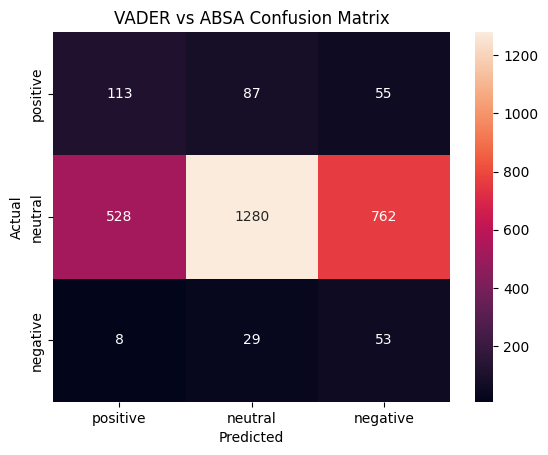

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. VADER label per aspect phrase
analyzer = SentimentIntensityAnalyzer()

def vader_label(text):
    score = analyzer.polarity_scores(text)["compound"]
    return "positive" if score >= 0.05 else "negative" if score <= -0.05 else "neutral"

# 2. Apply VADER on each aspect phrase (aspects are the "aspect" column)
absa_results["vader_sentiment"] = absa_results["aspect"].apply(vader_label)
absa_results["match"] = absa_results["vader_sentiment"] == absa_results["predicted_polarity"]

# 3. Accuracy
accuracy = absa_results["match"].mean()
print(f"✅ VADER vs ABSA Sentiment Agreement: {accuracy:.2f}")

# 4. Detailed metrics
y_true = absa_results["vader_sentiment"]
y_pred = absa_results["predicted_polarity"]

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# 5. Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["positive", "neutral", "negative"])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VADER vs ABSA Confusion Matrix")
plt.show()


In [ ]:
absa_results

,review_id,aspect,predicted_polarity,confidence,star_rating,vader_sentiment,match
0,c9274c0a-a120-4e09-816b-7a8ba3a16634,this new version,neutral,0.978483,3,neutral,True
1,c9274c0a-a120-4e09-816b-7a8ba3a16634,things,neutral,0.984895,3,neutral,True
2,c9274c0a-a120-4e09-816b-7a8ba3a16634,an entirely different aesthetic,neutral,0.804256,3,neutral,True
3,e633e20a-07c1-4a5e-80b1-b104b6cf6a61,the same page,positive,0.997172,5,neutral,False
4,e633e20a-07c1-4a5e-80b1-b104b6cf6a61,all those contractors,positive,0.791144,5,neutral,False
...,...,...,...,...,...,...,...
2910,169a1b47-3c1f-44f9-9c0d-7fb2a3620f8c,the same quality,positive,0.837244,5,neutral,False
2911,169a1b47-3c1f-44f9-9c0d-7fb2a3620f8c,school,neutral,0.997880,5,neutral,True
2912,8670ef05-96cc-4878-94d5-d2f7640dbfcb,different types,neutral,0.996965,5,neutral,True
2913,8670ef05-96cc-4878-94d5-d2f7640dbfcb,trees,neutral,0.950941,5,neutral,True


In [ ]:
!pip install vaderSentiment


Data Validation:
Total records: 2915
Missing values:
aspect                0
predicted_polarity    0
dtype: int64

Class Distribution:
VADER Sentiment:
vader_sentiment
neutral     0.881647
positive    0.087479
negative    0.030875
Name: proportion, dtype: float64

ABSA Sentiment:
predicted_polarity
neutral     0.478902
negative    0.298456
positive    0.222642
Name: proportion, dtype: float64

VADER vs ABSA Sentiment Agreement: 49.61%

Classification Report:
              precision    recall  f1-score   support

    positive      0.061     0.589     0.110        90
     neutral      0.917     0.498     0.645      2570
    negative      0.174     0.443     0.250       255

    accuracy                          0.496      2915
   macro avg      0.384     0.510     0.335      2915
weighted avg      0.825     0.496     0.594      2915



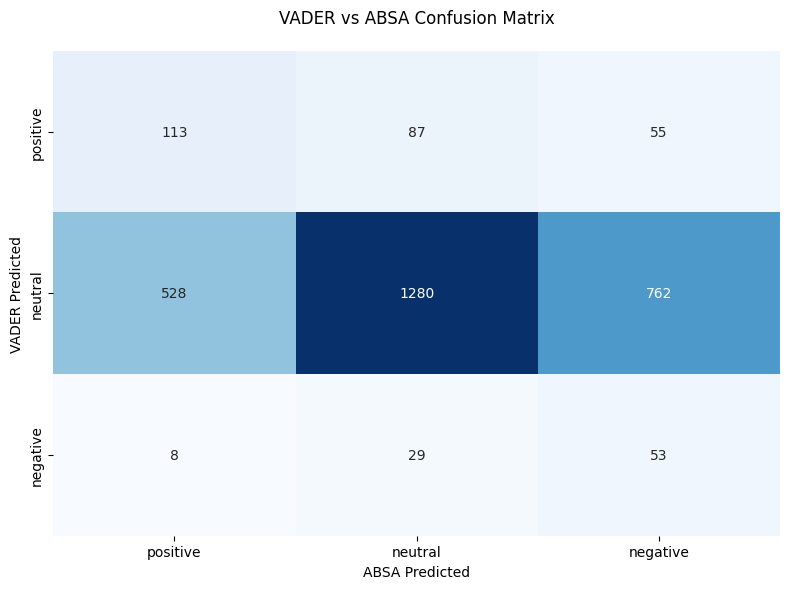

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# 1. Define VADER labeling function with validated thresholds
def vader_label(text):
    if not isinstance(text, str) or not text.strip():
        return "neutral"  # Handle empty/missing text

    score = analyzer.polarity_scores(text)["compound"]
    return (
        "positive" if score >= 0.05
        else "negative" if score <= -0.05
        else "neutral"
    )

# 2. Data validation
print("Data Validation:")
print(f"Total records: {len(absa_results)}")
print("Missing values:")
print(absa_results[["aspect", "predicted_polarity"]].isnull().sum())

# 3. Apply VADER and compare
absa_results["vader_sentiment"] = absa_results["aspect"].apply(vader_label)
absa_results["match"] = absa_results["vader_sentiment"] == absa_results["predicted_polarity"]

# 4. Class distribution analysis
print("\nClass Distribution:")
print("VADER Sentiment:")
print(absa_results["vader_sentiment"].value_counts(normalize=True))
print("\nABSA Sentiment:")
print(absa_results["predicted_polarity"].value_counts(normalize=True))

# 5. Calculate agreement metrics
accuracy = absa_results["match"].mean()
print(f"\nVADER vs ABSA Sentiment Agreement: {accuracy:.2%}")

# 6. Classification report
y_true = absa_results["vader_sentiment"]
y_pred = absa_results["predicted_polarity"]

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=["positive", "neutral", "negative"],
    digits=3
))

# 7. Enhanced confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(
    y_true,
    y_pred,
    labels=["positive", "neutral", "negative"]
)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["positive", "neutral", "negative"],
    yticklabels=["positive", "neutral", "negative"],
    cbar=False
)

plt.xlabel("ABSA Predicted")
plt.ylabel("VADER Predicted")
plt.title("VADER vs ABSA Confusion Matrix", pad=20)
plt.tight_layout()
plt.show()

